In [43]:
import json
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

from pprint import pprint
from sklearn import metrics
from datetime import datetime
from gpytorch.kernels import RBFKernel, ScaleKernel
from torch.distributions import Normal, MultivariateNormal
from torch.distributions import Bernoulli, Beta, Poisson
from torch import einsum

from matplotlib import pyplot as plt

from scipy.stats import wishart as Wishart
from deep_fields.models.random_fields.poisson_covariance import MertonJumpsPoissonCovariance


os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
EPSILON = 1e-5

In [21]:
model_param = MertonJumpsPoissonCovariance.get_parameters()
new_sample = False
from deep_fields import data_path

data_dir = os.path.join(data_path,"raw\merton_poisson_covariance")
my_data_path = os.path.join(data_dir, "merton_jump_simulation_.tr")

data_ = torch.load(my_data_path)
data_loader = data_["data_loader"]
model_param = data_["model_param"]

In [25]:
model_param = MertonJumpsPoissonCovariance.get_parameters()
new_sample = True
from deep_fields import data_path

data_dir = os.path.join(data_path,"raw\merton_poisson_covariance")
my_data_path = os.path.join(data_dir, "merton_jump_simulation_.tr")

if new_sample:
    model_param.update({"jump_size_a": 5.})
    model_param.update({"jump_size_b": 1.})
    model_param.update({"jump_arrival_alpha": .5,})
    model_param.update({"jump_arrival_beta": .5,})
    model_param.update({"returns_mean_a": 1.,})
    model_param.update({"returns_mean_b": 1.,})
    model_param.update({"diffusion_covariance_normalization": 1.})

    mjpc_s = MertonJumpsPoissonCovariance(None, None, None, **model_param)
    data_loader = mjpc_s.sample()
    data_ = {"data_loader":data_loader,"model_param":model_param}
    torch.save(data_,my_data_path)

data_ = torch.load(my_data_path)
data_loader = data_["data_loader"]
model_param = data_["model_param"]

New Model Set For Inference
(<class 'AttributeError'>, AttributeError("'NoneType' object has no attribute 'get'"), <traceback object at 0x00000236027CDC80>)


In [26]:
data_loader["arrivals_indicator"][:,0].sum()

tensor(221.)

In [27]:
data_loader["arrivals_indicator"][:,1].sum()

tensor(988.)

In [58]:

#========================================================================
# inference from simulated date
inference_param = MertonJumpsPoissonCovariance.get_inference_parameters()

inference_param.update({"train_jumps_intensity": False})
inference_param.update({"train_jumps_arrival": True})
inference_param.update({"train_jumps_size": False})
inference_param.update({"train_expected_returns": False})
inference_param.update({"train_diffusion_covariance": False})
inference_param["train_jumps_mean"] = False
inference_param["train_jumps_covariance"] = False

inference_param.update({"nmc": 10000,
                        "burning": 2000,
                        "metrics_logs": 50})

mjpc = MertonJumpsPoissonCovariance(None, data_loader, None, **model_param)
monte_carlo_parameters = mjpc.inference(data_loader, **inference_param)

  0%|▎                                                                             | 42/10000 [00:00<00:24, 408.64it/s]

New Model Set For Inference
Data Loader has No Parameters
#      ---------------- 
#      Start of MCMC    
#      ---------------- 
Monte Carlo 0
Monte Carlo 1
Monte Carlo 2
Monte Carlo 3
Monte Carlo 4
Monte Carlo 5
Monte Carlo 6
Monte Carlo 7
Monte Carlo 8
Monte Carlo 9
Monte Carlo 10
Monte Carlo 11
Monte Carlo 12
Monte Carlo 13
Monte Carlo 14
Monte Carlo 15
Monte Carlo 16
Monte Carlo 17
Monte Carlo 18
Monte Carlo 19
Monte Carlo 20
Monte Carlo 21
Monte Carlo 22
Monte Carlo 23
Monte Carlo 24
Monte Carlo 25
Monte Carlo 26
Monte Carlo 27
Monte Carlo 28
Monte Carlo 29
Monte Carlo 30
Monte Carlo 31
Monte Carlo 32
Monte Carlo 33
Monte Carlo 34
Monte Carlo 35
Monte Carlo 36
Monte Carlo 37
Monte Carlo 38
Monte Carlo 39
Monte Carlo 40
Monte Carlo 41
Monte Carlo 42
Monte Carlo 43
Monte Carlo 44
Monte Carlo 45
Monte Carlo 46
Monte Carlo 47
Monte Carlo 48
Monte Carlo 49
Monte Carlo 50
Monte Carlo 51
Monte Carlo 52
Monte Carlo 53
Monte Carlo 54
Monte Carlo 55
Monte Carlo 56
Monte Carlo 57
Monte C

  1%|▉                                                                            | 126/10000 [00:00<00:24, 396.70it/s]


Monte Carlo 75
Monte Carlo 76
Monte Carlo 77
Monte Carlo 78
Monte Carlo 79
Monte Carlo 80
Monte Carlo 81
Monte Carlo 82
Monte Carlo 83
Monte Carlo 84
Monte Carlo 85
Monte Carlo 86
Monte Carlo 87
Monte Carlo 88
Monte Carlo 89
Monte Carlo 90
Monte Carlo 91
Monte Carlo 92
Monte Carlo 93
Monte Carlo 94
Monte Carlo 95
Monte Carlo 96
Monte Carlo 97
Monte Carlo 98
Monte Carlo 99
Monte Carlo 100
Monte Carlo 101
Monte Carlo 102
Monte Carlo 103
Monte Carlo 104
Monte Carlo 105
Monte Carlo 106
Monte Carlo 107
Monte Carlo 108
Monte Carlo 109
Monte Carlo 110
Monte Carlo 111
Monte Carlo 112
Monte Carlo 113
Monte Carlo 114
Monte Carlo 115
Monte Carlo 116
Monte Carlo 117
Monte Carlo 118
Monte Carlo 119
Monte Carlo 120
Monte Carlo 121
Monte Carlo 122
Monte Carlo 123
Monte Carlo 124
Monte Carlo 125
Monte Carlo 126
Monte Carlo 127
Monte Carlo 128
Monte Carlo 129
Monte Carlo 130
Monte Carlo 131
Monte Carlo 132
Monte Carlo 133
Monte Carlo 134
Monte Carlo 135
Monte Carlo 136
Monte Carlo 137
Monte Carlo 138


  2%|█▋                                                                           | 213/10000 [00:00<00:23, 414.34it/s]


Monte Carlo 145
Monte Carlo 146
Monte Carlo 147
Monte Carlo 148
Monte Carlo 149
Monte Carlo 150
Monte Carlo 151
Monte Carlo 152
Monte Carlo 153
Monte Carlo 154
Monte Carlo 155
Monte Carlo 156
Monte Carlo 157
Monte Carlo 158
Monte Carlo 159
Monte Carlo 160
Monte Carlo 161
Monte Carlo 162
Monte Carlo 163
Monte Carlo 164
Monte Carlo 165
Monte Carlo 166
Monte Carlo 167
Monte Carlo 168
Monte Carlo 169
Monte Carlo 170
Monte Carlo 171
Monte Carlo 172
Monte Carlo 173
Monte Carlo 174
Monte Carlo 175
Monte Carlo 176
Monte Carlo 177
Monte Carlo 178
Monte Carlo 179
Monte Carlo 180
Monte Carlo 181
Monte Carlo 182
Monte Carlo 183
Monte Carlo 184
Monte Carlo 185
Monte Carlo 186
Monte Carlo 187
Monte Carlo 188
Monte Carlo 189
Monte Carlo 190
Monte Carlo 191
Monte Carlo 192
Monte Carlo 193
Monte Carlo 194
Monte Carlo 195
Monte Carlo 196
Monte Carlo 197
Monte Carlo 198
Monte Carlo 199
Monte Carlo 200
Monte Carlo 201
Monte Carlo 202
Monte Carlo 203
Monte Carlo 204
Monte Carlo 205
Monte Carlo 206
Monte C

  3%|██▎                                                                          | 301/10000 [00:00<00:23, 413.84it/s]

Monte Carlo 226
Monte Carlo 227
Monte Carlo 228
Monte Carlo 229
Monte Carlo 230
Monte Carlo 231
Monte Carlo 232
Monte Carlo 233
Monte Carlo 234
Monte Carlo 235
Monte Carlo 236
Monte Carlo 237
Monte Carlo 238
Monte Carlo 239
Monte Carlo 240
Monte Carlo 241
Monte Carlo 242
Monte Carlo 243
Monte Carlo 244
Monte Carlo 245
Monte Carlo 246
Monte Carlo 247
Monte Carlo 248
Monte Carlo 249
Monte Carlo 250
Monte Carlo 251
Monte Carlo 252
Monte Carlo 253
Monte Carlo 254
Monte Carlo 255
Monte Carlo 256
Monte Carlo 257
Monte Carlo 258
Monte Carlo 259
Monte Carlo 260
Monte Carlo 261
Monte Carlo 262
Monte Carlo 263
Monte Carlo 264
Monte Carlo 265
Monte Carlo 266
Monte Carlo 267
Monte Carlo 268
Monte Carlo 269
Monte Carlo 270
Monte Carlo 271
Monte Carlo 272
Monte Carlo 273
Monte Carlo 274
Monte Carlo 275
Monte Carlo 276
Monte Carlo 277
Monte Carlo 278
Monte Carlo 279
Monte Carlo 280
Monte Carlo 281
Monte Carlo 282
Monte Carlo 283
Monte Carlo 284
Monte Carlo 285
Monte Carlo 286
Monte Carlo 287
Monte Ca

  3%|██▋                                                                          | 343/10000 [00:00<00:23, 409.01it/s]


Monte Carlo 303
Monte Carlo 304
Monte Carlo 305
Monte Carlo 306
Monte Carlo 307
Monte Carlo 308
Monte Carlo 309
Monte Carlo 310
Monte Carlo 311
Monte Carlo 312
Monte Carlo 313
Monte Carlo 314
Monte Carlo 315
Monte Carlo 316
Monte Carlo 317
Monte Carlo 318
Monte Carlo 319
Monte Carlo 320
Monte Carlo 321
Monte Carlo 322
Monte Carlo 323
Monte Carlo 324
Monte Carlo 325
Monte Carlo 326
Monte Carlo 327
Monte Carlo 328
Monte Carlo 329
Monte Carlo 330
Monte Carlo 331
Monte Carlo 332
Monte Carlo 333
Monte Carlo 334
Monte Carlo 335
Monte Carlo 336
Monte Carlo 337
Monte Carlo 338
Monte Carlo 339
Monte Carlo 340
Monte Carlo 341
Monte Carlo 342
Monte Carlo 343
Monte Carlo 344
Monte Carlo 345
Monte Carlo 346
Monte Carlo 347
Monte Carlo 348
Monte Carlo 349
Monte Carlo 350
Monte Carlo 351
Monte Carlo 352
Monte Carlo 353
Monte Carlo 354
Monte Carlo 355
Monte Carlo 356
Monte Carlo 357
Monte Carlo 358
Monte Carlo 359
Monte Carlo 360
Monte Carlo 361
Monte Carlo 362
Monte Carlo 363
Monte Carlo 364
Monte C

  4%|███▎                                                                         | 428/10000 [00:01<00:23, 411.25it/s]


Monte Carlo 380
Monte Carlo 381
Monte Carlo 382
Monte Carlo 383
Monte Carlo 384
Monte Carlo 385
Monte Carlo 386
Monte Carlo 387
Monte Carlo 388
Monte Carlo 389
Monte Carlo 390
Monte Carlo 391
Monte Carlo 392
Monte Carlo 393
Monte Carlo 394
Monte Carlo 395
Monte Carlo 396
Monte Carlo 397
Monte Carlo 398
Monte Carlo 399
Monte Carlo 400
Monte Carlo 401
Monte Carlo 402
Monte Carlo 403
Monte Carlo 404
Monte Carlo 405
Monte Carlo 406
Monte Carlo 407
Monte Carlo 408
Monte Carlo 409
Monte Carlo 410
Monte Carlo 411
Monte Carlo 412
Monte Carlo 413
Monte Carlo 414
Monte Carlo 415
Monte Carlo 416
Monte Carlo 417
Monte Carlo 418
Monte Carlo 419
Monte Carlo 420
Monte Carlo 421
Monte Carlo 422
Monte Carlo 423
Monte Carlo 424
Monte Carlo 425
Monte Carlo 426
Monte Carlo 427
Monte Carlo 428
Monte Carlo 429
Monte Carlo 430
Monte Carlo 431
Monte Carlo 432
Monte Carlo 433
Monte Carlo 434
Monte Carlo 435
Monte Carlo 436
Monte Carlo 437
Monte Carlo 438
Monte Carlo 439
Monte Carlo 440
Monte Carlo 441
Monte C

  5%|███▉                                                                         | 513/10000 [00:01<00:23, 410.39it/s]


Monte Carlo 455
Monte Carlo 456
Monte Carlo 457
Monte Carlo 458
Monte Carlo 459
Monte Carlo 460
Monte Carlo 461
Monte Carlo 462
Monte Carlo 463
Monte Carlo 464
Monte Carlo 465
Monte Carlo 466
Monte Carlo 467
Monte Carlo 468
Monte Carlo 469
Monte Carlo 470
Monte Carlo 471
Monte Carlo 472
Monte Carlo 473
Monte Carlo 474
Monte Carlo 475
Monte Carlo 476
Monte Carlo 477
Monte Carlo 478
Monte Carlo 479
Monte Carlo 480
Monte Carlo 481
Monte Carlo 482
Monte Carlo 483
Monte Carlo 484
Monte Carlo 485
Monte Carlo 486
Monte Carlo 487
Monte Carlo 488
Monte Carlo 489
Monte Carlo 490
Monte Carlo 491
Monte Carlo 492
Monte Carlo 493
Monte Carlo 494
Monte Carlo 495
Monte Carlo 496
Monte Carlo 497
Monte Carlo 498
Monte Carlo 499
Monte Carlo 500
Monte Carlo 501
Monte Carlo 502
Monte Carlo 503
Monte Carlo 504
Monte Carlo 505
Monte Carlo 506
Monte Carlo 507
Monte Carlo 508
Monte Carlo 509
Monte Carlo 510
Monte Carlo 511
Monte Carlo 512
Monte Carlo 513
Monte Carlo 514
Monte Carlo 515
Monte Carlo 516
Monte C

  6%|████▋                                                                        | 602/10000 [00:01<00:22, 426.35it/s]

Monte Carlo 534
Monte Carlo 535
Monte Carlo 536
Monte Carlo 537
Monte Carlo 538
Monte Carlo 539
Monte Carlo 540
Monte Carlo 541
Monte Carlo 542
Monte Carlo 543
Monte Carlo 544
Monte Carlo 545
Monte Carlo 546
Monte Carlo 547
Monte Carlo 548
Monte Carlo 549
Monte Carlo 550
Monte Carlo 551
Monte Carlo 552
Monte Carlo 553
Monte Carlo 554
Monte Carlo 555
Monte Carlo 556
Monte Carlo 557
Monte Carlo 558
Monte Carlo 559
Monte Carlo 560
Monte Carlo 561
Monte Carlo 562
Monte Carlo 563
Monte Carlo 564
Monte Carlo 565
Monte Carlo 566
Monte Carlo 567
Monte Carlo 568
Monte Carlo 569
Monte Carlo 570
Monte Carlo 571
Monte Carlo 572
Monte Carlo 573
Monte Carlo 574
Monte Carlo 575
Monte Carlo 576
Monte Carlo 577
Monte Carlo 578
Monte Carlo 579
Monte Carlo 580
Monte Carlo 581
Monte Carlo 582
Monte Carlo 583
Monte Carlo 584
Monte Carlo 585
Monte Carlo 586
Monte Carlo 587
Monte Carlo 588
Monte Carlo 589
Monte Carlo 590
Monte Carlo 591
Monte Carlo 592
Monte Carlo 593
Monte Carlo 594
Monte Carlo 595
Monte Ca

  7%|█████▎                                                                       | 691/10000 [00:01<00:21, 432.06it/s]

Monte Carlo 616
Monte Carlo 617
Monte Carlo 618
Monte Carlo 619
Monte Carlo 620
Monte Carlo 621
Monte Carlo 622
Monte Carlo 623
Monte Carlo 624
Monte Carlo 625
Monte Carlo 626
Monte Carlo 627
Monte Carlo 628
Monte Carlo 629
Monte Carlo 630
Monte Carlo 631
Monte Carlo 632
Monte Carlo 633
Monte Carlo 634
Monte Carlo 635
Monte Carlo 636
Monte Carlo 637
Monte Carlo 638
Monte Carlo 639
Monte Carlo 640
Monte Carlo 641
Monte Carlo 642
Monte Carlo 643
Monte Carlo 644
Monte Carlo 645
Monte Carlo 646
Monte Carlo 647
Monte Carlo 648
Monte Carlo 649
Monte Carlo 650
Monte Carlo 651
Monte Carlo 652
Monte Carlo 653
Monte Carlo 654
Monte Carlo 655
Monte Carlo 656
Monte Carlo 657
Monte Carlo 658
Monte Carlo 659
Monte Carlo 660
Monte Carlo 661
Monte Carlo 662
Monte Carlo 663
Monte Carlo 664
Monte Carlo 665
Monte Carlo 666
Monte Carlo 667
Monte Carlo 668
Monte Carlo 669
Monte Carlo 670
Monte Carlo 671
Monte Carlo 672
Monte Carlo 673
Monte Carlo 674
Monte Carlo 675
Monte Carlo 676
Monte Carlo 677
Monte Ca

  7%|█████▋                                                                       | 735/10000 [00:01<00:22, 415.13it/s]

Monte Carlo 698
Monte Carlo 699
Monte Carlo 700
Monte Carlo 701
Monte Carlo 702
Monte Carlo 703
Monte Carlo 704
Monte Carlo 705
Monte Carlo 706
Monte Carlo 707
Monte Carlo 708
Monte Carlo 709
Monte Carlo 710
Monte Carlo 711
Monte Carlo 712
Monte Carlo 713
Monte Carlo 714
Monte Carlo 715
Monte Carlo 716
Monte Carlo 717
Monte Carlo 718
Monte Carlo 719
Monte Carlo 720
Monte Carlo 721
Monte Carlo 722
Monte Carlo 723
Monte Carlo 724
Monte Carlo 725
Monte Carlo 726
Monte Carlo 727
Monte Carlo 728
Monte Carlo 729
Monte Carlo 730
Monte Carlo 731
Monte Carlo 732
Monte Carlo 733
Monte Carlo 734
Monte Carlo 735
Monte Carlo 736
Monte Carlo 737
Monte Carlo 738
Monte Carlo 739
Monte Carlo 740
Monte Carlo 741
Monte Carlo 742
Monte Carlo 743
Monte Carlo 744
Monte Carlo 745
Monte Carlo 746
Monte Carlo 747
Monte Carlo 748
Monte Carlo 749
Monte Carlo 750
Monte Carlo 751
Monte Carlo 752
Monte Carlo 753
Monte Carlo 754
Monte Carlo 755
Monte Carlo 756
Monte Carlo 757
Monte Carlo 758
Monte Carlo 759
Monte Ca

  8%|██████▎                                                                      | 818/10000 [00:01<00:23, 395.82it/s]

Monte Carlo 767
Monte Carlo 768
Monte Carlo 769
Monte Carlo 770
Monte Carlo 771
Monte Carlo 772
Monte Carlo 773
Monte Carlo 774
Monte Carlo 775
Monte Carlo 776
Monte Carlo 777
Monte Carlo 778
Monte Carlo 779
Monte Carlo 780
Monte Carlo 781
Monte Carlo 782
Monte Carlo 783
Monte Carlo 784
Monte Carlo 785
Monte Carlo 786
Monte Carlo 787
Monte Carlo 788
Monte Carlo 789
Monte Carlo 790
Monte Carlo 791
Monte Carlo 792
Monte Carlo 793
Monte Carlo 794
Monte Carlo 795
Monte Carlo 796
Monte Carlo 797
Monte Carlo 798
Monte Carlo 799
Monte Carlo 800
Monte Carlo 801
Monte Carlo 802
Monte Carlo 803
Monte Carlo 804
Monte Carlo 805
Monte Carlo 806
Monte Carlo 807
Monte Carlo 808
Monte Carlo 809
Monte Carlo 810
Monte Carlo 811
Monte Carlo 812
Monte Carlo 813
Monte Carlo 814
Monte Carlo 815
Monte Carlo 816
Monte Carlo 817
Monte Carlo 818
Monte Carlo 819
Monte Carlo 820
Monte Carlo 821
Monte Carlo 822
Monte Carlo 823
Monte Carlo 824
Monte Carlo 825
Monte Carlo 826
Monte Carlo 827
Monte Carlo 828
Monte Ca

  9%|██████▉                                                                      | 899/10000 [00:02<00:23, 394.28it/s]


Monte Carlo 841
Monte Carlo 842
Monte Carlo 843
Monte Carlo 844
Monte Carlo 845
Monte Carlo 846
Monte Carlo 847
Monte Carlo 848
Monte Carlo 849
Monte Carlo 850
Monte Carlo 851
Monte Carlo 852
Monte Carlo 853
Monte Carlo 854
Monte Carlo 855
Monte Carlo 856
Monte Carlo 857
Monte Carlo 858
Monte Carlo 859
Monte Carlo 860
Monte Carlo 861
Monte Carlo 862
Monte Carlo 863
Monte Carlo 864
Monte Carlo 865
Monte Carlo 866
Monte Carlo 867
Monte Carlo 868
Monte Carlo 869
Monte Carlo 870
Monte Carlo 871
Monte Carlo 872
Monte Carlo 873
Monte Carlo 874
Monte Carlo 875
Monte Carlo 876
Monte Carlo 877
Monte Carlo 878
Monte Carlo 879
Monte Carlo 880
Monte Carlo 881
Monte Carlo 882
Monte Carlo 883
Monte Carlo 884
Monte Carlo 885
Monte Carlo 886
Monte Carlo 887
Monte Carlo 888
Monte Carlo 889
Monte Carlo 890
Monte Carlo 891
Monte Carlo 892
Monte Carlo 893
Monte Carlo 894
Monte Carlo 895
Monte Carlo 896
Monte Carlo 897
Monte Carlo 898
Monte Carlo 899
Monte Carlo 900
Monte Carlo 901
Monte Carlo 902
Monte C

 10%|███████▌                                                                     | 979/10000 [00:02<00:23, 381.57it/s]

Monte Carlo 914
Monte Carlo 915
Monte Carlo 916
Monte Carlo 917
Monte Carlo 918
Monte Carlo 919
Monte Carlo 920
Monte Carlo 921
Monte Carlo 922
Monte Carlo 923
Monte Carlo 924
Monte Carlo 925
Monte Carlo 926
Monte Carlo 927
Monte Carlo 928
Monte Carlo 929
Monte Carlo 930
Monte Carlo 931
Monte Carlo 932
Monte Carlo 933
Monte Carlo 934
Monte Carlo 935
Monte Carlo 936
Monte Carlo 937
Monte Carlo 938
Monte Carlo 939
Monte Carlo 940
Monte Carlo 941
Monte Carlo 942
Monte Carlo 943
Monte Carlo 944
Monte Carlo 945
Monte Carlo 946
Monte Carlo 947
Monte Carlo 948
Monte Carlo 949
Monte Carlo 950
Monte Carlo 951
Monte Carlo 952
Monte Carlo 953
Monte Carlo 954
Monte Carlo 955
Monte Carlo 956
Monte Carlo 957
Monte Carlo 958
Monte Carlo 959
Monte Carlo 960
Monte Carlo 961
Monte Carlo 962
Monte Carlo 963
Monte Carlo 964
Monte Carlo 965
Monte Carlo 966
Monte Carlo 967
Monte Carlo 968
Monte Carlo 969
Monte Carlo 970
Monte Carlo 971
Monte Carlo 972
Monte Carlo 973
Monte Carlo 974
Monte Carlo 975
Monte Ca

 10%|███████▊                                                                    | 1020/10000 [00:02<00:23, 386.73it/s]

Monte Carlo 982
Monte Carlo 983
Monte Carlo 984
Monte Carlo 985
Monte Carlo 986
Monte Carlo 987
Monte Carlo 988
Monte Carlo 989
Monte Carlo 990
Monte Carlo 991
Monte Carlo 992
Monte Carlo 993
Monte Carlo 994
Monte Carlo 995
Monte Carlo 996
Monte Carlo 997
Monte Carlo 998
Monte Carlo 999
Monte Carlo 1000
Monte Carlo 1001
Monte Carlo 1002
Monte Carlo 1003
Monte Carlo 1004
Monte Carlo 1005
Monte Carlo 1006
Monte Carlo 1007
Monte Carlo 1008
Monte Carlo 1009
Monte Carlo 1010
Monte Carlo 1011
Monte Carlo 1012
Monte Carlo 1013
Monte Carlo 1014
Monte Carlo 1015
Monte Carlo 1016
Monte Carlo 1017
Monte Carlo 1018
Monte Carlo 1019
Monte Carlo 1020
Monte Carlo 1021
Monte Carlo 1022
Monte Carlo 1023
Monte Carlo 1024
Monte Carlo 1025
Monte Carlo 1026
Monte Carlo 1027
Monte Carlo 1028
Monte Carlo 1029
Monte Carlo 1030
Monte Carlo 1031
Monte Carlo 1032
Monte Carlo 1033
Monte Carlo 1034
Monte Carlo 1035
Monte Carlo 1036
Monte Carlo 1037
Monte Carlo 1038
Monte Carlo 1039
Monte Carlo 1040
Monte Carlo 104

 11%|████████▍                                                                   | 1105/10000 [00:02<00:21, 405.27it/s]

Monte Carlo 1059
Monte Carlo 1060
Monte Carlo 1061
Monte Carlo 1062
Monte Carlo 1063
Monte Carlo 1064
Monte Carlo 1065
Monte Carlo 1066
Monte Carlo 1067
Monte Carlo 1068
Monte Carlo 1069
Monte Carlo 1070
Monte Carlo 1071
Monte Carlo 1072
Monte Carlo 1073
Monte Carlo 1074
Monte Carlo 1075
Monte Carlo 1076
Monte Carlo 1077
Monte Carlo 1078
Monte Carlo 1079
Monte Carlo 1080
Monte Carlo 1081
Monte Carlo 1082
Monte Carlo 1083
Monte Carlo 1084
Monte Carlo 1085
Monte Carlo 1086
Monte Carlo 1087
Monte Carlo 1088
Monte Carlo 1089
Monte Carlo 1090
Monte Carlo 1091
Monte Carlo 1092
Monte Carlo 1093
Monte Carlo 1094
Monte Carlo 1095
Monte Carlo 1096
Monte Carlo 1097
Monte Carlo 1098
Monte Carlo 1099
Monte Carlo 1100
Monte Carlo 1101
Monte Carlo 1102
Monte Carlo 1103
Monte Carlo 1104
Monte Carlo 1105
Monte Carlo 1106
Monte Carlo 1107
Monte Carlo 1108
Monte Carlo 1109
Monte Carlo 1110
Monte Carlo 1111
Monte Carlo 1112
Monte Carlo 1113
Monte Carlo 1114
Monte Carlo 1115
Monte Carlo 1116
Monte Carlo 11

 12%|█████████                                                                   | 1186/10000 [00:02<00:22, 388.08it/s]


Monte Carlo 1134
Monte Carlo 1135
Monte Carlo 1136
Monte Carlo 1137
Monte Carlo 1138
Monte Carlo 1139
Monte Carlo 1140
Monte Carlo 1141
Monte Carlo 1142
Monte Carlo 1143
Monte Carlo 1144
Monte Carlo 1145
Monte Carlo 1146
Monte Carlo 1147
Monte Carlo 1148
Monte Carlo 1149
Monte Carlo 1150
Monte Carlo 1151
Monte Carlo 1152
Monte Carlo 1153
Monte Carlo 1154
Monte Carlo 1155
Monte Carlo 1156
Monte Carlo 1157
Monte Carlo 1158
Monte Carlo 1159
Monte Carlo 1160
Monte Carlo 1161
Monte Carlo 1162
Monte Carlo 1163
Monte Carlo 1164
Monte Carlo 1165
Monte Carlo 1166
Monte Carlo 1167
Monte Carlo 1168
Monte Carlo 1169
Monte Carlo 1170
Monte Carlo 1171
Monte Carlo 1172
Monte Carlo 1173
Monte Carlo 1174
Monte Carlo 1175
Monte Carlo 1176
Monte Carlo 1177
Monte Carlo 1178
Monte Carlo 1179
Monte Carlo 1180
Monte Carlo 1181
Monte Carlo 1182
Monte Carlo 1183
Monte Carlo 1184
Monte Carlo 1185
Monte Carlo 1186
Monte Carlo 1187
Monte Carlo 1188
Monte Carlo 1189
Monte Carlo 1190
Monte Carlo 1191
Monte Carlo 1

 13%|█████████▌                                                                  | 1266/10000 [00:03<00:22, 384.09it/s]


Monte Carlo 1203
Monte Carlo 1204
Monte Carlo 1205
Monte Carlo 1206
Monte Carlo 1207
Monte Carlo 1208
Monte Carlo 1209
Monte Carlo 1210
Monte Carlo 1211
Monte Carlo 1212
Monte Carlo 1213
Monte Carlo 1214
Monte Carlo 1215
Monte Carlo 1216
Monte Carlo 1217
Monte Carlo 1218
Monte Carlo 1219
Monte Carlo 1220
Monte Carlo 1221
Monte Carlo 1222
Monte Carlo 1223
Monte Carlo 1224
Monte Carlo 1225
Monte Carlo 1226
Monte Carlo 1227
Monte Carlo 1228
Monte Carlo 1229
Monte Carlo 1230
Monte Carlo 1231
Monte Carlo 1232
Monte Carlo 1233
Monte Carlo 1234
Monte Carlo 1235
Monte Carlo 1236
Monte Carlo 1237
Monte Carlo 1238
Monte Carlo 1239
Monte Carlo 1240
Monte Carlo 1241
Monte Carlo 1242
Monte Carlo 1243
Monte Carlo 1244
Monte Carlo 1245
Monte Carlo 1246
Monte Carlo 1247
Monte Carlo 1248
Monte Carlo 1249
Monte Carlo 1250
Monte Carlo 1251
Monte Carlo 1252
Monte Carlo 1253
Monte Carlo 1254
Monte Carlo 1255
Monte Carlo 1256
Monte Carlo 1257
Monte Carlo 1258
Monte Carlo 1259
Monte Carlo 1260
Monte Carlo 1

 13%|█████████▉                                                                  | 1305/10000 [00:03<00:23, 375.29it/s]


Monte Carlo 1277
Monte Carlo 1278
Monte Carlo 1279
Monte Carlo 1280
Monte Carlo 1281
Monte Carlo 1282
Monte Carlo 1283
Monte Carlo 1284
Monte Carlo 1285
Monte Carlo 1286
Monte Carlo 1287
Monte Carlo 1288
Monte Carlo 1289
Monte Carlo 1290
Monte Carlo 1291
Monte Carlo 1292
Monte Carlo 1293
Monte Carlo 1294
Monte Carlo 1295
Monte Carlo 1296
Monte Carlo 1297
Monte Carlo 1298
Monte Carlo 1299
Monte Carlo 1300
Monte Carlo 1301
Monte Carlo 1302
Monte Carlo 1303
Monte Carlo 1304
Monte Carlo 1305
Monte Carlo 1306
Monte Carlo 1307
Monte Carlo 1308
Monte Carlo 1309
Monte Carlo 1310
Monte Carlo 1311
Monte Carlo 1312
Monte Carlo 1313
Monte Carlo 1314
Monte Carlo 1315
Monte Carlo 1316
Monte Carlo 1317
Monte Carlo 1318
Monte Carlo 1319
Monte Carlo 1320
Monte Carlo 1321
Monte Carlo 1322
Monte Carlo 1323
Monte Carlo 1324
Monte Carlo 1325
Monte Carlo 1326
Monte Carlo 1327
Monte Carlo 1328
Monte Carlo 1329
Monte Carlo 1330
Monte Carlo 1331
Monte Carlo 1332
Monte Carlo 1333
Monte Carlo 1334
Monte Carlo 1

 14%|██████████▌                                                                 | 1390/10000 [00:03<00:21, 397.22it/s]

Monte Carlo 1348
Monte Carlo 1349
Monte Carlo 1350
Monte Carlo 1351
Monte Carlo 1352
Monte Carlo 1353
Monte Carlo 1354
Monte Carlo 1355
Monte Carlo 1356
Monte Carlo 1357
Monte Carlo 1358
Monte Carlo 1359
Monte Carlo 1360
Monte Carlo 1361
Monte Carlo 1362
Monte Carlo 1363
Monte Carlo 1364
Monte Carlo 1365
Monte Carlo 1366
Monte Carlo 1367
Monte Carlo 1368
Monte Carlo 1369
Monte Carlo 1370
Monte Carlo 1371
Monte Carlo 1372
Monte Carlo 1373
Monte Carlo 1374
Monte Carlo 1375
Monte Carlo 1376
Monte Carlo 1377
Monte Carlo 1378
Monte Carlo 1379
Monte Carlo 1380
Monte Carlo 1381
Monte Carlo 1382
Monte Carlo 1383
Monte Carlo 1384
Monte Carlo 1385
Monte Carlo 1386
Monte Carlo 1387
Monte Carlo 1388
Monte Carlo 1389
Monte Carlo 1390
Monte Carlo 1391
Monte Carlo 1392
Monte Carlo 1393
Monte Carlo 1394
Monte Carlo 1395
Monte Carlo 1396
Monte Carlo 1397
Monte Carlo 1398
Monte Carlo 1399
Monte Carlo 1400
Monte Carlo 1401
Monte Carlo 1402
Monte Carlo 1403
Monte Carlo 1404
Monte Carlo 1405
Monte Carlo 14

 15%|███████████▏                                                                | 1472/10000 [00:03<00:21, 399.28it/s]


Monte Carlo 1427
Monte Carlo 1428
Monte Carlo 1429
Monte Carlo 1430
Monte Carlo 1431
Monte Carlo 1432
Monte Carlo 1433
Monte Carlo 1434
Monte Carlo 1435
Monte Carlo 1436
Monte Carlo 1437
Monte Carlo 1438
Monte Carlo 1439
Monte Carlo 1440
Monte Carlo 1441
Monte Carlo 1442
Monte Carlo 1443
Monte Carlo 1444
Monte Carlo 1445
Monte Carlo 1446
Monte Carlo 1447
Monte Carlo 1448
Monte Carlo 1449
Monte Carlo 1450
Monte Carlo 1451
Monte Carlo 1452
Monte Carlo 1453
Monte Carlo 1454
Monte Carlo 1455
Monte Carlo 1456
Monte Carlo 1457
Monte Carlo 1458
Monte Carlo 1459
Monte Carlo 1460
Monte Carlo 1461
Monte Carlo 1462
Monte Carlo 1463
Monte Carlo 1464
Monte Carlo 1465
Monte Carlo 1466
Monte Carlo 1467
Monte Carlo 1468
Monte Carlo 1469
Monte Carlo 1470
Monte Carlo 1471
Monte Carlo 1472
Monte Carlo 1473
Monte Carlo 1474
Monte Carlo 1475
Monte Carlo 1476
Monte Carlo 1477
Monte Carlo 1478
Monte Carlo 1479
Monte Carlo 1480
Monte Carlo 1481
Monte Carlo 1482
Monte Carlo 1483
Monte Carlo 1484
Monte Carlo 1

 16%|███████████▊                                                                | 1556/10000 [00:03<00:20, 406.43it/s]


Monte Carlo 1502
Monte Carlo 1503
Monte Carlo 1504
Monte Carlo 1505
Monte Carlo 1506
Monte Carlo 1507
Monte Carlo 1508
Monte Carlo 1509
Monte Carlo 1510
Monte Carlo 1511
Monte Carlo 1512
Monte Carlo 1513
Monte Carlo 1514
Monte Carlo 1515
Monte Carlo 1516
Monte Carlo 1517
Monte Carlo 1518
Monte Carlo 1519
Monte Carlo 1520
Monte Carlo 1521
Monte Carlo 1522
Monte Carlo 1523
Monte Carlo 1524
Monte Carlo 1525
Monte Carlo 1526
Monte Carlo 1527
Monte Carlo 1528
Monte Carlo 1529
Monte Carlo 1530
Monte Carlo 1531
Monte Carlo 1532
Monte Carlo 1533
Monte Carlo 1534
Monte Carlo 1535
Monte Carlo 1536
Monte Carlo 1537
Monte Carlo 1538
Monte Carlo 1539
Monte Carlo 1540
Monte Carlo 1541
Monte Carlo 1542
Monte Carlo 1543
Monte Carlo 1544
Monte Carlo 1545
Monte Carlo 1546
Monte Carlo 1547
Monte Carlo 1548
Monte Carlo 1549
Monte Carlo 1550
Monte Carlo 1551
Monte Carlo 1552
Monte Carlo 1553
Monte Carlo 1554
Monte Carlo 1555
Monte Carlo 1556
Monte Carlo 1557
Monte Carlo 1558
Monte Carlo 1559
Monte Carlo 1

 16%|████████████▍                                                               | 1639/10000 [00:04<00:20, 406.05it/s]


Monte Carlo 1579
Monte Carlo 1580
Monte Carlo 1581
Monte Carlo 1582
Monte Carlo 1583
Monte Carlo 1584
Monte Carlo 1585
Monte Carlo 1586
Monte Carlo 1587
Monte Carlo 1588
Monte Carlo 1589
Monte Carlo 1590
Monte Carlo 1591
Monte Carlo 1592
Monte Carlo 1593
Monte Carlo 1594
Monte Carlo 1595
Monte Carlo 1596
Monte Carlo 1597
Monte Carlo 1598
Monte Carlo 1599
Monte Carlo 1600
Monte Carlo 1601
Monte Carlo 1602
Monte Carlo 1603
Monte Carlo 1604
Monte Carlo 1605
Monte Carlo 1606
Monte Carlo 1607
Monte Carlo 1608
Monte Carlo 1609
Monte Carlo 1610
Monte Carlo 1611
Monte Carlo 1612
Monte Carlo 1613
Monte Carlo 1614
Monte Carlo 1615
Monte Carlo 1616
Monte Carlo 1617
Monte Carlo 1618
Monte Carlo 1619
Monte Carlo 1620
Monte Carlo 1621
Monte Carlo 1622
Monte Carlo 1623
Monte Carlo 1624
Monte Carlo 1625
Monte Carlo 1626
Monte Carlo 1627
Monte Carlo 1628
Monte Carlo 1629
Monte Carlo 1630
Monte Carlo 1631
Monte Carlo 1632
Monte Carlo 1633
Monte Carlo 1634
Monte Carlo 1635
Monte Carlo 1636
Monte Carlo 1

 17%|█████████████                                                               | 1720/10000 [00:04<00:21, 393.95it/s]


Monte Carlo 1653
Monte Carlo 1654
Monte Carlo 1655
Monte Carlo 1656
Monte Carlo 1657
Monte Carlo 1658
Monte Carlo 1659
Monte Carlo 1660
Monte Carlo 1661
Monte Carlo 1662
Monte Carlo 1663
Monte Carlo 1664
Monte Carlo 1665
Monte Carlo 1666
Monte Carlo 1667
Monte Carlo 1668
Monte Carlo 1669
Monte Carlo 1670
Monte Carlo 1671
Monte Carlo 1672
Monte Carlo 1673
Monte Carlo 1674
Monte Carlo 1675
Monte Carlo 1676
Monte Carlo 1677
Monte Carlo 1678
Monte Carlo 1679
Monte Carlo 1680
Monte Carlo 1681
Monte Carlo 1682
Monte Carlo 1683
Monte Carlo 1684
Monte Carlo 1685
Monte Carlo 1686
Monte Carlo 1687
Monte Carlo 1688
Monte Carlo 1689
Monte Carlo 1690
Monte Carlo 1691
Monte Carlo 1692
Monte Carlo 1693
Monte Carlo 1694
Monte Carlo 1695
Monte Carlo 1696
Monte Carlo 1697
Monte Carlo 1698
Monte Carlo 1699
Monte Carlo 1700
Monte Carlo 1701
Monte Carlo 1702
Monte Carlo 1703
Monte Carlo 1704
Monte Carlo 1705
Monte Carlo 1706
Monte Carlo 1707
Monte Carlo 1708
Monte Carlo 1709
Monte Carlo 1710
Monte Carlo 1

 18%|█████████████▍                                                              | 1760/10000 [00:04<00:20, 393.69it/s]

Monte Carlo 1725
Monte Carlo 1726
Monte Carlo 1727
Monte Carlo 1728
Monte Carlo 1729
Monte Carlo 1730
Monte Carlo 1731
Monte Carlo 1732
Monte Carlo 1733
Monte Carlo 1734
Monte Carlo 1735
Monte Carlo 1736
Monte Carlo 1737
Monte Carlo 1738
Monte Carlo 1739
Monte Carlo 1740
Monte Carlo 1741
Monte Carlo 1742
Monte Carlo 1743
Monte Carlo 1744
Monte Carlo 1745
Monte Carlo 1746
Monte Carlo 1747
Monte Carlo 1748
Monte Carlo 1749
Monte Carlo 1750
Monte Carlo 1751
Monte Carlo 1752
Monte Carlo 1753
Monte Carlo 1754
Monte Carlo 1755
Monte Carlo 1756
Monte Carlo 1757
Monte Carlo 1758
Monte Carlo 1759
Monte Carlo 1760
Monte Carlo 1761
Monte Carlo 1762
Monte Carlo 1763
Monte Carlo 1764
Monte Carlo 1765
Monte Carlo 1766
Monte Carlo 1767
Monte Carlo 1768
Monte Carlo 1769
Monte Carlo 1770
Monte Carlo 1771
Monte Carlo 1772
Monte Carlo 1773
Monte Carlo 1774
Monte Carlo 1775
Monte Carlo 1776
Monte Carlo 1777
Monte Carlo 1778
Monte Carlo 1779
Monte Carlo 1780
Monte Carlo 1781
Monte Carlo 1782
Monte Carlo 17

 18%|██████████████                                                              | 1844/10000 [00:04<00:20, 406.23it/s]


Monte Carlo 1802
Monte Carlo 1803
Monte Carlo 1804
Monte Carlo 1805
Monte Carlo 1806
Monte Carlo 1807
Monte Carlo 1808
Monte Carlo 1809
Monte Carlo 1810
Monte Carlo 1811
Monte Carlo 1812
Monte Carlo 1813
Monte Carlo 1814
Monte Carlo 1815
Monte Carlo 1816
Monte Carlo 1817
Monte Carlo 1818
Monte Carlo 1819
Monte Carlo 1820
Monte Carlo 1821
Monte Carlo 1822
Monte Carlo 1823
Monte Carlo 1824
Monte Carlo 1825
Monte Carlo 1826
Monte Carlo 1827
Monte Carlo 1828
Monte Carlo 1829
Monte Carlo 1830
Monte Carlo 1831
Monte Carlo 1832
Monte Carlo 1833
Monte Carlo 1834
Monte Carlo 1835
Monte Carlo 1836
Monte Carlo 1837
Monte Carlo 1838
Monte Carlo 1839
Monte Carlo 1840
Monte Carlo 1841
Monte Carlo 1842
Monte Carlo 1843
Monte Carlo 1844
Monte Carlo 1845
Monte Carlo 1846
Monte Carlo 1847
Monte Carlo 1848
Monte Carlo 1849
Monte Carlo 1850
Monte Carlo 1851
Monte Carlo 1852
Monte Carlo 1853
Monte Carlo 1854
Monte Carlo 1855
Monte Carlo 1856
Monte Carlo 1857
Monte Carlo 1858
Monte Carlo 1859
Monte Carlo 1

 19%|██████████████▋                                                             | 1926/10000 [00:04<00:20, 403.22it/s]

Monte Carlo 1879
Monte Carlo 1880
Monte Carlo 1881
Monte Carlo 1882
Monte Carlo 1883
Monte Carlo 1884
Monte Carlo 1885
Monte Carlo 1886
Monte Carlo 1887
Monte Carlo 1888
Monte Carlo 1889
Monte Carlo 1890
Monte Carlo 1891
Monte Carlo 1892
Monte Carlo 1893
Monte Carlo 1894
Monte Carlo 1895
Monte Carlo 1896
Monte Carlo 1897
Monte Carlo 1898
Monte Carlo 1899
Monte Carlo 1900
Monte Carlo 1901
Monte Carlo 1902
Monte Carlo 1903
Monte Carlo 1904
Monte Carlo 1905
Monte Carlo 1906
Monte Carlo 1907
Monte Carlo 1908
Monte Carlo 1909
Monte Carlo 1910
Monte Carlo 1911
Monte Carlo 1912
Monte Carlo 1913
Monte Carlo 1914
Monte Carlo 1915
Monte Carlo 1916
Monte Carlo 1917
Monte Carlo 1918
Monte Carlo 1919
Monte Carlo 1920
Monte Carlo 1921
Monte Carlo 1922
Monte Carlo 1923
Monte Carlo 1924
Monte Carlo 1925
Monte Carlo 1926
Monte Carlo 1927
Monte Carlo 1928
Monte Carlo 1929
Monte Carlo 1930
Monte Carlo 1931
Monte Carlo 1932
Monte Carlo 1933
Monte Carlo 1934
Monte Carlo 1935
Monte Carlo 1936
Monte Carlo 19

 20%|███████████████▎                                                            | 2008/10000 [00:05<00:20, 389.29it/s]

Monte Carlo 1947
Monte Carlo 1948
Monte Carlo 1949
Monte Carlo 1950
Monte Carlo 1951
Monte Carlo 1952
Monte Carlo 1953
Monte Carlo 1954
Monte Carlo 1955
Monte Carlo 1956
Monte Carlo 1957
Monte Carlo 1958
Monte Carlo 1959
Monte Carlo 1960
Monte Carlo 1961
Monte Carlo 1962
Monte Carlo 1963
Monte Carlo 1964
Monte Carlo 1965
Monte Carlo 1966
Monte Carlo 1967
Monte Carlo 1968
Monte Carlo 1969
Monte Carlo 1970
Monte Carlo 1971
Monte Carlo 1972
Monte Carlo 1973
Monte Carlo 1974
Monte Carlo 1975
Monte Carlo 1976
Monte Carlo 1977
Monte Carlo 1978
Monte Carlo 1979
Monte Carlo 1980
Monte Carlo 1981
Monte Carlo 1982
Monte Carlo 1983
Monte Carlo 1984
Monte Carlo 1985
Monte Carlo 1986
Monte Carlo 1987
Monte Carlo 1988
Monte Carlo 1989
Monte Carlo 1990
Monte Carlo 1991
Monte Carlo 1992
Monte Carlo 1993
Monte Carlo 1994
Monte Carlo 1995
Monte Carlo 1996
Monte Carlo 1997
Monte Carlo 1998
Monte Carlo 1999
Monte Carlo 2000
Monte Carlo 2001
Monte Carlo 2002
Monte Carlo 2003
Monte Carlo 2004
Monte Carlo 20

 20%|███████████████▌                                                            | 2048/10000 [00:05<00:20, 384.45it/s]

Monte Carlo 2020
Monte Carlo 2021
Monte Carlo 2022
Monte Carlo 2023
Monte Carlo 2024
Monte Carlo 2025
Monte Carlo 2026
Monte Carlo 2027
Monte Carlo 2028
Monte Carlo 2029
Monte Carlo 2030
Monte Carlo 2031
Monte Carlo 2032
Monte Carlo 2033
Monte Carlo 2034
Monte Carlo 2035
Monte Carlo 2036
Monte Carlo 2037
Monte Carlo 2038
Monte Carlo 2039
Monte Carlo 2040
Monte Carlo 2041
Monte Carlo 2042
Monte Carlo 2043
Monte Carlo 2044
Monte Carlo 2045
Monte Carlo 2046
Monte Carlo 2047
Monte Carlo 2048
Monte Carlo 2049
Monte Carlo 2050


 21%|███████████████▊                                                            | 2087/10000 [00:05<00:36, 219.22it/s]

Monte Carlo 2051
Monte Carlo 2052
Monte Carlo 2053
Monte Carlo 2054
Monte Carlo 2055
Monte Carlo 2056
Monte Carlo 2057
Monte Carlo 2058
Monte Carlo 2059
Monte Carlo 2060
Monte Carlo 2061
Monte Carlo 2062
Monte Carlo 2063
Monte Carlo 2064
Monte Carlo 2065
Monte Carlo 2066
Monte Carlo 2067
Monte Carlo 2068
Monte Carlo 2069
Monte Carlo 2070
Monte Carlo 2071
Monte Carlo 2072
Monte Carlo 2073
Monte Carlo 2074
Monte Carlo 2075
Monte Carlo 2076
Monte Carlo 2077
Monte Carlo 2078
Monte Carlo 2079
Monte Carlo 2080
Monte Carlo 2081
Monte Carlo 2082
Monte Carlo 2083
Monte Carlo 2084
Monte Carlo 2085
Monte Carlo 2086
Monte Carlo 2087
Monte Carlo 2088
Monte Carlo 2089
Monte Carlo 2090
Monte Carlo 2091
Monte Carlo 2092
Monte Carlo 2093
Monte Carlo 2094
Monte Carlo 2095
Monte Carlo 2096
Monte Carlo 2097
Monte Carlo 2098
Monte Carlo 2099
Monte Carlo 2100


 21%|████████████████                                                            | 2118/10000 [00:05<00:47, 166.80it/s]

Monte Carlo 2101
Monte Carlo 2102
Monte Carlo 2103
Monte Carlo 2104
Monte Carlo 2105
Monte Carlo 2106
Monte Carlo 2107
Monte Carlo 2108
Monte Carlo 2109
Monte Carlo 2110
Monte Carlo 2111
Monte Carlo 2112
Monte Carlo 2113
Monte Carlo 2114
Monte Carlo 2115
Monte Carlo 2116
Monte Carlo 2117
Monte Carlo 2118
Monte Carlo 2119
Monte Carlo 2120
Monte Carlo 2121
Monte Carlo 2122
Monte Carlo 2123
Monte Carlo 2124
Monte Carlo 2125
Monte Carlo 2126
Monte Carlo 2127
Monte Carlo 2128
Monte Carlo 2129
Monte Carlo 2130
Monte Carlo 2131
Monte Carlo 2132
Monte Carlo 2133
Monte Carlo 2134
Monte Carlo 2135
Monte Carlo 2136
Monte Carlo 2137
Monte Carlo 2138
Monte Carlo 2139
Monte Carlo 2140
Monte Carlo 2141
Monte Carlo 2142
Monte Carlo 2143
Monte Carlo 2144
Monte Carlo 2145
Monte Carlo 2146
Monte Carlo 2147
Monte Carlo 2148
Monte Carlo 2149
Monte Carlo 2150


 22%|████████████████▌                                                           | 2186/10000 [00:06<00:45, 170.20it/s]

Monte Carlo 2151
Monte Carlo 2152
Monte Carlo 2153
Monte Carlo 2154
Monte Carlo 2155
Monte Carlo 2156
Monte Carlo 2157
Monte Carlo 2158
Monte Carlo 2159
Monte Carlo 2160
Monte Carlo 2161
Monte Carlo 2162
Monte Carlo 2163
Monte Carlo 2164
Monte Carlo 2165
Monte Carlo 2166
Monte Carlo 2167
Monte Carlo 2168
Monte Carlo 2169
Monte Carlo 2170
Monte Carlo 2171
Monte Carlo 2172
Monte Carlo 2173
Monte Carlo 2174
Monte Carlo 2175
Monte Carlo 2176
Monte Carlo 2177
Monte Carlo 2178
Monte Carlo 2179
Monte Carlo 2180
Monte Carlo 2181
Monte Carlo 2182
Monte Carlo 2183
Monte Carlo 2184
Monte Carlo 2185
Monte Carlo 2186
Monte Carlo 2187
Monte Carlo 2188
Monte Carlo 2189
Monte Carlo 2190
Monte Carlo 2191
Monte Carlo 2192
Monte Carlo 2193
Monte Carlo 2194
Monte Carlo 2195
Monte Carlo 2196
Monte Carlo 2197
Monte Carlo 2198
Monte Carlo 2199
Monte Carlo 2200


 22%|█████████████████                                                           | 2247/10000 [00:06<00:47, 162.33it/s]

Monte Carlo 2201
Monte Carlo 2202
Monte Carlo 2203
Monte Carlo 2204
Monte Carlo 2205
Monte Carlo 2206
Monte Carlo 2207
Monte Carlo 2208
Monte Carlo 2209
Monte Carlo 2210
Monte Carlo 2211
Monte Carlo 2212
Monte Carlo 2213
Monte Carlo 2214
Monte Carlo 2215
Monte Carlo 2216
Monte Carlo 2217
Monte Carlo 2218
Monte Carlo 2219
Monte Carlo 2220
Monte Carlo 2221
Monte Carlo 2222
Monte Carlo 2223
Monte Carlo 2224
Monte Carlo 2225
Monte Carlo 2226
Monte Carlo 2227
Monte Carlo 2228
Monte Carlo 2229
Monte Carlo 2230
Monte Carlo 2231
Monte Carlo 2232
Monte Carlo 2233
Monte Carlo 2234
Monte Carlo 2235
Monte Carlo 2236
Monte Carlo 2237
Monte Carlo 2238
Monte Carlo 2239
Monte Carlo 2240
Monte Carlo 2241
Monte Carlo 2242
Monte Carlo 2243
Monte Carlo 2244
Monte Carlo 2245
Monte Carlo 2246
Monte Carlo 2247
Monte Carlo 2248
Monte Carlo 2249
Monte Carlo 2250


 23%|█████████████████▎                                                          | 2272/10000 [00:07<01:02, 123.45it/s]

Monte Carlo 2251
Monte Carlo 2252
Monte Carlo 2253
Monte Carlo 2254
Monte Carlo 2255
Monte Carlo 2256
Monte Carlo 2257
Monte Carlo 2258
Monte Carlo 2259
Monte Carlo 2260
Monte Carlo 2261
Monte Carlo 2262
Monte Carlo 2263
Monte Carlo 2264
Monte Carlo 2265
Monte Carlo 2266
Monte Carlo 2267
Monte Carlo 2268
Monte Carlo 2269
Monte Carlo 2270
Monte Carlo 2271
Monte Carlo 2272
Monte Carlo 2273
Monte Carlo 2274
Monte Carlo 2275
Monte Carlo 2276
Monte Carlo 2277
Monte Carlo 2278
Monte Carlo 2279
Monte Carlo 2280
Monte Carlo 2281
Monte Carlo 2282
Monte Carlo 2283
Monte Carlo 2284
Monte Carlo 2285
Monte Carlo 2286
Monte Carlo 2287
Monte Carlo 2288
Monte Carlo 2289
Monte Carlo 2290
Monte Carlo 2291
Monte Carlo 2292
Monte Carlo 2293
Monte Carlo 2294
Monte Carlo 2295
Monte Carlo 2296
Monte Carlo 2297
Monte Carlo 2298
Monte Carlo 2299
Monte Carlo 2300


 23%|█████████████████▊                                                          | 2338/10000 [00:07<00:56, 134.48it/s]

Monte Carlo 2301
Monte Carlo 2302
Monte Carlo 2303
Monte Carlo 2304
Monte Carlo 2305
Monte Carlo 2306
Monte Carlo 2307
Monte Carlo 2308
Monte Carlo 2309
Monte Carlo 2310
Monte Carlo 2311
Monte Carlo 2312
Monte Carlo 2313
Monte Carlo 2314
Monte Carlo 2315
Monte Carlo 2316
Monte Carlo 2317
Monte Carlo 2318
Monte Carlo 2319
Monte Carlo 2320
Monte Carlo 2321
Monte Carlo 2322
Monte Carlo 2323
Monte Carlo 2324
Monte Carlo 2325
Monte Carlo 2326
Monte Carlo 2327
Monte Carlo 2328
Monte Carlo 2329
Monte Carlo 2330
Monte Carlo 2331
Monte Carlo 2332
Monte Carlo 2333
Monte Carlo 2334
Monte Carlo 2335
Monte Carlo 2336
Monte Carlo 2337
Monte Carlo 2338
Monte Carlo 2339
Monte Carlo 2340
Monte Carlo 2341
Monte Carlo 2342
Monte Carlo 2343
Monte Carlo 2344
Monte Carlo 2345
Monte Carlo 2346
Monte Carlo 2347
Monte Carlo 2348
Monte Carlo 2349
Monte Carlo 2350


 24%|█████████████████▉                                                          | 2360/10000 [00:07<01:10, 108.25it/s]

Monte Carlo 2351
Monte Carlo 2352
Monte Carlo 2353
Monte Carlo 2354
Monte Carlo 2355
Monte Carlo 2356
Monte Carlo 2357
Monte Carlo 2358
Monte Carlo 2359
Monte Carlo 2360
Monte Carlo 2361
Monte Carlo 2362
Monte Carlo 2363
Monte Carlo 2364
Monte Carlo 2365
Monte Carlo 2366
Monte Carlo 2367
Monte Carlo 2368
Monte Carlo 2369
Monte Carlo 2370
Monte Carlo 2371
Monte Carlo 2372
Monte Carlo 2373
Monte Carlo 2374
Monte Carlo 2375
Monte Carlo 2376
Monte Carlo 2377
Monte Carlo 2378
Monte Carlo 2379
Monte Carlo 2380
Monte Carlo 2381
Monte Carlo 2382
Monte Carlo 2383
Monte Carlo 2384
Monte Carlo 2385
Monte Carlo 2386
Monte Carlo 2387
Monte Carlo 2388
Monte Carlo 2389
Monte Carlo 2390
Monte Carlo 2391
Monte Carlo 2392
Monte Carlo 2393
Monte Carlo 2394
Monte Carlo 2395
Monte Carlo 2396
Monte Carlo 2397
Monte Carlo 2398
Monte Carlo 2399
Monte Carlo 2400


 24%|██████████████████▌                                                         | 2439/10000 [00:08<00:53, 140.03it/s]

Monte Carlo 2401
Monte Carlo 2402
Monte Carlo 2403
Monte Carlo 2404
Monte Carlo 2405
Monte Carlo 2406
Monte Carlo 2407
Monte Carlo 2408
Monte Carlo 2409
Monte Carlo 2410
Monte Carlo 2411
Monte Carlo 2412
Monte Carlo 2413
Monte Carlo 2414
Monte Carlo 2415
Monte Carlo 2416
Monte Carlo 2417
Monte Carlo 2418
Monte Carlo 2419
Monte Carlo 2420
Monte Carlo 2421
Monte Carlo 2422
Monte Carlo 2423
Monte Carlo 2424
Monte Carlo 2425
Monte Carlo 2426
Monte Carlo 2427
Monte Carlo 2428
Monte Carlo 2429
Monte Carlo 2430
Monte Carlo 2431
Monte Carlo 2432
Monte Carlo 2433
Monte Carlo 2434
Monte Carlo 2435
Monte Carlo 2436
Monte Carlo 2437
Monte Carlo 2438
Monte Carlo 2439
Monte Carlo 2440
Monte Carlo 2441
Monte Carlo 2442
Monte Carlo 2443
Monte Carlo 2444
Monte Carlo 2445
Monte Carlo 2446
Monte Carlo 2447
Monte Carlo 2448
Monte Carlo 2449
Monte Carlo 2450


 25%|██████████████████▋                                                         | 2461/10000 [00:08<01:07, 112.44it/s]

Monte Carlo 2451
Monte Carlo 2452
Monte Carlo 2453
Monte Carlo 2454
Monte Carlo 2455
Monte Carlo 2456
Monte Carlo 2457
Monte Carlo 2458
Monte Carlo 2459
Monte Carlo 2460
Monte Carlo 2461
Monte Carlo 2462
Monte Carlo 2463
Monte Carlo 2464
Monte Carlo 2465
Monte Carlo 2466
Monte Carlo 2467
Monte Carlo 2468
Monte Carlo 2469
Monte Carlo 2470
Monte Carlo 2471
Monte Carlo 2472
Monte Carlo 2473
Monte Carlo 2474
Monte Carlo 2475
Monte Carlo 2476
Monte Carlo 2477
Monte Carlo 2478
Monte Carlo 2479
Monte Carlo 2480
Monte Carlo 2481
Monte Carlo 2482
Monte Carlo 2483
Monte Carlo 2484
Monte Carlo 2485
Monte Carlo 2486
Monte Carlo 2487
Monte Carlo 2488
Monte Carlo 2489
Monte Carlo 2490
Monte Carlo 2491
Monte Carlo 2492
Monte Carlo 2493
Monte Carlo 2494
Monte Carlo 2495
Monte Carlo 2496
Monte Carlo 2497
Monte Carlo 2498
Monte Carlo 2499
Monte Carlo 2500


 25%|███████████████████▎                                                        | 2539/10000 [00:09<00:51, 144.66it/s]

Monte Carlo 2501
Monte Carlo 2502
Monte Carlo 2503
Monte Carlo 2504
Monte Carlo 2505
Monte Carlo 2506
Monte Carlo 2507
Monte Carlo 2508
Monte Carlo 2509
Monte Carlo 2510
Monte Carlo 2511
Monte Carlo 2512
Monte Carlo 2513
Monte Carlo 2514
Monte Carlo 2515
Monte Carlo 2516
Monte Carlo 2517
Monte Carlo 2518
Monte Carlo 2519
Monte Carlo 2520
Monte Carlo 2521
Monte Carlo 2522
Monte Carlo 2523
Monte Carlo 2524
Monte Carlo 2525
Monte Carlo 2526
Monte Carlo 2527
Monte Carlo 2528
Monte Carlo 2529
Monte Carlo 2530
Monte Carlo 2531
Monte Carlo 2532
Monte Carlo 2533
Monte Carlo 2534
Monte Carlo 2535
Monte Carlo 2536
Monte Carlo 2537
Monte Carlo 2538
Monte Carlo 2539
Monte Carlo 2540
Monte Carlo 2541
Monte Carlo 2542
Monte Carlo 2543
Monte Carlo 2544
Monte Carlo 2545
Monte Carlo 2546
Monte Carlo 2547
Monte Carlo 2548
Monte Carlo 2549
Monte Carlo 2550


 26%|███████████████████▍                                                        | 2561/10000 [00:09<01:07, 111.03it/s]

Monte Carlo 2551
Monte Carlo 2552
Monte Carlo 2553
Monte Carlo 2554
Monte Carlo 2555
Monte Carlo 2556
Monte Carlo 2557
Monte Carlo 2558
Monte Carlo 2559
Monte Carlo 2560
Monte Carlo 2561
Monte Carlo 2562
Monte Carlo 2563
Monte Carlo 2564
Monte Carlo 2565
Monte Carlo 2566
Monte Carlo 2567
Monte Carlo 2568
Monte Carlo 2569
Monte Carlo 2570
Monte Carlo 2571
Monte Carlo 2572
Monte Carlo 2573
Monte Carlo 2574
Monte Carlo 2575
Monte Carlo 2576
Monte Carlo 2577
Monte Carlo 2578
Monte Carlo 2579
Monte Carlo 2580
Monte Carlo 2581
Monte Carlo 2582
Monte Carlo 2583
Monte Carlo 2584
Monte Carlo 2585
Monte Carlo 2586
Monte Carlo 2587
Monte Carlo 2588
Monte Carlo 2589
Monte Carlo 2590
Monte Carlo 2591
Monte Carlo 2592
Monte Carlo 2593
Monte Carlo 2594
Monte Carlo 2595
Monte Carlo 2596
Monte Carlo 2597
Monte Carlo 2598
Monte Carlo 2599
Monte Carlo 2600


 26%|████████████████████                                                        | 2641/10000 [00:10<00:51, 142.14it/s]

Monte Carlo 2601
Monte Carlo 2602
Monte Carlo 2603
Monte Carlo 2604
Monte Carlo 2605
Monte Carlo 2606
Monte Carlo 2607
Monte Carlo 2608
Monte Carlo 2609
Monte Carlo 2610
Monte Carlo 2611
Monte Carlo 2612
Monte Carlo 2613
Monte Carlo 2614
Monte Carlo 2615
Monte Carlo 2616
Monte Carlo 2617
Monte Carlo 2618
Monte Carlo 2619
Monte Carlo 2620
Monte Carlo 2621
Monte Carlo 2622
Monte Carlo 2623
Monte Carlo 2624
Monte Carlo 2625
Monte Carlo 2626
Monte Carlo 2627
Monte Carlo 2628
Monte Carlo 2629
Monte Carlo 2630
Monte Carlo 2631
Monte Carlo 2632
Monte Carlo 2633
Monte Carlo 2634
Monte Carlo 2635
Monte Carlo 2636
Monte Carlo 2637
Monte Carlo 2638
Monte Carlo 2639
Monte Carlo 2640
Monte Carlo 2641
Monte Carlo 2642
Monte Carlo 2643
Monte Carlo 2644
Monte Carlo 2645
Monte Carlo 2646
Monte Carlo 2647
Monte Carlo 2648
Monte Carlo 2649
Monte Carlo 2650


 27%|████████████████████▏                                                       | 2664/10000 [00:10<01:04, 114.40it/s]

Monte Carlo 2651
Monte Carlo 2652
Monte Carlo 2653
Monte Carlo 2654
Monte Carlo 2655
Monte Carlo 2656
Monte Carlo 2657
Monte Carlo 2658
Monte Carlo 2659
Monte Carlo 2660
Monte Carlo 2661
Monte Carlo 2662
Monte Carlo 2663
Monte Carlo 2664
Monte Carlo 2665
Monte Carlo 2666
Monte Carlo 2667
Monte Carlo 2668
Monte Carlo 2669
Monte Carlo 2670
Monte Carlo 2671
Monte Carlo 2672
Monte Carlo 2673
Monte Carlo 2674
Monte Carlo 2675
Monte Carlo 2676
Monte Carlo 2677
Monte Carlo 2678
Monte Carlo 2679
Monte Carlo 2680
Monte Carlo 2681
Monte Carlo 2682
Monte Carlo 2683
Monte Carlo 2684
Monte Carlo 2685
Monte Carlo 2686
Monte Carlo 2687
Monte Carlo 2688
Monte Carlo 2689
Monte Carlo 2690
Monte Carlo 2691
Monte Carlo 2692
Monte Carlo 2693
Monte Carlo 2694
Monte Carlo 2695
Monte Carlo 2696
Monte Carlo 2697
Monte Carlo 2698
Monte Carlo 2699
Monte Carlo 2700


 27%|████████████████████▊                                                       | 2741/10000 [00:10<00:51, 142.13it/s]

Monte Carlo 2701
Monte Carlo 2702
Monte Carlo 2703
Monte Carlo 2704
Monte Carlo 2705
Monte Carlo 2706
Monte Carlo 2707
Monte Carlo 2708
Monte Carlo 2709
Monte Carlo 2710
Monte Carlo 2711
Monte Carlo 2712
Monte Carlo 2713
Monte Carlo 2714
Monte Carlo 2715
Monte Carlo 2716
Monte Carlo 2717
Monte Carlo 2718
Monte Carlo 2719
Monte Carlo 2720
Monte Carlo 2721
Monte Carlo 2722
Monte Carlo 2723
Monte Carlo 2724
Monte Carlo 2725
Monte Carlo 2726
Monte Carlo 2727
Monte Carlo 2728
Monte Carlo 2729
Monte Carlo 2730
Monte Carlo 2731
Monte Carlo 2732
Monte Carlo 2733
Monte Carlo 2734
Monte Carlo 2735
Monte Carlo 2736
Monte Carlo 2737
Monte Carlo 2738
Monte Carlo 2739
Monte Carlo 2740
Monte Carlo 2741
Monte Carlo 2742
Monte Carlo 2743
Monte Carlo 2744
Monte Carlo 2745
Monte Carlo 2746
Monte Carlo 2747
Monte Carlo 2748
Monte Carlo 2749
Monte Carlo 2750


 28%|█████████████████████▎                                                      | 2800/10000 [00:11<00:50, 143.26it/s]

Monte Carlo 2751
Monte Carlo 2752
Monte Carlo 2753
Monte Carlo 2754
Monte Carlo 2755
Monte Carlo 2756
Monte Carlo 2757
Monte Carlo 2758
Monte Carlo 2759
Monte Carlo 2760
Monte Carlo 2761
Monte Carlo 2762
Monte Carlo 2763
Monte Carlo 2764
Monte Carlo 2765
Monte Carlo 2766
Monte Carlo 2767
Monte Carlo 2768
Monte Carlo 2769
Monte Carlo 2770
Monte Carlo 2771
Monte Carlo 2772
Monte Carlo 2773
Monte Carlo 2774
Monte Carlo 2775
Monte Carlo 2776
Monte Carlo 2777
Monte Carlo 2778
Monte Carlo 2779
Monte Carlo 2780
Monte Carlo 2781
Monte Carlo 2782
Monte Carlo 2783
Monte Carlo 2784
Monte Carlo 2785
Monte Carlo 2786
Monte Carlo 2787
Monte Carlo 2788
Monte Carlo 2789
Monte Carlo 2790
Monte Carlo 2791
Monte Carlo 2792
Monte Carlo 2793
Monte Carlo 2794
Monte Carlo 2795
Monte Carlo 2796
Monte Carlo 2797
Monte Carlo 2798
Monte Carlo 2799
Monte Carlo 2800


 28%|█████████████████████▍                                                      | 2823/10000 [00:11<01:04, 110.44it/s]

Monte Carlo 2801
Monte Carlo 2802
Monte Carlo 2803
Monte Carlo 2804
Monte Carlo 2805
Monte Carlo 2806
Monte Carlo 2807
Monte Carlo 2808
Monte Carlo 2809
Monte Carlo 2810
Monte Carlo 2811
Monte Carlo 2812
Monte Carlo 2813
Monte Carlo 2814
Monte Carlo 2815
Monte Carlo 2816
Monte Carlo 2817
Monte Carlo 2818
Monte Carlo 2819
Monte Carlo 2820
Monte Carlo 2821
Monte Carlo 2822
Monte Carlo 2823
Monte Carlo 2824
Monte Carlo 2825
Monte Carlo 2826
Monte Carlo 2827
Monte Carlo 2828
Monte Carlo 2829
Monte Carlo 2830
Monte Carlo 2831
Monte Carlo 2832
Monte Carlo 2833
Monte Carlo 2834
Monte Carlo 2835
Monte Carlo 2836
Monte Carlo 2837
Monte Carlo 2838
Monte Carlo 2839
Monte Carlo 2840
Monte Carlo 2841
Monte Carlo 2842
Monte Carlo 2843
Monte Carlo 2844
Monte Carlo 2845
Monte Carlo 2846
Monte Carlo 2847
Monte Carlo 2848
Monte Carlo 2849
Monte Carlo 2850


 29%|█████████████████████▉                                                      | 2886/10000 [00:12<00:55, 128.31it/s]

Monte Carlo 2851
Monte Carlo 2852
Monte Carlo 2853
Monte Carlo 2854
Monte Carlo 2855
Monte Carlo 2856
Monte Carlo 2857
Monte Carlo 2858
Monte Carlo 2859
Monte Carlo 2860
Monte Carlo 2861
Monte Carlo 2862
Monte Carlo 2863
Monte Carlo 2864
Monte Carlo 2865
Monte Carlo 2866
Monte Carlo 2867
Monte Carlo 2868
Monte Carlo 2869
Monte Carlo 2870
Monte Carlo 2871
Monte Carlo 2872
Monte Carlo 2873
Monte Carlo 2874
Monte Carlo 2875
Monte Carlo 2876
Monte Carlo 2877
Monte Carlo 2878
Monte Carlo 2879
Monte Carlo 2880
Monte Carlo 2881
Monte Carlo 2882
Monte Carlo 2883
Monte Carlo 2884
Monte Carlo 2885
Monte Carlo 2886
Monte Carlo 2887
Monte Carlo 2888
Monte Carlo 2889
Monte Carlo 2890
Monte Carlo 2891
Monte Carlo 2892
Monte Carlo 2893
Monte Carlo 2894
Monte Carlo 2895
Monte Carlo 2896
Monte Carlo 2897
Monte Carlo 2898
Monte Carlo 2899
Monte Carlo 2900


 29%|██████████████████████▍                                                      | 2907/10000 [00:12<01:11, 99.70it/s]

Monte Carlo 2901
Monte Carlo 2902
Monte Carlo 2903
Monte Carlo 2904
Monte Carlo 2905
Monte Carlo 2906
Monte Carlo 2907
Monte Carlo 2908
Monte Carlo 2909
Monte Carlo 2910
Monte Carlo 2911
Monte Carlo 2912
Monte Carlo 2913
Monte Carlo 2914
Monte Carlo 2915
Monte Carlo 2916
Monte Carlo 2917
Monte Carlo 2918
Monte Carlo 2919
Monte Carlo 2920
Monte Carlo 2921
Monte Carlo 2922
Monte Carlo 2923
Monte Carlo 2924
Monte Carlo 2925
Monte Carlo 2926
Monte Carlo 2927
Monte Carlo 2928
Monte Carlo 2929
Monte Carlo 2930
Monte Carlo 2931
Monte Carlo 2932
Monte Carlo 2933
Monte Carlo 2934
Monte Carlo 2935
Monte Carlo 2936
Monte Carlo 2937
Monte Carlo 2938
Monte Carlo 2939
Monte Carlo 2940
Monte Carlo 2941
Monte Carlo 2942
Monte Carlo 2943
Monte Carlo 2944
Monte Carlo 2945
Monte Carlo 2946
Monte Carlo 2947
Monte Carlo 2948
Monte Carlo 2949
Monte Carlo 2950


 30%|██████████████████████▊                                                     | 2994/10000 [00:13<00:50, 137.66it/s]

Monte Carlo 2951
Monte Carlo 2952
Monte Carlo 2953
Monte Carlo 2954
Monte Carlo 2955
Monte Carlo 2956
Monte Carlo 2957
Monte Carlo 2958
Monte Carlo 2959
Monte Carlo 2960
Monte Carlo 2961
Monte Carlo 2962
Monte Carlo 2963
Monte Carlo 2964
Monte Carlo 2965
Monte Carlo 2966
Monte Carlo 2967
Monte Carlo 2968
Monte Carlo 2969
Monte Carlo 2970
Monte Carlo 2971
Monte Carlo 2972
Monte Carlo 2973
Monte Carlo 2974
Monte Carlo 2975
Monte Carlo 2976
Monte Carlo 2977
Monte Carlo 2978
Monte Carlo 2979
Monte Carlo 2980
Monte Carlo 2981
Monte Carlo 2982
Monte Carlo 2983
Monte Carlo 2984
Monte Carlo 2985
Monte Carlo 2986
Monte Carlo 2987
Monte Carlo 2988
Monte Carlo 2989
Monte Carlo 2990
Monte Carlo 2991
Monte Carlo 2992
Monte Carlo 2993
Monte Carlo 2994
Monte Carlo 2995
Monte Carlo 2996
Monte Carlo 2997
Monte Carlo 2998
Monte Carlo 2999
Monte Carlo 3000


 30%|██████████████████████▉                                                     | 3017/10000 [00:13<01:05, 107.06it/s]

Monte Carlo 3001
Monte Carlo 3002
Monte Carlo 3003
Monte Carlo 3004
Monte Carlo 3005
Monte Carlo 3006
Monte Carlo 3007
Monte Carlo 3008
Monte Carlo 3009
Monte Carlo 3010
Monte Carlo 3011
Monte Carlo 3012
Monte Carlo 3013
Monte Carlo 3014
Monte Carlo 3015
Monte Carlo 3016
Monte Carlo 3017
Monte Carlo 3018
Monte Carlo 3019
Monte Carlo 3020
Monte Carlo 3021
Monte Carlo 3022
Monte Carlo 3023
Monte Carlo 3024
Monte Carlo 3025
Monte Carlo 3026
Monte Carlo 3027
Monte Carlo 3028
Monte Carlo 3029
Monte Carlo 3030
Monte Carlo 3031
Monte Carlo 3032
Monte Carlo 3033
Monte Carlo 3034
Monte Carlo 3035
Monte Carlo 3036
Monte Carlo 3037
Monte Carlo 3038
Monte Carlo 3039
Monte Carlo 3040
Monte Carlo 3041
Monte Carlo 3042
Monte Carlo 3043
Monte Carlo 3044
Monte Carlo 3045
Monte Carlo 3046
Monte Carlo 3047
Monte Carlo 3048
Monte Carlo 3049
Monte Carlo 3050


 31%|███████████████████████▌                                                    | 3094/10000 [00:14<00:51, 133.13it/s]

Monte Carlo 3051
Monte Carlo 3052
Monte Carlo 3053
Monte Carlo 3054
Monte Carlo 3055
Monte Carlo 3056
Monte Carlo 3057
Monte Carlo 3058
Monte Carlo 3059
Monte Carlo 3060
Monte Carlo 3061
Monte Carlo 3062
Monte Carlo 3063
Monte Carlo 3064
Monte Carlo 3065
Monte Carlo 3066
Monte Carlo 3067
Monte Carlo 3068
Monte Carlo 3069
Monte Carlo 3070
Monte Carlo 3071
Monte Carlo 3072
Monte Carlo 3073
Monte Carlo 3074
Monte Carlo 3075
Monte Carlo 3076
Monte Carlo 3077
Monte Carlo 3078
Monte Carlo 3079
Monte Carlo 3080
Monte Carlo 3081
Monte Carlo 3082
Monte Carlo 3083
Monte Carlo 3084
Monte Carlo 3085
Monte Carlo 3086
Monte Carlo 3087
Monte Carlo 3088
Monte Carlo 3089
Monte Carlo 3090
Monte Carlo 3091
Monte Carlo 3092
Monte Carlo 3093
Monte Carlo 3094
Monte Carlo 3095
Monte Carlo 3096
Monte Carlo 3097
Monte Carlo 3098
Monte Carlo 3099
Monte Carlo 3100


 31%|███████████████████████▋                                                    | 3118/10000 [00:14<01:07, 102.03it/s]

Monte Carlo 3101
Monte Carlo 3102
Monte Carlo 3103
Monte Carlo 3104
Monte Carlo 3105
Monte Carlo 3106
Monte Carlo 3107
Monte Carlo 3108
Monte Carlo 3109
Monte Carlo 3110
Monte Carlo 3111
Monte Carlo 3112
Monte Carlo 3113
Monte Carlo 3114
Monte Carlo 3115
Monte Carlo 3116
Monte Carlo 3117
Monte Carlo 3118
Monte Carlo 3119
Monte Carlo 3120
Monte Carlo 3121
Monte Carlo 3122
Monte Carlo 3123
Monte Carlo 3124
Monte Carlo 3125
Monte Carlo 3126
Monte Carlo 3127
Monte Carlo 3128
Monte Carlo 3129
Monte Carlo 3130
Monte Carlo 3131
Monte Carlo 3132
Monte Carlo 3133
Monte Carlo 3134
Monte Carlo 3135
Monte Carlo 3136
Monte Carlo 3137
Monte Carlo 3138
Monte Carlo 3139
Monte Carlo 3140
Monte Carlo 3141
Monte Carlo 3142
Monte Carlo 3143
Monte Carlo 3144
Monte Carlo 3145
Monte Carlo 3146
Monte Carlo 3147
Monte Carlo 3148
Monte Carlo 3149
Monte Carlo 3150


 32%|████████████████████████▎                                                   | 3191/10000 [00:15<00:53, 126.29it/s]

Monte Carlo 3151
Monte Carlo 3152
Monte Carlo 3153
Monte Carlo 3154
Monte Carlo 3155
Monte Carlo 3156
Monte Carlo 3157
Monte Carlo 3158
Monte Carlo 3159
Monte Carlo 3160
Monte Carlo 3161
Monte Carlo 3162
Monte Carlo 3163
Monte Carlo 3164
Monte Carlo 3165
Monte Carlo 3166
Monte Carlo 3167
Monte Carlo 3168
Monte Carlo 3169
Monte Carlo 3170
Monte Carlo 3171
Monte Carlo 3172
Monte Carlo 3173
Monte Carlo 3174
Monte Carlo 3175
Monte Carlo 3176
Monte Carlo 3177
Monte Carlo 3178
Monte Carlo 3179
Monte Carlo 3180
Monte Carlo 3181
Monte Carlo 3182
Monte Carlo 3183
Monte Carlo 3184
Monte Carlo 3185
Monte Carlo 3186
Monte Carlo 3187
Monte Carlo 3188
Monte Carlo 3189
Monte Carlo 3190
Monte Carlo 3191
Monte Carlo 3192
Monte Carlo 3193
Monte Carlo 3194
Monte Carlo 3195
Monte Carlo 3196
Monte Carlo 3197
Monte Carlo 3198
Monte Carlo 3199
Monte Carlo 3200


 32%|████████████████████████▋                                                    | 3214/10000 [00:15<01:08, 99.15it/s]

Monte Carlo 3201
Monte Carlo 3202
Monte Carlo 3203
Monte Carlo 3204
Monte Carlo 3205
Monte Carlo 3206
Monte Carlo 3207
Monte Carlo 3208
Monte Carlo 3209
Monte Carlo 3210
Monte Carlo 3211
Monte Carlo 3212
Monte Carlo 3213
Monte Carlo 3214
Monte Carlo 3215
Monte Carlo 3216
Monte Carlo 3217
Monte Carlo 3218
Monte Carlo 3219
Monte Carlo 3220
Monte Carlo 3221
Monte Carlo 3222
Monte Carlo 3223
Monte Carlo 3224
Monte Carlo 3225
Monte Carlo 3226
Monte Carlo 3227
Monte Carlo 3228
Monte Carlo 3229
Monte Carlo 3230
Monte Carlo 3231
Monte Carlo 3232
Monte Carlo 3233
Monte Carlo 3234
Monte Carlo 3235
Monte Carlo 3236
Monte Carlo 3237
Monte Carlo 3238
Monte Carlo 3239
Monte Carlo 3240
Monte Carlo 3241
Monte Carlo 3242
Monte Carlo 3243
Monte Carlo 3244
Monte Carlo 3245
Monte Carlo 3246
Monte Carlo 3247
Monte Carlo 3248
Monte Carlo 3249
Monte Carlo 3250


 33%|████████████████████████▉                                                   | 3286/10000 [00:15<00:56, 119.58it/s]

Monte Carlo 3251
Monte Carlo 3252
Monte Carlo 3253
Monte Carlo 3254
Monte Carlo 3255
Monte Carlo 3256
Monte Carlo 3257
Monte Carlo 3258
Monte Carlo 3259
Monte Carlo 3260
Monte Carlo 3261
Monte Carlo 3262
Monte Carlo 3263
Monte Carlo 3264
Monte Carlo 3265
Monte Carlo 3266
Monte Carlo 3267
Monte Carlo 3268
Monte Carlo 3269
Monte Carlo 3270
Monte Carlo 3271
Monte Carlo 3272
Monte Carlo 3273
Monte Carlo 3274
Monte Carlo 3275
Monte Carlo 3276
Monte Carlo 3277
Monte Carlo 3278
Monte Carlo 3279
Monte Carlo 3280
Monte Carlo 3281
Monte Carlo 3282
Monte Carlo 3283
Monte Carlo 3284
Monte Carlo 3285
Monte Carlo 3286
Monte Carlo 3287
Monte Carlo 3288
Monte Carlo 3289
Monte Carlo 3290
Monte Carlo 3291
Monte Carlo 3292
Monte Carlo 3293
Monte Carlo 3294
Monte Carlo 3295
Monte Carlo 3296
Monte Carlo 3297
Monte Carlo 3298
Monte Carlo 3299
Monte Carlo 3300


 34%|█████████████████████████▍                                                  | 3350/10000 [00:16<00:53, 123.29it/s]

Monte Carlo 3301
Monte Carlo 3302
Monte Carlo 3303
Monte Carlo 3304
Monte Carlo 3305
Monte Carlo 3306
Monte Carlo 3307
Monte Carlo 3308
Monte Carlo 3309
Monte Carlo 3310
Monte Carlo 3311
Monte Carlo 3312
Monte Carlo 3313
Monte Carlo 3314
Monte Carlo 3315
Monte Carlo 3316
Monte Carlo 3317
Monte Carlo 3318
Monte Carlo 3319
Monte Carlo 3320
Monte Carlo 3321
Monte Carlo 3322
Monte Carlo 3323
Monte Carlo 3324
Monte Carlo 3325
Monte Carlo 3326
Monte Carlo 3327
Monte Carlo 3328
Monte Carlo 3329
Monte Carlo 3330
Monte Carlo 3331
Monte Carlo 3332
Monte Carlo 3333
Monte Carlo 3334
Monte Carlo 3335
Monte Carlo 3336
Monte Carlo 3337
Monte Carlo 3338
Monte Carlo 3339
Monte Carlo 3340
Monte Carlo 3341
Monte Carlo 3342
Monte Carlo 3343
Monte Carlo 3344
Monte Carlo 3345
Monte Carlo 3346
Monte Carlo 3347
Monte Carlo 3348
Monte Carlo 3349
Monte Carlo 3350


 34%|█████████████████████████▉                                                   | 3374/10000 [00:17<01:08, 96.85it/s]

Monte Carlo 3351
Monte Carlo 3352
Monte Carlo 3353
Monte Carlo 3354
Monte Carlo 3355
Monte Carlo 3356
Monte Carlo 3357
Monte Carlo 3358
Monte Carlo 3359
Monte Carlo 3360
Monte Carlo 3361
Monte Carlo 3362
Monte Carlo 3363
Monte Carlo 3364
Monte Carlo 3365
Monte Carlo 3366
Monte Carlo 3367
Monte Carlo 3368
Monte Carlo 3369
Monte Carlo 3370
Monte Carlo 3371
Monte Carlo 3372
Monte Carlo 3373
Monte Carlo 3374
Monte Carlo 3375
Monte Carlo 3376
Monte Carlo 3377
Monte Carlo 3378
Monte Carlo 3379
Monte Carlo 3380
Monte Carlo 3381
Monte Carlo 3382
Monte Carlo 3383
Monte Carlo 3384
Monte Carlo 3385
Monte Carlo 3386
Monte Carlo 3387
Monte Carlo 3388
Monte Carlo 3389
Monte Carlo 3390
Monte Carlo 3391
Monte Carlo 3392
Monte Carlo 3393
Monte Carlo 3394
Monte Carlo 3395
Monte Carlo 3396
Monte Carlo 3397
Monte Carlo 3398
Monte Carlo 3399
Monte Carlo 3400


 34%|██████████████████████████                                                  | 3437/10000 [00:17<00:58, 111.53it/s]

Monte Carlo 3401
Monte Carlo 3402
Monte Carlo 3403
Monte Carlo 3404
Monte Carlo 3405
Monte Carlo 3406
Monte Carlo 3407
Monte Carlo 3408
Monte Carlo 3409
Monte Carlo 3410
Monte Carlo 3411
Monte Carlo 3412
Monte Carlo 3413
Monte Carlo 3414
Monte Carlo 3415
Monte Carlo 3416
Monte Carlo 3417
Monte Carlo 3418
Monte Carlo 3419
Monte Carlo 3420
Monte Carlo 3421
Monte Carlo 3422
Monte Carlo 3423
Monte Carlo 3424
Monte Carlo 3425
Monte Carlo 3426
Monte Carlo 3427
Monte Carlo 3428
Monte Carlo 3429
Monte Carlo 3430
Monte Carlo 3431
Monte Carlo 3432
Monte Carlo 3433
Monte Carlo 3434
Monte Carlo 3435
Monte Carlo 3436
Monte Carlo 3437
Monte Carlo 3438
Monte Carlo 3439
Monte Carlo 3440
Monte Carlo 3441
Monte Carlo 3442
Monte Carlo 3443
Monte Carlo 3444
Monte Carlo 3445
Monte Carlo 3446
Monte Carlo 3447
Monte Carlo 3448
Monte Carlo 3449
Monte Carlo 3450


 35%|██████████████████████████▌                                                 | 3499/10000 [00:18<00:52, 123.14it/s]

Monte Carlo 3451
Monte Carlo 3452
Monte Carlo 3453
Monte Carlo 3454
Monte Carlo 3455
Monte Carlo 3456
Monte Carlo 3457
Monte Carlo 3458
Monte Carlo 3459
Monte Carlo 3460
Monte Carlo 3461
Monte Carlo 3462
Monte Carlo 3463
Monte Carlo 3464
Monte Carlo 3465
Monte Carlo 3466
Monte Carlo 3467
Monte Carlo 3468
Monte Carlo 3469
Monte Carlo 3470
Monte Carlo 3471
Monte Carlo 3472
Monte Carlo 3473
Monte Carlo 3474
Monte Carlo 3475
Monte Carlo 3476
Monte Carlo 3477
Monte Carlo 3478
Monte Carlo 3479
Monte Carlo 3480
Monte Carlo 3481
Monte Carlo 3482
Monte Carlo 3483
Monte Carlo 3484
Monte Carlo 3485
Monte Carlo 3486
Monte Carlo 3487
Monte Carlo 3488
Monte Carlo 3489
Monte Carlo 3490
Monte Carlo 3491
Monte Carlo 3492
Monte Carlo 3493
Monte Carlo 3494
Monte Carlo 3495
Monte Carlo 3496
Monte Carlo 3497
Monte Carlo 3498
Monte Carlo 3499
Monte Carlo 3500


 35%|███████████████████████████▏                                                 | 3523/10000 [00:18<01:07, 95.64it/s]

Monte Carlo 3501
Monte Carlo 3502
Monte Carlo 3503
Monte Carlo 3504
Monte Carlo 3505
Monte Carlo 3506
Monte Carlo 3507
Monte Carlo 3508
Monte Carlo 3509
Monte Carlo 3510
Monte Carlo 3511
Monte Carlo 3512
Monte Carlo 3513
Monte Carlo 3514
Monte Carlo 3515
Monte Carlo 3516
Monte Carlo 3517
Monte Carlo 3518
Monte Carlo 3519
Monte Carlo 3520
Monte Carlo 3521
Monte Carlo 3522
Monte Carlo 3523
Monte Carlo 3524
Monte Carlo 3525
Monte Carlo 3526
Monte Carlo 3527
Monte Carlo 3528
Monte Carlo 3529
Monte Carlo 3530
Monte Carlo 3531
Monte Carlo 3532
Monte Carlo 3533
Monte Carlo 3534
Monte Carlo 3535
Monte Carlo 3536
Monte Carlo 3537
Monte Carlo 3538
Monte Carlo 3539
Monte Carlo 3540
Monte Carlo 3541
Monte Carlo 3542
Monte Carlo 3543
Monte Carlo 3544
Monte Carlo 3545
Monte Carlo 3546
Monte Carlo 3547
Monte Carlo 3548
Monte Carlo 3549
Monte Carlo 3550


 36%|███████████████████████████▎                                                | 3590/10000 [00:19<00:55, 114.64it/s]

Monte Carlo 3551
Monte Carlo 3552
Monte Carlo 3553
Monte Carlo 3554
Monte Carlo 3555
Monte Carlo 3556
Monte Carlo 3557
Monte Carlo 3558
Monte Carlo 3559
Monte Carlo 3560
Monte Carlo 3561
Monte Carlo 3562
Monte Carlo 3563
Monte Carlo 3564
Monte Carlo 3565
Monte Carlo 3566
Monte Carlo 3567
Monte Carlo 3568
Monte Carlo 3569
Monte Carlo 3570
Monte Carlo 3571
Monte Carlo 3572
Monte Carlo 3573
Monte Carlo 3574
Monte Carlo 3575
Monte Carlo 3576
Monte Carlo 3577
Monte Carlo 3578
Monte Carlo 3579
Monte Carlo 3580
Monte Carlo 3581
Monte Carlo 3582
Monte Carlo 3583
Monte Carlo 3584
Monte Carlo 3585
Monte Carlo 3586
Monte Carlo 3587
Monte Carlo 3588
Monte Carlo 3589
Monte Carlo 3590
Monte Carlo 3591
Monte Carlo 3592
Monte Carlo 3593
Monte Carlo 3594
Monte Carlo 3595
Monte Carlo 3596
Monte Carlo 3597
Monte Carlo 3598
Monte Carlo 3599
Monte Carlo 3600


 36%|███████████████████████████▋                                                | 3644/10000 [00:19<00:55, 114.06it/s]

Monte Carlo 3601
Monte Carlo 3602
Monte Carlo 3603
Monte Carlo 3604
Monte Carlo 3605
Monte Carlo 3606
Monte Carlo 3607
Monte Carlo 3608
Monte Carlo 3609
Monte Carlo 3610
Monte Carlo 3611
Monte Carlo 3612
Monte Carlo 3613
Monte Carlo 3614
Monte Carlo 3615
Monte Carlo 3616
Monte Carlo 3617
Monte Carlo 3618
Monte Carlo 3619
Monte Carlo 3620
Monte Carlo 3621
Monte Carlo 3622
Monte Carlo 3623
Monte Carlo 3624
Monte Carlo 3625
Monte Carlo 3626
Monte Carlo 3627
Monte Carlo 3628
Monte Carlo 3629
Monte Carlo 3630
Monte Carlo 3631
Monte Carlo 3632
Monte Carlo 3633
Monte Carlo 3634
Monte Carlo 3635
Monte Carlo 3636
Monte Carlo 3637
Monte Carlo 3638
Monte Carlo 3639
Monte Carlo 3640
Monte Carlo 3641
Monte Carlo 3642
Monte Carlo 3643
Monte Carlo 3644
Monte Carlo 3645
Monte Carlo 3646
Monte Carlo 3647
Monte Carlo 3648
Monte Carlo 3649
Monte Carlo 3650


 37%|████████████████████████████▏                                                | 3665/10000 [00:20<01:14, 84.93it/s]

Monte Carlo 3651
Monte Carlo 3652
Monte Carlo 3653
Monte Carlo 3654
Monte Carlo 3655
Monte Carlo 3656
Monte Carlo 3657
Monte Carlo 3658
Monte Carlo 3659
Monte Carlo 3660
Monte Carlo 3661
Monte Carlo 3662
Monte Carlo 3663
Monte Carlo 3664
Monte Carlo 3665
Monte Carlo 3666
Monte Carlo 3667
Monte Carlo 3668
Monte Carlo 3669
Monte Carlo 3670
Monte Carlo 3671
Monte Carlo 3672
Monte Carlo 3673
Monte Carlo 3674
Monte Carlo 3675
Monte Carlo 3676
Monte Carlo 3677
Monte Carlo 3678
Monte Carlo 3679
Monte Carlo 3680
Monte Carlo 3681
Monte Carlo 3682
Monte Carlo 3683
Monte Carlo 3684
Monte Carlo 3685
Monte Carlo 3686
Monte Carlo 3687
Monte Carlo 3688
Monte Carlo 3689
Monte Carlo 3690
Monte Carlo 3691
Monte Carlo 3692
Monte Carlo 3693
Monte Carlo 3694
Monte Carlo 3695
Monte Carlo 3696
Monte Carlo 3697
Monte Carlo 3698
Monte Carlo 3699
Monte Carlo 3700


 37%|████████████████████████████▍                                               | 3739/10000 [00:20<00:57, 108.75it/s]

Monte Carlo 3701
Monte Carlo 3702
Monte Carlo 3703
Monte Carlo 3704
Monte Carlo 3705
Monte Carlo 3706
Monte Carlo 3707
Monte Carlo 3708
Monte Carlo 3709
Monte Carlo 3710
Monte Carlo 3711
Monte Carlo 3712
Monte Carlo 3713
Monte Carlo 3714
Monte Carlo 3715
Monte Carlo 3716
Monte Carlo 3717
Monte Carlo 3718
Monte Carlo 3719
Monte Carlo 3720
Monte Carlo 3721
Monte Carlo 3722
Monte Carlo 3723
Monte Carlo 3724
Monte Carlo 3725
Monte Carlo 3726
Monte Carlo 3727
Monte Carlo 3728
Monte Carlo 3729
Monte Carlo 3730
Monte Carlo 3731
Monte Carlo 3732
Monte Carlo 3733
Monte Carlo 3734
Monte Carlo 3735
Monte Carlo 3736
Monte Carlo 3737
Monte Carlo 3738
Monte Carlo 3739
Monte Carlo 3740
Monte Carlo 3741
Monte Carlo 3742
Monte Carlo 3743
Monte Carlo 3744
Monte Carlo 3745
Monte Carlo 3746
Monte Carlo 3747
Monte Carlo 3748
Monte Carlo 3749
Monte Carlo 3750


 38%|████████████████████████████▉                                                | 3760/10000 [00:21<01:14, 83.73it/s]

Monte Carlo 3751
Monte Carlo 3752
Monte Carlo 3753
Monte Carlo 3754
Monte Carlo 3755
Monte Carlo 3756
Monte Carlo 3757
Monte Carlo 3758
Monte Carlo 3759
Monte Carlo 3760
Monte Carlo 3761
Monte Carlo 3762
Monte Carlo 3763
Monte Carlo 3764
Monte Carlo 3765
Monte Carlo 3766
Monte Carlo 3767
Monte Carlo 3768
Monte Carlo 3769
Monte Carlo 3770
Monte Carlo 3771
Monte Carlo 3772
Monte Carlo 3773
Monte Carlo 3774
Monte Carlo 3775
Monte Carlo 3776
Monte Carlo 3777
Monte Carlo 3778
Monte Carlo 3779
Monte Carlo 3780
Monte Carlo 3781
Monte Carlo 3782
Monte Carlo 3783
Monte Carlo 3784
Monte Carlo 3785
Monte Carlo 3786
Monte Carlo 3787
Monte Carlo 3788
Monte Carlo 3789
Monte Carlo 3790
Monte Carlo 3791
Monte Carlo 3792
Monte Carlo 3793
Monte Carlo 3794
Monte Carlo 3795
Monte Carlo 3796
Monte Carlo 3797
Monte Carlo 3798
Monte Carlo 3799
Monte Carlo 3800


 38%|█████████████████████████████▏                                              | 3843/10000 [00:21<00:53, 114.45it/s]

Monte Carlo 3801
Monte Carlo 3802
Monte Carlo 3803
Monte Carlo 3804
Monte Carlo 3805
Monte Carlo 3806
Monte Carlo 3807
Monte Carlo 3808
Monte Carlo 3809
Monte Carlo 3810
Monte Carlo 3811
Monte Carlo 3812
Monte Carlo 3813
Monte Carlo 3814
Monte Carlo 3815
Monte Carlo 3816
Monte Carlo 3817
Monte Carlo 3818
Monte Carlo 3819
Monte Carlo 3820
Monte Carlo 3821
Monte Carlo 3822
Monte Carlo 3823
Monte Carlo 3824
Monte Carlo 3825
Monte Carlo 3826
Monte Carlo 3827
Monte Carlo 3828
Monte Carlo 3829
Monte Carlo 3830
Monte Carlo 3831
Monte Carlo 3832
Monte Carlo 3833
Monte Carlo 3834
Monte Carlo 3835
Monte Carlo 3836
Monte Carlo 3837
Monte Carlo 3838
Monte Carlo 3839
Monte Carlo 3840
Monte Carlo 3841
Monte Carlo 3842
Monte Carlo 3843
Monte Carlo 3844
Monte Carlo 3845
Monte Carlo 3846
Monte Carlo 3847
Monte Carlo 3848
Monte Carlo 3849
Monte Carlo 3850


 39%|█████████████████████████████▊                                               | 3865/10000 [00:22<01:09, 88.09it/s]

Monte Carlo 3851
Monte Carlo 3852
Monte Carlo 3853
Monte Carlo 3854
Monte Carlo 3855
Monte Carlo 3856
Monte Carlo 3857
Monte Carlo 3858
Monte Carlo 3859
Monte Carlo 3860
Monte Carlo 3861
Monte Carlo 3862
Monte Carlo 3863
Monte Carlo 3864
Monte Carlo 3865
Monte Carlo 3866
Monte Carlo 3867
Monte Carlo 3868
Monte Carlo 3869
Monte Carlo 3870
Monte Carlo 3871
Monte Carlo 3872
Monte Carlo 3873
Monte Carlo 3874
Monte Carlo 3875
Monte Carlo 3876
Monte Carlo 3877
Monte Carlo 3878
Monte Carlo 3879
Monte Carlo 3880
Monte Carlo 3881
Monte Carlo 3882
Monte Carlo 3883
Monte Carlo 3884
Monte Carlo 3885
Monte Carlo 3886
Monte Carlo 3887
Monte Carlo 3888
Monte Carlo 3889
Monte Carlo 3890
Monte Carlo 3891
Monte Carlo 3892
Monte Carlo 3893
Monte Carlo 3894
Monte Carlo 3895
Monte Carlo 3896
Monte Carlo 3897
Monte Carlo 3898
Monte Carlo 3899
Monte Carlo 3900


 39%|█████████████████████████████▉                                              | 3941/10000 [00:22<00:53, 113.59it/s]

Monte Carlo 3901
Monte Carlo 3902
Monte Carlo 3903
Monte Carlo 3904
Monte Carlo 3905
Monte Carlo 3906
Monte Carlo 3907
Monte Carlo 3908
Monte Carlo 3909
Monte Carlo 3910
Monte Carlo 3911
Monte Carlo 3912
Monte Carlo 3913
Monte Carlo 3914
Monte Carlo 3915
Monte Carlo 3916
Monte Carlo 3917
Monte Carlo 3918
Monte Carlo 3919
Monte Carlo 3920
Monte Carlo 3921
Monte Carlo 3922
Monte Carlo 3923
Monte Carlo 3924
Monte Carlo 3925
Monte Carlo 3926
Monte Carlo 3927
Monte Carlo 3928
Monte Carlo 3929
Monte Carlo 3930
Monte Carlo 3931
Monte Carlo 3932
Monte Carlo 3933
Monte Carlo 3934
Monte Carlo 3935
Monte Carlo 3936
Monte Carlo 3937
Monte Carlo 3938
Monte Carlo 3939
Monte Carlo 3940
Monte Carlo 3941
Monte Carlo 3942
Monte Carlo 3943
Monte Carlo 3944
Monte Carlo 3945
Monte Carlo 3946
Monte Carlo 3947
Monte Carlo 3948
Monte Carlo 3949
Monte Carlo 3950


 40%|██████████████████████████████▌                                              | 3963/10000 [00:23<01:11, 84.56it/s]

Monte Carlo 3951
Monte Carlo 3952
Monte Carlo 3953
Monte Carlo 3954
Monte Carlo 3955
Monte Carlo 3956
Monte Carlo 3957
Monte Carlo 3958
Monte Carlo 3959
Monte Carlo 3960
Monte Carlo 3961
Monte Carlo 3962
Monte Carlo 3963
Monte Carlo 3964
Monte Carlo 3965
Monte Carlo 3966
Monte Carlo 3967
Monte Carlo 3968
Monte Carlo 3969
Monte Carlo 3970
Monte Carlo 3971
Monte Carlo 3972
Monte Carlo 3973
Monte Carlo 3974
Monte Carlo 3975
Monte Carlo 3976
Monte Carlo 3977
Monte Carlo 3978
Monte Carlo 3979
Monte Carlo 3980
Monte Carlo 3981
Monte Carlo 3982
Monte Carlo 3983
Monte Carlo 3984
Monte Carlo 3985
Monte Carlo 3986
Monte Carlo 3987
Monte Carlo 3988
Monte Carlo 3989
Monte Carlo 3990
Monte Carlo 3991
Monte Carlo 3992
Monte Carlo 3993
Monte Carlo 3994
Monte Carlo 3995
Monte Carlo 3996
Monte Carlo 3997
Monte Carlo 3998
Monte Carlo 3999
Monte Carlo 4000


 40%|██████████████████████████████▋                                             | 4038/10000 [00:23<00:54, 108.48it/s]

Monte Carlo 4001
Monte Carlo 4002
Monte Carlo 4003
Monte Carlo 4004
Monte Carlo 4005
Monte Carlo 4006
Monte Carlo 4007
Monte Carlo 4008
Monte Carlo 4009
Monte Carlo 4010
Monte Carlo 4011
Monte Carlo 4012
Monte Carlo 4013
Monte Carlo 4014
Monte Carlo 4015
Monte Carlo 4016
Monte Carlo 4017
Monte Carlo 4018
Monte Carlo 4019
Monte Carlo 4020
Monte Carlo 4021
Monte Carlo 4022
Monte Carlo 4023
Monte Carlo 4024
Monte Carlo 4025
Monte Carlo 4026
Monte Carlo 4027
Monte Carlo 4028
Monte Carlo 4029
Monte Carlo 4030
Monte Carlo 4031
Monte Carlo 4032
Monte Carlo 4033
Monte Carlo 4034
Monte Carlo 4035
Monte Carlo 4036
Monte Carlo 4037
Monte Carlo 4038
Monte Carlo 4039
Monte Carlo 4040
Monte Carlo 4041
Monte Carlo 4042
Monte Carlo 4043
Monte Carlo 4044
Monte Carlo 4045
Monte Carlo 4046
Monte Carlo 4047
Monte Carlo 4048
Monte Carlo 4049
Monte Carlo 4050


 41%|███████████████████████████████▏                                            | 4100/10000 [00:24<00:50, 116.18it/s]

Monte Carlo 4051
Monte Carlo 4052
Monte Carlo 4053
Monte Carlo 4054
Monte Carlo 4055
Monte Carlo 4056
Monte Carlo 4057
Monte Carlo 4058
Monte Carlo 4059
Monte Carlo 4060
Monte Carlo 4061
Monte Carlo 4062
Monte Carlo 4063
Monte Carlo 4064
Monte Carlo 4065
Monte Carlo 4066
Monte Carlo 4067
Monte Carlo 4068
Monte Carlo 4069
Monte Carlo 4070
Monte Carlo 4071
Monte Carlo 4072
Monte Carlo 4073
Monte Carlo 4074
Monte Carlo 4075
Monte Carlo 4076
Monte Carlo 4077
Monte Carlo 4078
Monte Carlo 4079
Monte Carlo 4080
Monte Carlo 4081
Monte Carlo 4082
Monte Carlo 4083
Monte Carlo 4084
Monte Carlo 4085
Monte Carlo 4086
Monte Carlo 4087
Monte Carlo 4088
Monte Carlo 4089
Monte Carlo 4090
Monte Carlo 4091
Monte Carlo 4092
Monte Carlo 4093
Monte Carlo 4094
Monte Carlo 4095
Monte Carlo 4096
Monte Carlo 4097
Monte Carlo 4098
Monte Carlo 4099
Monte Carlo 4100


 41%|███████████████████████████████▋                                             | 4123/10000 [00:25<01:08, 85.66it/s]

Monte Carlo 4101
Monte Carlo 4102
Monte Carlo 4103
Monte Carlo 4104
Monte Carlo 4105
Monte Carlo 4106
Monte Carlo 4107
Monte Carlo 4108
Monte Carlo 4109
Monte Carlo 4110
Monte Carlo 4111
Monte Carlo 4112
Monte Carlo 4113
Monte Carlo 4114
Monte Carlo 4115
Monte Carlo 4116
Monte Carlo 4117
Monte Carlo 4118
Monte Carlo 4119
Monte Carlo 4120
Monte Carlo 4121
Monte Carlo 4122
Monte Carlo 4123
Monte Carlo 4124
Monte Carlo 4125
Monte Carlo 4126
Monte Carlo 4127
Monte Carlo 4128
Monte Carlo 4129
Monte Carlo 4130
Monte Carlo 4131
Monte Carlo 4132
Monte Carlo 4133
Monte Carlo 4134
Monte Carlo 4135
Monte Carlo 4136
Monte Carlo 4137
Monte Carlo 4138
Monte Carlo 4139
Monte Carlo 4140
Monte Carlo 4141
Monte Carlo 4142
Monte Carlo 4143
Monte Carlo 4144
Monte Carlo 4145
Monte Carlo 4146
Monte Carlo 4147
Monte Carlo 4148
Monte Carlo 4149
Monte Carlo 4150


 42%|███████████████████████████████▊                                            | 4192/10000 [00:25<00:54, 106.09it/s]

Monte Carlo 4151
Monte Carlo 4152
Monte Carlo 4153
Monte Carlo 4154
Monte Carlo 4155
Monte Carlo 4156
Monte Carlo 4157
Monte Carlo 4158
Monte Carlo 4159
Monte Carlo 4160
Monte Carlo 4161
Monte Carlo 4162
Monte Carlo 4163
Monte Carlo 4164
Monte Carlo 4165
Monte Carlo 4166
Monte Carlo 4167
Monte Carlo 4168
Monte Carlo 4169
Monte Carlo 4170
Monte Carlo 4171
Monte Carlo 4172
Monte Carlo 4173
Monte Carlo 4174
Monte Carlo 4175
Monte Carlo 4176
Monte Carlo 4177
Monte Carlo 4178
Monte Carlo 4179
Monte Carlo 4180
Monte Carlo 4181
Monte Carlo 4182
Monte Carlo 4183
Monte Carlo 4184
Monte Carlo 4185
Monte Carlo 4186
Monte Carlo 4187
Monte Carlo 4188
Monte Carlo 4189
Monte Carlo 4190
Monte Carlo 4191
Monte Carlo 4192
Monte Carlo 4193
Monte Carlo 4194
Monte Carlo 4195
Monte Carlo 4196
Monte Carlo 4197
Monte Carlo 4198
Monte Carlo 4199
Monte Carlo 4200


 42%|████████████████████████████████▍                                            | 4214/10000 [00:26<01:15, 76.96it/s]

Monte Carlo 4201
Monte Carlo 4202
Monte Carlo 4203
Monte Carlo 4204
Monte Carlo 4205
Monte Carlo 4206
Monte Carlo 4207
Monte Carlo 4208
Monte Carlo 4209
Monte Carlo 4210
Monte Carlo 4211
Monte Carlo 4212
Monte Carlo 4213
Monte Carlo 4214
Monte Carlo 4215
Monte Carlo 4216
Monte Carlo 4217
Monte Carlo 4218
Monte Carlo 4219
Monte Carlo 4220
Monte Carlo 4221
Monte Carlo 4222
Monte Carlo 4223
Monte Carlo 4224
Monte Carlo 4225
Monte Carlo 4226
Monte Carlo 4227
Monte Carlo 4228
Monte Carlo 4229
Monte Carlo 4230
Monte Carlo 4231
Monte Carlo 4232
Monte Carlo 4233
Monte Carlo 4234
Monte Carlo 4235
Monte Carlo 4236
Monte Carlo 4237
Monte Carlo 4238
Monte Carlo 4239
Monte Carlo 4240
Monte Carlo 4241
Monte Carlo 4242
Monte Carlo 4243
Monte Carlo 4244
Monte Carlo 4245
Monte Carlo 4246
Monte Carlo 4247
Monte Carlo 4248
Monte Carlo 4249
Monte Carlo 4250


 43%|█████████████████████████████████                                            | 4289/10000 [00:26<00:57, 98.48it/s]

Monte Carlo 4251
Monte Carlo 4252
Monte Carlo 4253
Monte Carlo 4254
Monte Carlo 4255
Monte Carlo 4256
Monte Carlo 4257
Monte Carlo 4258
Monte Carlo 4259
Monte Carlo 4260
Monte Carlo 4261
Monte Carlo 4262
Monte Carlo 4263
Monte Carlo 4264
Monte Carlo 4265
Monte Carlo 4266
Monte Carlo 4267
Monte Carlo 4268
Monte Carlo 4269
Monte Carlo 4270
Monte Carlo 4271
Monte Carlo 4272
Monte Carlo 4273
Monte Carlo 4274
Monte Carlo 4275
Monte Carlo 4276
Monte Carlo 4277
Monte Carlo 4278
Monte Carlo 4279
Monte Carlo 4280
Monte Carlo 4281
Monte Carlo 4282
Monte Carlo 4283
Monte Carlo 4284
Monte Carlo 4285
Monte Carlo 4286
Monte Carlo 4287
Monte Carlo 4288
Monte Carlo 4289
Monte Carlo 4290
Monte Carlo 4291
Monte Carlo 4292
Monte Carlo 4293
Monte Carlo 4294
Monte Carlo 4295
Monte Carlo 4296
Monte Carlo 4297
Monte Carlo 4298
Monte Carlo 4299
Monte Carlo 4300


 43%|█████████████████████████████████▏                                           | 4310/10000 [00:27<01:13, 76.92it/s]

Monte Carlo 4301
Monte Carlo 4302
Monte Carlo 4303
Monte Carlo 4304
Monte Carlo 4305
Monte Carlo 4306
Monte Carlo 4307
Monte Carlo 4308
Monte Carlo 4309
Monte Carlo 4310
Monte Carlo 4311
Monte Carlo 4312
Monte Carlo 4313
Monte Carlo 4314
Monte Carlo 4315
Monte Carlo 4316
Monte Carlo 4317
Monte Carlo 4318
Monte Carlo 4319
Monte Carlo 4320
Monte Carlo 4321
Monte Carlo 4322
Monte Carlo 4323
Monte Carlo 4324
Monte Carlo 4325
Monte Carlo 4326
Monte Carlo 4327
Monte Carlo 4328
Monte Carlo 4329
Monte Carlo 4330
Monte Carlo 4331
Monte Carlo 4332
Monte Carlo 4333
Monte Carlo 4334
Monte Carlo 4335
Monte Carlo 4336
Monte Carlo 4337
Monte Carlo 4338
Monte Carlo 4339
Monte Carlo 4340
Monte Carlo 4341
Monte Carlo 4342
Monte Carlo 4343
Monte Carlo 4344
Monte Carlo 4345
Monte Carlo 4346
Monte Carlo 4347
Monte Carlo 4348
Monte Carlo 4349
Monte Carlo 4350


 44%|█████████████████████████████████▎                                          | 4390/10000 [00:28<00:53, 104.64it/s]

Monte Carlo 4351
Monte Carlo 4352
Monte Carlo 4353
Monte Carlo 4354
Monte Carlo 4355
Monte Carlo 4356
Monte Carlo 4357
Monte Carlo 4358
Monte Carlo 4359
Monte Carlo 4360
Monte Carlo 4361
Monte Carlo 4362
Monte Carlo 4363
Monte Carlo 4364
Monte Carlo 4365
Monte Carlo 4366
Monte Carlo 4367
Monte Carlo 4368
Monte Carlo 4369
Monte Carlo 4370
Monte Carlo 4371
Monte Carlo 4372
Monte Carlo 4373
Monte Carlo 4374
Monte Carlo 4375
Monte Carlo 4376
Monte Carlo 4377
Monte Carlo 4378
Monte Carlo 4379
Monte Carlo 4380
Monte Carlo 4381
Monte Carlo 4382
Monte Carlo 4383
Monte Carlo 4384
Monte Carlo 4385
Monte Carlo 4386
Monte Carlo 4387
Monte Carlo 4388
Monte Carlo 4389
Monte Carlo 4390
Monte Carlo 4391
Monte Carlo 4392
Monte Carlo 4393
Monte Carlo 4394
Monte Carlo 4395
Monte Carlo 4396
Monte Carlo 4397
Monte Carlo 4398
Monte Carlo 4399
Monte Carlo 4400


 44%|█████████████████████████████████▉                                           | 4411/10000 [00:28<01:11, 78.09it/s]

Monte Carlo 4401
Monte Carlo 4402
Monte Carlo 4403
Monte Carlo 4404
Monte Carlo 4405
Monte Carlo 4406
Monte Carlo 4407
Monte Carlo 4408
Monte Carlo 4409
Monte Carlo 4410
Monte Carlo 4411
Monte Carlo 4412
Monte Carlo 4413
Monte Carlo 4414
Monte Carlo 4415
Monte Carlo 4416
Monte Carlo 4417
Monte Carlo 4418
Monte Carlo 4419
Monte Carlo 4420
Monte Carlo 4421
Monte Carlo 4422
Monte Carlo 4423
Monte Carlo 4424
Monte Carlo 4425
Monte Carlo 4426
Monte Carlo 4427
Monte Carlo 4428
Monte Carlo 4429
Monte Carlo 4430
Monte Carlo 4431
Monte Carlo 4432
Monte Carlo 4433
Monte Carlo 4434
Monte Carlo 4435
Monte Carlo 4436
Monte Carlo 4437
Monte Carlo 4438
Monte Carlo 4439
Monte Carlo 4440
Monte Carlo 4441
Monte Carlo 4442
Monte Carlo 4443
Monte Carlo 4444
Monte Carlo 4445
Monte Carlo 4446
Monte Carlo 4447
Monte Carlo 4448
Monte Carlo 4449
Monte Carlo 4450


 45%|██████████████████████████████████▏                                         | 4492/10000 [00:29<00:54, 101.50it/s]

Monte Carlo 4451
Monte Carlo 4452
Monte Carlo 4453
Monte Carlo 4454
Monte Carlo 4455
Monte Carlo 4456
Monte Carlo 4457
Monte Carlo 4458
Monte Carlo 4459
Monte Carlo 4460
Monte Carlo 4461
Monte Carlo 4462
Monte Carlo 4463
Monte Carlo 4464
Monte Carlo 4465
Monte Carlo 4466
Monte Carlo 4467
Monte Carlo 4468
Monte Carlo 4469
Monte Carlo 4470
Monte Carlo 4471
Monte Carlo 4472
Monte Carlo 4473
Monte Carlo 4474
Monte Carlo 4475
Monte Carlo 4476
Monte Carlo 4477
Monte Carlo 4478
Monte Carlo 4479
Monte Carlo 4480
Monte Carlo 4481
Monte Carlo 4482
Monte Carlo 4483
Monte Carlo 4484
Monte Carlo 4485
Monte Carlo 4486
Monte Carlo 4487
Monte Carlo 4488
Monte Carlo 4489
Monte Carlo 4490
Monte Carlo 4491
Monte Carlo 4492
Monte Carlo 4493
Monte Carlo 4494
Monte Carlo 4495
Monte Carlo 4496
Monte Carlo 4497
Monte Carlo 4498
Monte Carlo 4499
Monte Carlo 4500


 45%|██████████████████████████████████▊                                          | 4514/10000 [00:29<01:11, 76.72it/s]

Monte Carlo 4501
Monte Carlo 4502
Monte Carlo 4503
Monte Carlo 4504
Monte Carlo 4505
Monte Carlo 4506
Monte Carlo 4507
Monte Carlo 4508
Monte Carlo 4509
Monte Carlo 4510
Monte Carlo 4511
Monte Carlo 4512
Monte Carlo 4513
Monte Carlo 4514
Monte Carlo 4515
Monte Carlo 4516
Monte Carlo 4517
Monte Carlo 4518
Monte Carlo 4519
Monte Carlo 4520
Monte Carlo 4521
Monte Carlo 4522
Monte Carlo 4523
Monte Carlo 4524
Monte Carlo 4525
Monte Carlo 4526
Monte Carlo 4527
Monte Carlo 4528
Monte Carlo 4529
Monte Carlo 4530
Monte Carlo 4531
Monte Carlo 4532
Monte Carlo 4533
Monte Carlo 4534
Monte Carlo 4535
Monte Carlo 4536
Monte Carlo 4537
Monte Carlo 4538
Monte Carlo 4539
Monte Carlo 4540
Monte Carlo 4541
Monte Carlo 4542
Monte Carlo 4543
Monte Carlo 4544
Monte Carlo 4545
Monte Carlo 4546
Monte Carlo 4547
Monte Carlo 4548
Monte Carlo 4549
Monte Carlo 4550


 46%|██████████████████████████████████▉                                         | 4593/10000 [00:30<00:52, 102.34it/s]

Monte Carlo 4551
Monte Carlo 4552
Monte Carlo 4553
Monte Carlo 4554
Monte Carlo 4555
Monte Carlo 4556
Monte Carlo 4557
Monte Carlo 4558
Monte Carlo 4559
Monte Carlo 4560
Monte Carlo 4561
Monte Carlo 4562
Monte Carlo 4563
Monte Carlo 4564
Monte Carlo 4565
Monte Carlo 4566
Monte Carlo 4567
Monte Carlo 4568
Monte Carlo 4569
Monte Carlo 4570
Monte Carlo 4571
Monte Carlo 4572
Monte Carlo 4573
Monte Carlo 4574
Monte Carlo 4575
Monte Carlo 4576
Monte Carlo 4577
Monte Carlo 4578
Monte Carlo 4579
Monte Carlo 4580
Monte Carlo 4581
Monte Carlo 4582
Monte Carlo 4583
Monte Carlo 4584
Monte Carlo 4585
Monte Carlo 4586
Monte Carlo 4587
Monte Carlo 4588
Monte Carlo 4589
Monte Carlo 4590
Monte Carlo 4591
Monte Carlo 4592
Monte Carlo 4593
Monte Carlo 4594
Monte Carlo 4595
Monte Carlo 4596
Monte Carlo 4597
Monte Carlo 4598
Monte Carlo 4599
Monte Carlo 4600


 46%|███████████████████████████████████▌                                         | 4615/10000 [00:31<01:08, 78.24it/s]

Monte Carlo 4601
Monte Carlo 4602
Monte Carlo 4603
Monte Carlo 4604
Monte Carlo 4605
Monte Carlo 4606
Monte Carlo 4607
Monte Carlo 4608
Monte Carlo 4609
Monte Carlo 4610
Monte Carlo 4611
Monte Carlo 4612
Monte Carlo 4613
Monte Carlo 4614
Monte Carlo 4615
Monte Carlo 4616
Monte Carlo 4617
Monte Carlo 4618
Monte Carlo 4619
Monte Carlo 4620
Monte Carlo 4621
Monte Carlo 4622
Monte Carlo 4623
Monte Carlo 4624
Monte Carlo 4625
Monte Carlo 4626
Monte Carlo 4627
Monte Carlo 4628
Monte Carlo 4629
Monte Carlo 4630
Monte Carlo 4631
Monte Carlo 4632
Monte Carlo 4633
Monte Carlo 4634
Monte Carlo 4635
Monte Carlo 4636
Monte Carlo 4637
Monte Carlo 4638
Monte Carlo 4639
Monte Carlo 4640
Monte Carlo 4641
Monte Carlo 4642
Monte Carlo 4643
Monte Carlo 4644
Monte Carlo 4645
Monte Carlo 4646
Monte Carlo 4647
Monte Carlo 4648
Monte Carlo 4649
Monte Carlo 4650


 47%|████████████████████████████████████                                         | 4684/10000 [00:31<00:56, 93.64it/s]

Monte Carlo 4651
Monte Carlo 4652
Monte Carlo 4653
Monte Carlo 4654
Monte Carlo 4655
Monte Carlo 4656
Monte Carlo 4657
Monte Carlo 4658
Monte Carlo 4659
Monte Carlo 4660
Monte Carlo 4661
Monte Carlo 4662
Monte Carlo 4663
Monte Carlo 4664
Monte Carlo 4665
Monte Carlo 4666
Monte Carlo 4667
Monte Carlo 4668
Monte Carlo 4669
Monte Carlo 4670
Monte Carlo 4671
Monte Carlo 4672
Monte Carlo 4673
Monte Carlo 4674
Monte Carlo 4675
Monte Carlo 4676
Monte Carlo 4677
Monte Carlo 4678
Monte Carlo 4679
Monte Carlo 4680
Monte Carlo 4681
Monte Carlo 4682
Monte Carlo 4683
Monte Carlo 4684
Monte Carlo 4685
Monte Carlo 4686
Monte Carlo 4687
Monte Carlo 4688
Monte Carlo 4689
Monte Carlo 4690
Monte Carlo 4691
Monte Carlo 4692
Monte Carlo 4693
Monte Carlo 4694
Monte Carlo 4695
Monte Carlo 4696
Monte Carlo 4697
Monte Carlo 4698
Monte Carlo 4699
Monte Carlo 4700


 47%|████████████████████████████████████▌                                        | 4743/10000 [00:32<00:54, 96.37it/s]

Monte Carlo 4701
Monte Carlo 4702
Monte Carlo 4703
Monte Carlo 4704
Monte Carlo 4705
Monte Carlo 4706
Monte Carlo 4707
Monte Carlo 4708
Monte Carlo 4709
Monte Carlo 4710
Monte Carlo 4711
Monte Carlo 4712
Monte Carlo 4713
Monte Carlo 4714
Monte Carlo 4715
Monte Carlo 4716
Monte Carlo 4717
Monte Carlo 4718
Monte Carlo 4719
Monte Carlo 4720
Monte Carlo 4721
Monte Carlo 4722
Monte Carlo 4723
Monte Carlo 4724
Monte Carlo 4725
Monte Carlo 4726
Monte Carlo 4727
Monte Carlo 4728
Monte Carlo 4729
Monte Carlo 4730
Monte Carlo 4731
Monte Carlo 4732
Monte Carlo 4733
Monte Carlo 4734
Monte Carlo 4735
Monte Carlo 4736
Monte Carlo 4737
Monte Carlo 4738
Monte Carlo 4739
Monte Carlo 4740
Monte Carlo 4741
Monte Carlo 4742
Monte Carlo 4743
Monte Carlo 4744
Monte Carlo 4745
Monte Carlo 4746
Monte Carlo 4747
Monte Carlo 4748
Monte Carlo 4749
Monte Carlo 4750


 48%|████████████████████████████████████▉                                        | 4798/10000 [00:33<00:55, 93.74it/s]

Monte Carlo 4751
Monte Carlo 4752
Monte Carlo 4753
Monte Carlo 4754
Monte Carlo 4755
Monte Carlo 4756
Monte Carlo 4757
Monte Carlo 4758
Monte Carlo 4759
Monte Carlo 4760
Monte Carlo 4761
Monte Carlo 4762
Monte Carlo 4763
Monte Carlo 4764
Monte Carlo 4765
Monte Carlo 4766
Monte Carlo 4767
Monte Carlo 4768
Monte Carlo 4769
Monte Carlo 4770
Monte Carlo 4771
Monte Carlo 4772
Monte Carlo 4773
Monte Carlo 4774
Monte Carlo 4775
Monte Carlo 4776
Monte Carlo 4777
Monte Carlo 4778
Monte Carlo 4779
Monte Carlo 4780
Monte Carlo 4781
Monte Carlo 4782
Monte Carlo 4783
Monte Carlo 4784
Monte Carlo 4785
Monte Carlo 4786
Monte Carlo 4787
Monte Carlo 4788
Monte Carlo 4789
Monte Carlo 4790
Monte Carlo 4791
Monte Carlo 4792
Monte Carlo 4793
Monte Carlo 4794
Monte Carlo 4795
Monte Carlo 4796
Monte Carlo 4797
Monte Carlo 4798
Monte Carlo 4799
Monte Carlo 4800


 48%|█████████████████████████████████████▎                                       | 4844/10000 [00:34<01:06, 77.67it/s]

Monte Carlo 4801
Monte Carlo 4802
Monte Carlo 4803
Monte Carlo 4804
Monte Carlo 4805
Monte Carlo 4806
Monte Carlo 4807
Monte Carlo 4808
Monte Carlo 4809
Monte Carlo 4810
Monte Carlo 4811
Monte Carlo 4812
Monte Carlo 4813
Monte Carlo 4814
Monte Carlo 4815
Monte Carlo 4816
Monte Carlo 4817
Monte Carlo 4818
Monte Carlo 4819
Monte Carlo 4820
Monte Carlo 4821
Monte Carlo 4822
Monte Carlo 4823
Monte Carlo 4824
Monte Carlo 4825
Monte Carlo 4826
Monte Carlo 4827
Monte Carlo 4828
Monte Carlo 4829
Monte Carlo 4830
Monte Carlo 4831
Monte Carlo 4832
Monte Carlo 4833
Monte Carlo 4834
Monte Carlo 4835
Monte Carlo 4836
Monte Carlo 4837
Monte Carlo 4838
Monte Carlo 4839
Monte Carlo 4840
Monte Carlo 4841
Monte Carlo 4842
Monte Carlo 4843
Monte Carlo 4844
Monte Carlo 4845
Monte Carlo 4846
Monte Carlo 4847
Monte Carlo 4848
Monte Carlo 4849
Monte Carlo 4850


 49%|█████████████████████████████████████▌                                       | 4885/10000 [00:34<01:17, 65.64it/s]

Monte Carlo 4851
Monte Carlo 4852
Monte Carlo 4853
Monte Carlo 4854
Monte Carlo 4855
Monte Carlo 4856
Monte Carlo 4857
Monte Carlo 4858
Monte Carlo 4859
Monte Carlo 4860
Monte Carlo 4861
Monte Carlo 4862
Monte Carlo 4863
Monte Carlo 4864
Monte Carlo 4865
Monte Carlo 4866
Monte Carlo 4867
Monte Carlo 4868
Monte Carlo 4869
Monte Carlo 4870
Monte Carlo 4871
Monte Carlo 4872
Monte Carlo 4873
Monte Carlo 4874
Monte Carlo 4875
Monte Carlo 4876
Monte Carlo 4877
Monte Carlo 4878
Monte Carlo 4879
Monte Carlo 4880
Monte Carlo 4881
Monte Carlo 4882
Monte Carlo 4883
Monte Carlo 4884
Monte Carlo 4885
Monte Carlo 4886
Monte Carlo 4887
Monte Carlo 4888
Monte Carlo 4889
Monte Carlo 4890
Monte Carlo 4891
Monte Carlo 4892
Monte Carlo 4893
Monte Carlo 4894
Monte Carlo 4895
Monte Carlo 4896
Monte Carlo 4897
Monte Carlo 4898
Monte Carlo 4899
Monte Carlo 4900


 49%|█████████████████████████████████████▉                                       | 4927/10000 [00:35<01:22, 61.79it/s]

Monte Carlo 4901
Monte Carlo 4902
Monte Carlo 4903
Monte Carlo 4904
Monte Carlo 4905
Monte Carlo 4906
Monte Carlo 4907
Monte Carlo 4908
Monte Carlo 4909
Monte Carlo 4910
Monte Carlo 4911
Monte Carlo 4912
Monte Carlo 4913
Monte Carlo 4914
Monte Carlo 4915
Monte Carlo 4916
Monte Carlo 4917
Monte Carlo 4918
Monte Carlo 4919
Monte Carlo 4920
Monte Carlo 4921
Monte Carlo 4922
Monte Carlo 4923
Monte Carlo 4924
Monte Carlo 4925
Monte Carlo 4926
Monte Carlo 4927
Monte Carlo 4928
Monte Carlo 4929
Monte Carlo 4930
Monte Carlo 4931
Monte Carlo 4932
Monte Carlo 4933
Monte Carlo 4934
Monte Carlo 4935
Monte Carlo 4936
Monte Carlo 4937
Monte Carlo 4938
Monte Carlo 4939
Monte Carlo 4940
Monte Carlo 4941
Monte Carlo 4942
Monte Carlo 4943
Monte Carlo 4944
Monte Carlo 4945
Monte Carlo 4946
Monte Carlo 4947
Monte Carlo 4948
Monte Carlo 4949
Monte Carlo 4950


 50%|██████████████████████████████████████▎                                      | 4978/10000 [00:36<01:17, 64.77it/s]

Monte Carlo 4951
Monte Carlo 4952
Monte Carlo 4953
Monte Carlo 4954
Monte Carlo 4955
Monte Carlo 4956
Monte Carlo 4957
Monte Carlo 4958
Monte Carlo 4959
Monte Carlo 4960
Monte Carlo 4961
Monte Carlo 4962
Monte Carlo 4963
Monte Carlo 4964
Monte Carlo 4965
Monte Carlo 4966
Monte Carlo 4967
Monte Carlo 4968
Monte Carlo 4969
Monte Carlo 4970
Monte Carlo 4971
Monte Carlo 4972
Monte Carlo 4973
Monte Carlo 4974
Monte Carlo 4975
Monte Carlo 4976
Monte Carlo 4977
Monte Carlo 4978
Monte Carlo 4979
Monte Carlo 4980
Monte Carlo 4981
Monte Carlo 4982
Monte Carlo 4983
Monte Carlo 4984
Monte Carlo 4985
Monte Carlo 4986
Monte Carlo 4987
Monte Carlo 4988
Monte Carlo 4989
Monte Carlo 4990
Monte Carlo 4991
Monte Carlo 4992
Monte Carlo 4993
Monte Carlo 4994
Monte Carlo 4995
Monte Carlo 4996
Monte Carlo 4997
Monte Carlo 4998
Monte Carlo 4999
Monte Carlo 5000


 50%|██████████████████████████████████████▋                                      | 5028/10000 [00:37<01:13, 67.32it/s]

Monte Carlo 5001
Monte Carlo 5002
Monte Carlo 5003
Monte Carlo 5004
Monte Carlo 5005
Monte Carlo 5006
Monte Carlo 5007
Monte Carlo 5008
Monte Carlo 5009
Monte Carlo 5010
Monte Carlo 5011
Monte Carlo 5012
Monte Carlo 5013
Monte Carlo 5014
Monte Carlo 5015
Monte Carlo 5016
Monte Carlo 5017
Monte Carlo 5018
Monte Carlo 5019
Monte Carlo 5020
Monte Carlo 5021
Monte Carlo 5022
Monte Carlo 5023
Monte Carlo 5024
Monte Carlo 5025
Monte Carlo 5026
Monte Carlo 5027
Monte Carlo 5028
Monte Carlo 5029
Monte Carlo 5030
Monte Carlo 5031
Monte Carlo 5032
Monte Carlo 5033
Monte Carlo 5034
Monte Carlo 5035
Monte Carlo 5036
Monte Carlo 5037
Monte Carlo 5038
Monte Carlo 5039
Monte Carlo 5040
Monte Carlo 5041
Monte Carlo 5042
Monte Carlo 5043
Monte Carlo 5044
Monte Carlo 5045
Monte Carlo 5046
Monte Carlo 5047
Monte Carlo 5048
Monte Carlo 5049
Monte Carlo 5050


 51%|███████████████████████████████████████                                      | 5077/10000 [00:38<01:13, 67.13it/s]

Monte Carlo 5051
Monte Carlo 5052
Monte Carlo 5053
Monte Carlo 5054
Monte Carlo 5055
Monte Carlo 5056
Monte Carlo 5057
Monte Carlo 5058
Monte Carlo 5059
Monte Carlo 5060
Monte Carlo 5061
Monte Carlo 5062
Monte Carlo 5063
Monte Carlo 5064
Monte Carlo 5065
Monte Carlo 5066
Monte Carlo 5067
Monte Carlo 5068
Monte Carlo 5069
Monte Carlo 5070
Monte Carlo 5071
Monte Carlo 5072
Monte Carlo 5073
Monte Carlo 5074
Monte Carlo 5075
Monte Carlo 5076
Monte Carlo 5077
Monte Carlo 5078
Monte Carlo 5079
Monte Carlo 5080
Monte Carlo 5081
Monte Carlo 5082
Monte Carlo 5083
Monte Carlo 5084
Monte Carlo 5085
Monte Carlo 5086
Monte Carlo 5087
Monte Carlo 5088
Monte Carlo 5089
Monte Carlo 5090
Monte Carlo 5091
Monte Carlo 5092
Monte Carlo 5093
Monte Carlo 5094
Monte Carlo 5095
Monte Carlo 5096
Monte Carlo 5097
Monte Carlo 5098
Monte Carlo 5099
Monte Carlo 5100


 51%|███████████████████████████████████████▍                                     | 5129/10000 [00:39<01:12, 67.29it/s]

Monte Carlo 5101
Monte Carlo 5102
Monte Carlo 5103
Monte Carlo 5104
Monte Carlo 5105
Monte Carlo 5106
Monte Carlo 5107
Monte Carlo 5108
Monte Carlo 5109
Monte Carlo 5110
Monte Carlo 5111
Monte Carlo 5112
Monte Carlo 5113
Monte Carlo 5114
Monte Carlo 5115
Monte Carlo 5116
Monte Carlo 5117
Monte Carlo 5118
Monte Carlo 5119
Monte Carlo 5120
Monte Carlo 5121
Monte Carlo 5122
Monte Carlo 5123
Monte Carlo 5124
Monte Carlo 5125
Monte Carlo 5126
Monte Carlo 5127
Monte Carlo 5128
Monte Carlo 5129
Monte Carlo 5130
Monte Carlo 5131
Monte Carlo 5132
Monte Carlo 5133
Monte Carlo 5134
Monte Carlo 5135
Monte Carlo 5136
Monte Carlo 5137
Monte Carlo 5138
Monte Carlo 5139
Monte Carlo 5140
Monte Carlo 5141
Monte Carlo 5142
Monte Carlo 5143
Monte Carlo 5144
Monte Carlo 5145
Monte Carlo 5146
Monte Carlo 5147
Monte Carlo 5148
Monte Carlo 5149
Monte Carlo 5150


 52%|███████████████████████████████████████▉                                     | 5189/10000 [00:40<00:59, 80.64it/s]

Monte Carlo 5151
Monte Carlo 5152
Monte Carlo 5153
Monte Carlo 5154
Monte Carlo 5155
Monte Carlo 5156
Monte Carlo 5157
Monte Carlo 5158
Monte Carlo 5159
Monte Carlo 5160
Monte Carlo 5161
Monte Carlo 5162
Monte Carlo 5163
Monte Carlo 5164
Monte Carlo 5165
Monte Carlo 5166
Monte Carlo 5167
Monte Carlo 5168
Monte Carlo 5169
Monte Carlo 5170
Monte Carlo 5171
Monte Carlo 5172
Monte Carlo 5173
Monte Carlo 5174
Monte Carlo 5175
Monte Carlo 5176
Monte Carlo 5177
Monte Carlo 5178
Monte Carlo 5179
Monte Carlo 5180
Monte Carlo 5181
Monte Carlo 5182
Monte Carlo 5183
Monte Carlo 5184
Monte Carlo 5185
Monte Carlo 5186
Monte Carlo 5187
Monte Carlo 5188
Monte Carlo 5189
Monte Carlo 5190
Monte Carlo 5191
Monte Carlo 5192
Monte Carlo 5193
Monte Carlo 5194
Monte Carlo 5195
Monte Carlo 5196
Monte Carlo 5197
Monte Carlo 5198
Monte Carlo 5199
Monte Carlo 5200


 52%|████████████████████████████████████████▍                                    | 5248/10000 [00:40<00:52, 90.37it/s]

Monte Carlo 5201
Monte Carlo 5202
Monte Carlo 5203
Monte Carlo 5204
Monte Carlo 5205
Monte Carlo 5206
Monte Carlo 5207
Monte Carlo 5208
Monte Carlo 5209
Monte Carlo 5210
Monte Carlo 5211
Monte Carlo 5212
Monte Carlo 5213
Monte Carlo 5214
Monte Carlo 5215
Monte Carlo 5216
Monte Carlo 5217
Monte Carlo 5218
Monte Carlo 5219
Monte Carlo 5220
Monte Carlo 5221
Monte Carlo 5222
Monte Carlo 5223
Monte Carlo 5224
Monte Carlo 5225
Monte Carlo 5226
Monte Carlo 5227
Monte Carlo 5228
Monte Carlo 5229
Monte Carlo 5230
Monte Carlo 5231
Monte Carlo 5232
Monte Carlo 5233
Monte Carlo 5234
Monte Carlo 5235
Monte Carlo 5236
Monte Carlo 5237
Monte Carlo 5238
Monte Carlo 5239
Monte Carlo 5240
Monte Carlo 5241
Monte Carlo 5242
Monte Carlo 5243
Monte Carlo 5244
Monte Carlo 5245
Monte Carlo 5246
Monte Carlo 5247
Monte Carlo 5248
Monte Carlo 5249
Monte Carlo 5250


 53%|████████████████████████████████████████▌                                    | 5270/10000 [00:41<01:13, 64.05it/s]

Monte Carlo 5251
Monte Carlo 5252
Monte Carlo 5253
Monte Carlo 5254
Monte Carlo 5255
Monte Carlo 5256
Monte Carlo 5257
Monte Carlo 5258
Monte Carlo 5259
Monte Carlo 5260
Monte Carlo 5261
Monte Carlo 5262
Monte Carlo 5263
Monte Carlo 5264
Monte Carlo 5265
Monte Carlo 5266
Monte Carlo 5267
Monte Carlo 5268
Monte Carlo 5269
Monte Carlo 5270
Monte Carlo 5271
Monte Carlo 5272
Monte Carlo 5273
Monte Carlo 5274
Monte Carlo 5275
Monte Carlo 5276
Monte Carlo 5277
Monte Carlo 5278
Monte Carlo 5279
Monte Carlo 5280
Monte Carlo 5281
Monte Carlo 5282
Monte Carlo 5283
Monte Carlo 5284
Monte Carlo 5285
Monte Carlo 5286
Monte Carlo 5287
Monte Carlo 5288
Monte Carlo 5289
Monte Carlo 5290
Monte Carlo 5291
Monte Carlo 5292
Monte Carlo 5293
Monte Carlo 5294
Monte Carlo 5295
Monte Carlo 5296
Monte Carlo 5297
Monte Carlo 5298
Monte Carlo 5299
Monte Carlo 5300


 53%|█████████████████████████████████████████                                    | 5340/10000 [00:42<00:54, 85.30it/s]

Monte Carlo 5301
Monte Carlo 5302
Monte Carlo 5303
Monte Carlo 5304
Monte Carlo 5305
Monte Carlo 5306
Monte Carlo 5307
Monte Carlo 5308
Monte Carlo 5309
Monte Carlo 5310
Monte Carlo 5311
Monte Carlo 5312
Monte Carlo 5313
Monte Carlo 5314
Monte Carlo 5315
Monte Carlo 5316
Monte Carlo 5317
Monte Carlo 5318
Monte Carlo 5319
Monte Carlo 5320
Monte Carlo 5321
Monte Carlo 5322
Monte Carlo 5323
Monte Carlo 5324
Monte Carlo 5325
Monte Carlo 5326
Monte Carlo 5327
Monte Carlo 5328
Monte Carlo 5329
Monte Carlo 5330
Monte Carlo 5331
Monte Carlo 5332
Monte Carlo 5333
Monte Carlo 5334
Monte Carlo 5335
Monte Carlo 5336
Monte Carlo 5337
Monte Carlo 5338
Monte Carlo 5339
Monte Carlo 5340
Monte Carlo 5341
Monte Carlo 5342
Monte Carlo 5343
Monte Carlo 5344
Monte Carlo 5345
Monte Carlo 5346
Monte Carlo 5347
Monte Carlo 5348
Monte Carlo 5349
Monte Carlo 5350


 54%|█████████████████████████████████████████▎                                   | 5361/10000 [00:42<01:12, 64.11it/s]

Monte Carlo 5351
Monte Carlo 5352
Monte Carlo 5353
Monte Carlo 5354
Monte Carlo 5355
Monte Carlo 5356
Monte Carlo 5357
Monte Carlo 5358
Monte Carlo 5359
Monte Carlo 5360
Monte Carlo 5361
Monte Carlo 5362
Monte Carlo 5363
Monte Carlo 5364
Monte Carlo 5365
Monte Carlo 5366
Monte Carlo 5367
Monte Carlo 5368
Monte Carlo 5369
Monte Carlo 5370
Monte Carlo 5371
Monte Carlo 5372
Monte Carlo 5373
Monte Carlo 5374
Monte Carlo 5375
Monte Carlo 5376
Monte Carlo 5377
Monte Carlo 5378
Monte Carlo 5379
Monte Carlo 5380
Monte Carlo 5381
Monte Carlo 5382
Monte Carlo 5383
Monte Carlo 5384
Monte Carlo 5385
Monte Carlo 5386
Monte Carlo 5387
Monte Carlo 5388
Monte Carlo 5389
Monte Carlo 5390
Monte Carlo 5391
Monte Carlo 5392
Monte Carlo 5393
Monte Carlo 5394
Monte Carlo 5395
Monte Carlo 5396
Monte Carlo 5397
Monte Carlo 5398
Monte Carlo 5399
Monte Carlo 5400


 54%|█████████████████████████████████████████▉                                   | 5440/10000 [00:43<00:53, 85.75it/s]

Monte Carlo 5401
Monte Carlo 5402
Monte Carlo 5403
Monte Carlo 5404
Monte Carlo 5405
Monte Carlo 5406
Monte Carlo 5407
Monte Carlo 5408
Monte Carlo 5409
Monte Carlo 5410
Monte Carlo 5411
Monte Carlo 5412
Monte Carlo 5413
Monte Carlo 5414
Monte Carlo 5415
Monte Carlo 5416
Monte Carlo 5417
Monte Carlo 5418
Monte Carlo 5419
Monte Carlo 5420
Monte Carlo 5421
Monte Carlo 5422
Monte Carlo 5423
Monte Carlo 5424
Monte Carlo 5425
Monte Carlo 5426
Monte Carlo 5427
Monte Carlo 5428
Monte Carlo 5429
Monte Carlo 5430
Monte Carlo 5431
Monte Carlo 5432
Monte Carlo 5433
Monte Carlo 5434
Monte Carlo 5435
Monte Carlo 5436
Monte Carlo 5437
Monte Carlo 5438
Monte Carlo 5439
Monte Carlo 5440
Monte Carlo 5441
Monte Carlo 5442
Monte Carlo 5443
Monte Carlo 5444
Monte Carlo 5445
Monte Carlo 5446
Monte Carlo 5447
Monte Carlo 5448
Monte Carlo 5449
Monte Carlo 5450


 55%|██████████████████████████████████████████                                   | 5461/10000 [00:44<01:09, 65.27it/s]

Monte Carlo 5451
Monte Carlo 5452
Monte Carlo 5453
Monte Carlo 5454
Monte Carlo 5455
Monte Carlo 5456
Monte Carlo 5457
Monte Carlo 5458
Monte Carlo 5459
Monte Carlo 5460
Monte Carlo 5461
Monte Carlo 5462
Monte Carlo 5463
Monte Carlo 5464
Monte Carlo 5465
Monte Carlo 5466
Monte Carlo 5467
Monte Carlo 5468
Monte Carlo 5469
Monte Carlo 5470
Monte Carlo 5471
Monte Carlo 5472
Monte Carlo 5473
Monte Carlo 5474
Monte Carlo 5475
Monte Carlo 5476
Monte Carlo 5477
Monte Carlo 5478
Monte Carlo 5479
Monte Carlo 5480
Monte Carlo 5481
Monte Carlo 5482
Monte Carlo 5483
Monte Carlo 5484
Monte Carlo 5485
Monte Carlo 5486
Monte Carlo 5487
Monte Carlo 5488
Monte Carlo 5489
Monte Carlo 5490
Monte Carlo 5491
Monte Carlo 5492
Monte Carlo 5493
Monte Carlo 5494
Monte Carlo 5495
Monte Carlo 5496
Monte Carlo 5497
Monte Carlo 5498
Monte Carlo 5499
Monte Carlo 5500


 55%|██████████████████████████████████████████▋                                  | 5537/10000 [00:44<00:52, 85.72it/s]

Monte Carlo 5501
Monte Carlo 5502
Monte Carlo 5503
Monte Carlo 5504
Monte Carlo 5505
Monte Carlo 5506
Monte Carlo 5507
Monte Carlo 5508
Monte Carlo 5509
Monte Carlo 5510
Monte Carlo 5511
Monte Carlo 5512
Monte Carlo 5513
Monte Carlo 5514
Monte Carlo 5515
Monte Carlo 5516
Monte Carlo 5517
Monte Carlo 5518
Monte Carlo 5519
Monte Carlo 5520
Monte Carlo 5521
Monte Carlo 5522
Monte Carlo 5523
Monte Carlo 5524
Monte Carlo 5525
Monte Carlo 5526
Monte Carlo 5527
Monte Carlo 5528
Monte Carlo 5529
Monte Carlo 5530
Monte Carlo 5531
Monte Carlo 5532
Monte Carlo 5533
Monte Carlo 5534
Monte Carlo 5535
Monte Carlo 5536
Monte Carlo 5537
Monte Carlo 5538
Monte Carlo 5539
Monte Carlo 5540
Monte Carlo 5541
Monte Carlo 5542
Monte Carlo 5543
Monte Carlo 5544
Monte Carlo 5545
Monte Carlo 5546
Monte Carlo 5547
Monte Carlo 5548
Monte Carlo 5549
Monte Carlo 5550


 56%|███████████████████████████████████████████                                  | 5596/10000 [00:45<00:50, 87.57it/s]

Monte Carlo 5551
Monte Carlo 5552
Monte Carlo 5553
Monte Carlo 5554
Monte Carlo 5555
Monte Carlo 5556
Monte Carlo 5557
Monte Carlo 5558
Monte Carlo 5559
Monte Carlo 5560
Monte Carlo 5561
Monte Carlo 5562
Monte Carlo 5563
Monte Carlo 5564
Monte Carlo 5565
Monte Carlo 5566
Monte Carlo 5567
Monte Carlo 5568
Monte Carlo 5569
Monte Carlo 5570
Monte Carlo 5571
Monte Carlo 5572
Monte Carlo 5573
Monte Carlo 5574
Monte Carlo 5575
Monte Carlo 5576
Monte Carlo 5577
Monte Carlo 5578
Monte Carlo 5579
Monte Carlo 5580
Monte Carlo 5581
Monte Carlo 5582
Monte Carlo 5583
Monte Carlo 5584
Monte Carlo 5585
Monte Carlo 5586
Monte Carlo 5587
Monte Carlo 5588
Monte Carlo 5589
Monte Carlo 5590
Monte Carlo 5591
Monte Carlo 5592
Monte Carlo 5593
Monte Carlo 5594
Monte Carlo 5595
Monte Carlo 5596
Monte Carlo 5597
Monte Carlo 5598
Monte Carlo 5599
Monte Carlo 5600


 56%|███████████████████████████████████████████▎                                 | 5618/10000 [00:46<01:07, 64.46it/s]

Monte Carlo 5601
Monte Carlo 5602
Monte Carlo 5603
Monte Carlo 5604
Monte Carlo 5605
Monte Carlo 5606
Monte Carlo 5607
Monte Carlo 5608
Monte Carlo 5609
Monte Carlo 5610
Monte Carlo 5611
Monte Carlo 5612
Monte Carlo 5613
Monte Carlo 5614
Monte Carlo 5615
Monte Carlo 5616
Monte Carlo 5617
Monte Carlo 5618
Monte Carlo 5619
Monte Carlo 5620
Monte Carlo 5621
Monte Carlo 5622
Monte Carlo 5623
Monte Carlo 5624
Monte Carlo 5625
Monte Carlo 5626
Monte Carlo 5627
Monte Carlo 5628
Monte Carlo 5629
Monte Carlo 5630
Monte Carlo 5631
Monte Carlo 5632
Monte Carlo 5633
Monte Carlo 5634
Monte Carlo 5635
Monte Carlo 5636
Monte Carlo 5637
Monte Carlo 5638
Monte Carlo 5639
Monte Carlo 5640
Monte Carlo 5641
Monte Carlo 5642
Monte Carlo 5643
Monte Carlo 5644
Monte Carlo 5645
Monte Carlo 5646
Monte Carlo 5647
Monte Carlo 5648
Monte Carlo 5649
Monte Carlo 5650


 57%|███████████████████████████████████████████▊                                 | 5692/10000 [00:47<00:51, 83.27it/s]

Monte Carlo 5651
Monte Carlo 5652
Monte Carlo 5653
Monte Carlo 5654
Monte Carlo 5655
Monte Carlo 5656
Monte Carlo 5657
Monte Carlo 5658
Monte Carlo 5659
Monte Carlo 5660
Monte Carlo 5661
Monte Carlo 5662
Monte Carlo 5663
Monte Carlo 5664
Monte Carlo 5665
Monte Carlo 5666
Monte Carlo 5667
Monte Carlo 5668
Monte Carlo 5669
Monte Carlo 5670
Monte Carlo 5671
Monte Carlo 5672
Monte Carlo 5673
Monte Carlo 5674
Monte Carlo 5675
Monte Carlo 5676
Monte Carlo 5677
Monte Carlo 5678
Monte Carlo 5679
Monte Carlo 5680
Monte Carlo 5681
Monte Carlo 5682
Monte Carlo 5683
Monte Carlo 5684
Monte Carlo 5685
Monte Carlo 5686
Monte Carlo 5687
Monte Carlo 5688
Monte Carlo 5689
Monte Carlo 5690
Monte Carlo 5691
Monte Carlo 5692
Monte Carlo 5693
Monte Carlo 5694
Monte Carlo 5695
Monte Carlo 5696
Monte Carlo 5697
Monte Carlo 5698
Monte Carlo 5699
Monte Carlo 5700


 57%|███████████████████████████████████████████▉                                 | 5714/10000 [00:47<01:11, 59.93it/s]

Monte Carlo 5701
Monte Carlo 5702
Monte Carlo 5703
Monte Carlo 5704
Monte Carlo 5705
Monte Carlo 5706
Monte Carlo 5707
Monte Carlo 5708
Monte Carlo 5709
Monte Carlo 5710
Monte Carlo 5711
Monte Carlo 5712
Monte Carlo 5713
Monte Carlo 5714
Monte Carlo 5715
Monte Carlo 5716
Monte Carlo 5717
Monte Carlo 5718
Monte Carlo 5719
Monte Carlo 5720
Monte Carlo 5721
Monte Carlo 5722
Monte Carlo 5723
Monte Carlo 5724
Monte Carlo 5725
Monte Carlo 5726
Monte Carlo 5727
Monte Carlo 5728
Monte Carlo 5729
Monte Carlo 5730
Monte Carlo 5731
Monte Carlo 5732
Monte Carlo 5733
Monte Carlo 5734
Monte Carlo 5735
Monte Carlo 5736
Monte Carlo 5737
Monte Carlo 5738
Monte Carlo 5739
Monte Carlo 5740
Monte Carlo 5741
Monte Carlo 5742
Monte Carlo 5743
Monte Carlo 5744
Monte Carlo 5745
Monte Carlo 5746
Monte Carlo 5747
Monte Carlo 5748
Monte Carlo 5749
Monte Carlo 5750


 58%|████████████████████████████████████████████▌                                | 5794/10000 [00:48<00:50, 82.56it/s]

Monte Carlo 5751
Monte Carlo 5752
Monte Carlo 5753
Monte Carlo 5754
Monte Carlo 5755
Monte Carlo 5756
Monte Carlo 5757
Monte Carlo 5758
Monte Carlo 5759
Monte Carlo 5760
Monte Carlo 5761
Monte Carlo 5762
Monte Carlo 5763
Monte Carlo 5764
Monte Carlo 5765
Monte Carlo 5766
Monte Carlo 5767
Monte Carlo 5768
Monte Carlo 5769
Monte Carlo 5770
Monte Carlo 5771
Monte Carlo 5772
Monte Carlo 5773
Monte Carlo 5774
Monte Carlo 5775
Monte Carlo 5776
Monte Carlo 5777
Monte Carlo 5778
Monte Carlo 5779
Monte Carlo 5780
Monte Carlo 5781
Monte Carlo 5782
Monte Carlo 5783
Monte Carlo 5784
Monte Carlo 5785
Monte Carlo 5786
Monte Carlo 5787
Monte Carlo 5788
Monte Carlo 5789
Monte Carlo 5790
Monte Carlo 5791
Monte Carlo 5792
Monte Carlo 5793
Monte Carlo 5794
Monte Carlo 5795
Monte Carlo 5796
Monte Carlo 5797
Monte Carlo 5798
Monte Carlo 5799
Monte Carlo 5800


 58%|████████████████████████████████████████████▊                                | 5816/10000 [00:49<01:06, 63.16it/s]

Monte Carlo 5801
Monte Carlo 5802
Monte Carlo 5803
Monte Carlo 5804
Monte Carlo 5805
Monte Carlo 5806
Monte Carlo 5807
Monte Carlo 5808
Monte Carlo 5809
Monte Carlo 5810
Monte Carlo 5811
Monte Carlo 5812
Monte Carlo 5813
Monte Carlo 5814
Monte Carlo 5815
Monte Carlo 5816
Monte Carlo 5817
Monte Carlo 5818
Monte Carlo 5819
Monte Carlo 5820
Monte Carlo 5821
Monte Carlo 5822
Monte Carlo 5823
Monte Carlo 5824
Monte Carlo 5825
Monte Carlo 5826
Monte Carlo 5827
Monte Carlo 5828
Monte Carlo 5829
Monte Carlo 5830
Monte Carlo 5831
Monte Carlo 5832
Monte Carlo 5833
Monte Carlo 5834
Monte Carlo 5835
Monte Carlo 5836
Monte Carlo 5837
Monte Carlo 5838
Monte Carlo 5839
Monte Carlo 5840
Monte Carlo 5841
Monte Carlo 5842
Monte Carlo 5843
Monte Carlo 5844
Monte Carlo 5845
Monte Carlo 5846
Monte Carlo 5847
Monte Carlo 5848
Monte Carlo 5849
Monte Carlo 5850


 59%|█████████████████████████████████████████████▎                               | 5889/10000 [00:50<00:51, 79.47it/s]

Monte Carlo 5851
Monte Carlo 5852
Monte Carlo 5853
Monte Carlo 5854
Monte Carlo 5855
Monte Carlo 5856
Monte Carlo 5857
Monte Carlo 5858
Monte Carlo 5859
Monte Carlo 5860
Monte Carlo 5861
Monte Carlo 5862
Monte Carlo 5863
Monte Carlo 5864
Monte Carlo 5865
Monte Carlo 5866
Monte Carlo 5867
Monte Carlo 5868
Monte Carlo 5869
Monte Carlo 5870
Monte Carlo 5871
Monte Carlo 5872
Monte Carlo 5873
Monte Carlo 5874
Monte Carlo 5875
Monte Carlo 5876
Monte Carlo 5877
Monte Carlo 5878
Monte Carlo 5879
Monte Carlo 5880
Monte Carlo 5881
Monte Carlo 5882
Monte Carlo 5883
Monte Carlo 5884
Monte Carlo 5885
Monte Carlo 5886
Monte Carlo 5887
Monte Carlo 5888
Monte Carlo 5889
Monte Carlo 5890
Monte Carlo 5891
Monte Carlo 5892
Monte Carlo 5893
Monte Carlo 5894
Monte Carlo 5895
Monte Carlo 5896
Monte Carlo 5897
Monte Carlo 5898
Monte Carlo 5899
Monte Carlo 5900


 59%|█████████████████████████████████████████████▊                               | 5947/10000 [00:51<00:48, 83.11it/s]

Monte Carlo 5901
Monte Carlo 5902
Monte Carlo 5903
Monte Carlo 5904
Monte Carlo 5905
Monte Carlo 5906
Monte Carlo 5907
Monte Carlo 5908
Monte Carlo 5909
Monte Carlo 5910
Monte Carlo 5911
Monte Carlo 5912
Monte Carlo 5913
Monte Carlo 5914
Monte Carlo 5915
Monte Carlo 5916
Monte Carlo 5917
Monte Carlo 5918
Monte Carlo 5919
Monte Carlo 5920
Monte Carlo 5921
Monte Carlo 5922
Monte Carlo 5923
Monte Carlo 5924
Monte Carlo 5925
Monte Carlo 5926
Monte Carlo 5927
Monte Carlo 5928
Monte Carlo 5929
Monte Carlo 5930
Monte Carlo 5931
Monte Carlo 5932
Monte Carlo 5933
Monte Carlo 5934
Monte Carlo 5935
Monte Carlo 5936
Monte Carlo 5937
Monte Carlo 5938
Monte Carlo 5939
Monte Carlo 5940
Monte Carlo 5941
Monte Carlo 5942
Monte Carlo 5943
Monte Carlo 5944
Monte Carlo 5945
Monte Carlo 5946
Monte Carlo 5947
Monte Carlo 5948
Monte Carlo 5949
Monte Carlo 5950


 60%|█████████████████████████████████████████████▉                               | 5969/10000 [00:51<01:08, 58.78it/s]

Monte Carlo 5951
Monte Carlo 5952
Monte Carlo 5953
Monte Carlo 5954
Monte Carlo 5955
Monte Carlo 5956
Monte Carlo 5957
Monte Carlo 5958
Monte Carlo 5959
Monte Carlo 5960
Monte Carlo 5961
Monte Carlo 5962
Monte Carlo 5963
Monte Carlo 5964
Monte Carlo 5965
Monte Carlo 5966
Monte Carlo 5967
Monte Carlo 5968
Monte Carlo 5969
Monte Carlo 5970
Monte Carlo 5971
Monte Carlo 5972
Monte Carlo 5973
Monte Carlo 5974
Monte Carlo 5975
Monte Carlo 5976
Monte Carlo 5977
Monte Carlo 5978
Monte Carlo 5979
Monte Carlo 5980
Monte Carlo 5981
Monte Carlo 5982
Monte Carlo 5983
Monte Carlo 5984
Monte Carlo 5985
Monte Carlo 5986
Monte Carlo 5987
Monte Carlo 5988
Monte Carlo 5989
Monte Carlo 5990
Monte Carlo 5991
Monte Carlo 5992
Monte Carlo 5993
Monte Carlo 5994
Monte Carlo 5995
Monte Carlo 5996
Monte Carlo 5997
Monte Carlo 5998
Monte Carlo 5999
Monte Carlo 6000


 60%|██████████████████████████████████████████████▍                              | 6037/10000 [00:52<00:52, 75.85it/s]

Monte Carlo 6001
Monte Carlo 6002
Monte Carlo 6003
Monte Carlo 6004
Monte Carlo 6005
Monte Carlo 6006
Monte Carlo 6007
Monte Carlo 6008
Monte Carlo 6009
Monte Carlo 6010
Monte Carlo 6011
Monte Carlo 6012
Monte Carlo 6013
Monte Carlo 6014
Monte Carlo 6015
Monte Carlo 6016
Monte Carlo 6017
Monte Carlo 6018
Monte Carlo 6019
Monte Carlo 6020
Monte Carlo 6021
Monte Carlo 6022
Monte Carlo 6023
Monte Carlo 6024
Monte Carlo 6025
Monte Carlo 6026
Monte Carlo 6027
Monte Carlo 6028
Monte Carlo 6029
Monte Carlo 6030
Monte Carlo 6031
Monte Carlo 6032
Monte Carlo 6033
Monte Carlo 6034
Monte Carlo 6035
Monte Carlo 6036
Monte Carlo 6037
Monte Carlo 6038
Monte Carlo 6039
Monte Carlo 6040
Monte Carlo 6041
Monte Carlo 6042
Monte Carlo 6043
Monte Carlo 6044
Monte Carlo 6045
Monte Carlo 6046
Monte Carlo 6047
Monte Carlo 6048
Monte Carlo 6049
Monte Carlo 6050


 61%|██████████████████████████████████████████████▉                              | 6096/10000 [00:53<00:47, 82.50it/s]

Monte Carlo 6051
Monte Carlo 6052
Monte Carlo 6053
Monte Carlo 6054
Monte Carlo 6055
Monte Carlo 6056
Monte Carlo 6057
Monte Carlo 6058
Monte Carlo 6059
Monte Carlo 6060
Monte Carlo 6061
Monte Carlo 6062
Monte Carlo 6063
Monte Carlo 6064
Monte Carlo 6065
Monte Carlo 6066
Monte Carlo 6067
Monte Carlo 6068
Monte Carlo 6069
Monte Carlo 6070
Monte Carlo 6071
Monte Carlo 6072
Monte Carlo 6073
Monte Carlo 6074
Monte Carlo 6075
Monte Carlo 6076
Monte Carlo 6077
Monte Carlo 6078
Monte Carlo 6079
Monte Carlo 6080
Monte Carlo 6081
Monte Carlo 6082
Monte Carlo 6083
Monte Carlo 6084
Monte Carlo 6085
Monte Carlo 6086
Monte Carlo 6087
Monte Carlo 6088
Monte Carlo 6089
Monte Carlo 6090
Monte Carlo 6091
Monte Carlo 6092
Monte Carlo 6093
Monte Carlo 6094
Monte Carlo 6095
Monte Carlo 6096
Monte Carlo 6097
Monte Carlo 6098
Monte Carlo 6099
Monte Carlo 6100


 61%|███████████████████████████████████████████████                              | 6118/10000 [00:54<01:07, 57.69it/s]

Monte Carlo 6101
Monte Carlo 6102
Monte Carlo 6103
Monte Carlo 6104
Monte Carlo 6105
Monte Carlo 6106
Monte Carlo 6107
Monte Carlo 6108
Monte Carlo 6109
Monte Carlo 6110
Monte Carlo 6111
Monte Carlo 6112
Monte Carlo 6113
Monte Carlo 6114
Monte Carlo 6115
Monte Carlo 6116
Monte Carlo 6117
Monte Carlo 6118
Monte Carlo 6119
Monte Carlo 6120
Monte Carlo 6121
Monte Carlo 6122
Monte Carlo 6123
Monte Carlo 6124
Monte Carlo 6125
Monte Carlo 6126
Monte Carlo 6127
Monte Carlo 6128
Monte Carlo 6129
Monte Carlo 6130
Monte Carlo 6131
Monte Carlo 6132
Monte Carlo 6133
Monte Carlo 6134
Monte Carlo 6135
Monte Carlo 6136
Monte Carlo 6137
Monte Carlo 6138
Monte Carlo 6139
Monte Carlo 6140
Monte Carlo 6141
Monte Carlo 6142
Monte Carlo 6143
Monte Carlo 6144
Monte Carlo 6145
Monte Carlo 6146
Monte Carlo 6147
Monte Carlo 6148
Monte Carlo 6149
Monte Carlo 6150


 62%|███████████████████████████████████████████████▋                             | 6192/10000 [00:54<00:49, 77.46it/s]

Monte Carlo 6151
Monte Carlo 6152
Monte Carlo 6153
Monte Carlo 6154
Monte Carlo 6155
Monte Carlo 6156
Monte Carlo 6157
Monte Carlo 6158
Monte Carlo 6159
Monte Carlo 6160
Monte Carlo 6161
Monte Carlo 6162
Monte Carlo 6163
Monte Carlo 6164
Monte Carlo 6165
Monte Carlo 6166
Monte Carlo 6167
Monte Carlo 6168
Monte Carlo 6169
Monte Carlo 6170
Monte Carlo 6171
Monte Carlo 6172
Monte Carlo 6173
Monte Carlo 6174
Monte Carlo 6175
Monte Carlo 6176
Monte Carlo 6177
Monte Carlo 6178
Monte Carlo 6179
Monte Carlo 6180
Monte Carlo 6181
Monte Carlo 6182
Monte Carlo 6183
Monte Carlo 6184
Monte Carlo 6185
Monte Carlo 6186
Monte Carlo 6187
Monte Carlo 6188
Monte Carlo 6189
Monte Carlo 6190
Monte Carlo 6191
Monte Carlo 6192
Monte Carlo 6193
Monte Carlo 6194
Monte Carlo 6195
Monte Carlo 6196
Monte Carlo 6197
Monte Carlo 6198
Monte Carlo 6199
Monte Carlo 6200


 62%|███████████████████████████████████████████████▊                             | 6213/10000 [00:55<01:07, 55.79it/s]

Monte Carlo 6201
Monte Carlo 6202
Monte Carlo 6203
Monte Carlo 6204
Monte Carlo 6205
Monte Carlo 6206
Monte Carlo 6207
Monte Carlo 6208
Monte Carlo 6209
Monte Carlo 6210
Monte Carlo 6211
Monte Carlo 6212
Monte Carlo 6213
Monte Carlo 6214
Monte Carlo 6215
Monte Carlo 6216
Monte Carlo 6217
Monte Carlo 6218
Monte Carlo 6219
Monte Carlo 6220
Monte Carlo 6221
Monte Carlo 6222
Monte Carlo 6223
Monte Carlo 6224
Monte Carlo 6225
Monte Carlo 6226
Monte Carlo 6227
Monte Carlo 6228
Monte Carlo 6229
Monte Carlo 6230
Monte Carlo 6231
Monte Carlo 6232
Monte Carlo 6233
Monte Carlo 6234
Monte Carlo 6235
Monte Carlo 6236
Monte Carlo 6237
Monte Carlo 6238
Monte Carlo 6239
Monte Carlo 6240
Monte Carlo 6241
Monte Carlo 6242
Monte Carlo 6243
Monte Carlo 6244
Monte Carlo 6245
Monte Carlo 6246
Monte Carlo 6247
Monte Carlo 6248
Monte Carlo 6249
Monte Carlo 6250


 63%|████████████████████████████████████████████████▍                            | 6293/10000 [00:56<00:47, 78.51it/s]

Monte Carlo 6251
Monte Carlo 6252
Monte Carlo 6253
Monte Carlo 6254
Monte Carlo 6255
Monte Carlo 6256
Monte Carlo 6257
Monte Carlo 6258
Monte Carlo 6259
Monte Carlo 6260
Monte Carlo 6261
Monte Carlo 6262
Monte Carlo 6263
Monte Carlo 6264
Monte Carlo 6265
Monte Carlo 6266
Monte Carlo 6267
Monte Carlo 6268
Monte Carlo 6269
Monte Carlo 6270
Monte Carlo 6271
Monte Carlo 6272
Monte Carlo 6273
Monte Carlo 6274
Monte Carlo 6275
Monte Carlo 6276
Monte Carlo 6277
Monte Carlo 6278
Monte Carlo 6279
Monte Carlo 6280
Monte Carlo 6281
Monte Carlo 6282
Monte Carlo 6283
Monte Carlo 6284
Monte Carlo 6285
Monte Carlo 6286
Monte Carlo 6287
Monte Carlo 6288
Monte Carlo 6289
Monte Carlo 6290
Monte Carlo 6291
Monte Carlo 6292
Monte Carlo 6293
Monte Carlo 6294
Monte Carlo 6295
Monte Carlo 6296
Monte Carlo 6297
Monte Carlo 6298
Monte Carlo 6299
Monte Carlo 6300


 63%|████████████████████████████████████████████████▋                            | 6315/10000 [00:57<01:03, 58.04it/s]

Monte Carlo 6301
Monte Carlo 6302
Monte Carlo 6303
Monte Carlo 6304
Monte Carlo 6305
Monte Carlo 6306
Monte Carlo 6307
Monte Carlo 6308
Monte Carlo 6309
Monte Carlo 6310
Monte Carlo 6311
Monte Carlo 6312
Monte Carlo 6313
Monte Carlo 6314
Monte Carlo 6315
Monte Carlo 6316
Monte Carlo 6317
Monte Carlo 6318
Monte Carlo 6319
Monte Carlo 6320
Monte Carlo 6321
Monte Carlo 6322
Monte Carlo 6323
Monte Carlo 6324
Monte Carlo 6325
Monte Carlo 6326
Monte Carlo 6327
Monte Carlo 6328
Monte Carlo 6329
Monte Carlo 6330
Monte Carlo 6331
Monte Carlo 6332
Monte Carlo 6333
Monte Carlo 6334
Monte Carlo 6335
Monte Carlo 6336
Monte Carlo 6337
Monte Carlo 6338
Monte Carlo 6339
Monte Carlo 6340
Monte Carlo 6341
Monte Carlo 6342
Monte Carlo 6343
Monte Carlo 6344
Monte Carlo 6345
Monte Carlo 6346
Monte Carlo 6347
Monte Carlo 6348
Monte Carlo 6349
Monte Carlo 6350


 64%|█████████████████████████████████████████████████▏                           | 6390/10000 [00:58<00:48, 73.73it/s]

Monte Carlo 6351
Monte Carlo 6352
Monte Carlo 6353
Monte Carlo 6354
Monte Carlo 6355
Monte Carlo 6356
Monte Carlo 6357
Monte Carlo 6358
Monte Carlo 6359
Monte Carlo 6360
Monte Carlo 6361
Monte Carlo 6362
Monte Carlo 6363
Monte Carlo 6364
Monte Carlo 6365
Monte Carlo 6366
Monte Carlo 6367
Monte Carlo 6368
Monte Carlo 6369
Monte Carlo 6370
Monte Carlo 6371
Monte Carlo 6372
Monte Carlo 6373
Monte Carlo 6374
Monte Carlo 6375
Monte Carlo 6376
Monte Carlo 6377
Monte Carlo 6378
Monte Carlo 6379
Monte Carlo 6380
Monte Carlo 6381
Monte Carlo 6382
Monte Carlo 6383
Monte Carlo 6384
Monte Carlo 6385
Monte Carlo 6386
Monte Carlo 6387
Monte Carlo 6388
Monte Carlo 6389
Monte Carlo 6390
Monte Carlo 6391
Monte Carlo 6392
Monte Carlo 6393
Monte Carlo 6394
Monte Carlo 6395
Monte Carlo 6396
Monte Carlo 6397
Monte Carlo 6398
Monte Carlo 6399
Monte Carlo 6400


 64%|█████████████████████████████████████████████████▋                           | 6448/10000 [00:59<00:45, 77.28it/s]

Monte Carlo 6401
Monte Carlo 6402
Monte Carlo 6403
Monte Carlo 6404
Monte Carlo 6405
Monte Carlo 6406
Monte Carlo 6407
Monte Carlo 6408
Monte Carlo 6409
Monte Carlo 6410
Monte Carlo 6411
Monte Carlo 6412
Monte Carlo 6413
Monte Carlo 6414
Monte Carlo 6415
Monte Carlo 6416
Monte Carlo 6417
Monte Carlo 6418
Monte Carlo 6419
Monte Carlo 6420
Monte Carlo 6421
Monte Carlo 6422
Monte Carlo 6423
Monte Carlo 6424
Monte Carlo 6425
Monte Carlo 6426
Monte Carlo 6427
Monte Carlo 6428
Monte Carlo 6429
Monte Carlo 6430
Monte Carlo 6431
Monte Carlo 6432
Monte Carlo 6433
Monte Carlo 6434
Monte Carlo 6435
Monte Carlo 6436
Monte Carlo 6437
Monte Carlo 6438
Monte Carlo 6439
Monte Carlo 6440
Monte Carlo 6441
Monte Carlo 6442
Monte Carlo 6443
Monte Carlo 6444
Monte Carlo 6445
Monte Carlo 6446
Monte Carlo 6447
Monte Carlo 6448
Monte Carlo 6449
Monte Carlo 6450


 65%|█████████████████████████████████████████████████▊                           | 6470/10000 [00:59<01:05, 54.25it/s]

Monte Carlo 6451
Monte Carlo 6452
Monte Carlo 6453
Monte Carlo 6454
Monte Carlo 6455
Monte Carlo 6456
Monte Carlo 6457
Monte Carlo 6458
Monte Carlo 6459
Monte Carlo 6460
Monte Carlo 6461
Monte Carlo 6462
Monte Carlo 6463
Monte Carlo 6464
Monte Carlo 6465
Monte Carlo 6466
Monte Carlo 6467
Monte Carlo 6468
Monte Carlo 6469
Monte Carlo 6470
Monte Carlo 6471
Monte Carlo 6472
Monte Carlo 6473
Monte Carlo 6474
Monte Carlo 6475
Monte Carlo 6476
Monte Carlo 6477
Monte Carlo 6478
Monte Carlo 6479
Monte Carlo 6480
Monte Carlo 6481
Monte Carlo 6482
Monte Carlo 6483
Monte Carlo 6484
Monte Carlo 6485
Monte Carlo 6486
Monte Carlo 6487
Monte Carlo 6488
Monte Carlo 6489
Monte Carlo 6490
Monte Carlo 6491
Monte Carlo 6492
Monte Carlo 6493
Monte Carlo 6494
Monte Carlo 6495
Monte Carlo 6496
Monte Carlo 6497
Monte Carlo 6498
Monte Carlo 6499
Monte Carlo 6500


 65%|██████████████████████████████████████████████████▎                          | 6540/10000 [01:00<00:48, 71.62it/s]

Monte Carlo 6501
Monte Carlo 6502
Monte Carlo 6503
Monte Carlo 6504
Monte Carlo 6505
Monte Carlo 6506
Monte Carlo 6507
Monte Carlo 6508
Monte Carlo 6509
Monte Carlo 6510
Monte Carlo 6511
Monte Carlo 6512
Monte Carlo 6513
Monte Carlo 6514
Monte Carlo 6515
Monte Carlo 6516
Monte Carlo 6517
Monte Carlo 6518
Monte Carlo 6519
Monte Carlo 6520
Monte Carlo 6521
Monte Carlo 6522
Monte Carlo 6523
Monte Carlo 6524
Monte Carlo 6525
Monte Carlo 6526
Monte Carlo 6527
Monte Carlo 6528
Monte Carlo 6529
Monte Carlo 6530
Monte Carlo 6531
Monte Carlo 6532
Monte Carlo 6533
Monte Carlo 6534
Monte Carlo 6535
Monte Carlo 6536
Monte Carlo 6537
Monte Carlo 6538
Monte Carlo 6539
Monte Carlo 6540
Monte Carlo 6541
Monte Carlo 6542
Monte Carlo 6543
Monte Carlo 6544
Monte Carlo 6545
Monte Carlo 6546
Monte Carlo 6547
Monte Carlo 6548
Monte Carlo 6549
Monte Carlo 6550


 66%|██████████████████████████████████████████████████▊                          | 6600/10000 [01:01<00:43, 77.53it/s]

Monte Carlo 6551
Monte Carlo 6552
Monte Carlo 6553
Monte Carlo 6554
Monte Carlo 6555
Monte Carlo 6556
Monte Carlo 6557
Monte Carlo 6558
Monte Carlo 6559
Monte Carlo 6560
Monte Carlo 6561
Monte Carlo 6562
Monte Carlo 6563
Monte Carlo 6564
Monte Carlo 6565
Monte Carlo 6566
Monte Carlo 6567
Monte Carlo 6568
Monte Carlo 6569
Monte Carlo 6570
Monte Carlo 6571
Monte Carlo 6572
Monte Carlo 6573
Monte Carlo 6574
Monte Carlo 6575
Monte Carlo 6576
Monte Carlo 6577
Monte Carlo 6578
Monte Carlo 6579
Monte Carlo 6580
Monte Carlo 6581
Monte Carlo 6582
Monte Carlo 6583
Monte Carlo 6584
Monte Carlo 6585
Monte Carlo 6586
Monte Carlo 6587
Monte Carlo 6588
Monte Carlo 6589
Monte Carlo 6590
Monte Carlo 6591
Monte Carlo 6592
Monte Carlo 6593
Monte Carlo 6594
Monte Carlo 6595
Monte Carlo 6596
Monte Carlo 6597
Monte Carlo 6598
Monte Carlo 6599
Monte Carlo 6600


 66%|██████████████████████████████████████████████████▉                          | 6623/10000 [01:02<01:02, 53.79it/s]

Monte Carlo 6601
Monte Carlo 6602
Monte Carlo 6603
Monte Carlo 6604
Monte Carlo 6605
Monte Carlo 6606
Monte Carlo 6607
Monte Carlo 6608
Monte Carlo 6609
Monte Carlo 6610
Monte Carlo 6611
Monte Carlo 6612
Monte Carlo 6613
Monte Carlo 6614
Monte Carlo 6615
Monte Carlo 6616
Monte Carlo 6617
Monte Carlo 6618
Monte Carlo 6619
Monte Carlo 6620
Monte Carlo 6621
Monte Carlo 6622
Monte Carlo 6623
Monte Carlo 6624
Monte Carlo 6625
Monte Carlo 6626
Monte Carlo 6627
Monte Carlo 6628
Monte Carlo 6629
Monte Carlo 6630
Monte Carlo 6631
Monte Carlo 6632
Monte Carlo 6633
Monte Carlo 6634
Monte Carlo 6635
Monte Carlo 6636
Monte Carlo 6637
Monte Carlo 6638
Monte Carlo 6639
Monte Carlo 6640
Monte Carlo 6641
Monte Carlo 6642
Monte Carlo 6643
Monte Carlo 6644
Monte Carlo 6645
Monte Carlo 6646
Monte Carlo 6647
Monte Carlo 6648
Monte Carlo 6649
Monte Carlo 6650


 67%|███████████████████████████████████████████████████▌                         | 6690/10000 [01:03<00:48, 68.19it/s]

Monte Carlo 6651
Monte Carlo 6652
Monte Carlo 6653
Monte Carlo 6654
Monte Carlo 6655
Monte Carlo 6656
Monte Carlo 6657
Monte Carlo 6658
Monte Carlo 6659
Monte Carlo 6660
Monte Carlo 6661
Monte Carlo 6662
Monte Carlo 6663
Monte Carlo 6664
Monte Carlo 6665
Monte Carlo 6666
Monte Carlo 6667
Monte Carlo 6668
Monte Carlo 6669
Monte Carlo 6670
Monte Carlo 6671
Monte Carlo 6672
Monte Carlo 6673
Monte Carlo 6674
Monte Carlo 6675
Monte Carlo 6676
Monte Carlo 6677
Monte Carlo 6678
Monte Carlo 6679
Monte Carlo 6680
Monte Carlo 6681
Monte Carlo 6682
Monte Carlo 6683
Monte Carlo 6684
Monte Carlo 6685
Monte Carlo 6686
Monte Carlo 6687
Monte Carlo 6688
Monte Carlo 6689
Monte Carlo 6690
Monte Carlo 6691
Monte Carlo 6692
Monte Carlo 6693
Monte Carlo 6694
Monte Carlo 6695
Monte Carlo 6696
Monte Carlo 6697
Monte Carlo 6698
Monte Carlo 6699
Monte Carlo 6700


 67%|███████████████████████████████████████████████████▋                         | 6711/10000 [01:04<01:06, 49.33it/s]

Monte Carlo 6701
Monte Carlo 6702
Monte Carlo 6703
Monte Carlo 6704
Monte Carlo 6705
Monte Carlo 6706
Monte Carlo 6707
Monte Carlo 6708
Monte Carlo 6709
Monte Carlo 6710
Monte Carlo 6711
Monte Carlo 6712
Monte Carlo 6713
Monte Carlo 6714
Monte Carlo 6715
Monte Carlo 6716
Monte Carlo 6717
Monte Carlo 6718
Monte Carlo 6719
Monte Carlo 6720
Monte Carlo 6721
Monte Carlo 6722
Monte Carlo 6723
Monte Carlo 6724
Monte Carlo 6725
Monte Carlo 6726
Monte Carlo 6727
Monte Carlo 6728
Monte Carlo 6729
Monte Carlo 6730
Monte Carlo 6731
Monte Carlo 6732
Monte Carlo 6733
Monte Carlo 6734
Monte Carlo 6735
Monte Carlo 6736
Monte Carlo 6737
Monte Carlo 6738
Monte Carlo 6739
Monte Carlo 6740
Monte Carlo 6741
Monte Carlo 6742
Monte Carlo 6743
Monte Carlo 6744
Monte Carlo 6745
Monte Carlo 6746
Monte Carlo 6747
Monte Carlo 6748
Monte Carlo 6749
Monte Carlo 6750


 68%|████████████████████████████████████████████████████▎                        | 6787/10000 [01:05<00:46, 68.47it/s]

Monte Carlo 6751
Monte Carlo 6752
Monte Carlo 6753
Monte Carlo 6754
Monte Carlo 6755
Monte Carlo 6756
Monte Carlo 6757
Monte Carlo 6758
Monte Carlo 6759
Monte Carlo 6760
Monte Carlo 6761
Monte Carlo 6762
Monte Carlo 6763
Monte Carlo 6764
Monte Carlo 6765
Monte Carlo 6766
Monte Carlo 6767
Monte Carlo 6768
Monte Carlo 6769
Monte Carlo 6770
Monte Carlo 6771
Monte Carlo 6772
Monte Carlo 6773
Monte Carlo 6774
Monte Carlo 6775
Monte Carlo 6776
Monte Carlo 6777
Monte Carlo 6778
Monte Carlo 6779
Monte Carlo 6780
Monte Carlo 6781
Monte Carlo 6782
Monte Carlo 6783
Monte Carlo 6784
Monte Carlo 6785
Monte Carlo 6786
Monte Carlo 6787
Monte Carlo 6788
Monte Carlo 6789
Monte Carlo 6790
Monte Carlo 6791
Monte Carlo 6792
Monte Carlo 6793
Monte Carlo 6794
Monte Carlo 6795
Monte Carlo 6796
Monte Carlo 6797
Monte Carlo 6798
Monte Carlo 6799
Monte Carlo 6800


 68%|████████████████████████████████████████████████████▋                        | 6848/10000 [01:06<00:41, 75.49it/s]

Monte Carlo 6801
Monte Carlo 6802
Monte Carlo 6803
Monte Carlo 6804
Monte Carlo 6805
Monte Carlo 6806
Monte Carlo 6807
Monte Carlo 6808
Monte Carlo 6809
Monte Carlo 6810
Monte Carlo 6811
Monte Carlo 6812
Monte Carlo 6813
Monte Carlo 6814
Monte Carlo 6815
Monte Carlo 6816
Monte Carlo 6817
Monte Carlo 6818
Monte Carlo 6819
Monte Carlo 6820
Monte Carlo 6821
Monte Carlo 6822
Monte Carlo 6823
Monte Carlo 6824
Monte Carlo 6825
Monte Carlo 6826
Monte Carlo 6827
Monte Carlo 6828
Monte Carlo 6829
Monte Carlo 6830
Monte Carlo 6831
Monte Carlo 6832
Monte Carlo 6833
Monte Carlo 6834
Monte Carlo 6835
Monte Carlo 6836
Monte Carlo 6837
Monte Carlo 6838
Monte Carlo 6839
Monte Carlo 6840
Monte Carlo 6841
Monte Carlo 6842
Monte Carlo 6843
Monte Carlo 6844
Monte Carlo 6845
Monte Carlo 6846
Monte Carlo 6847
Monte Carlo 6848
Monte Carlo 6849
Monte Carlo 6850


 69%|████████████████████████████████████████████████████▉                        | 6871/10000 [01:06<00:56, 55.18it/s]

Monte Carlo 6851
Monte Carlo 6852
Monte Carlo 6853
Monte Carlo 6854
Monte Carlo 6855
Monte Carlo 6856
Monte Carlo 6857
Monte Carlo 6858
Monte Carlo 6859
Monte Carlo 6860
Monte Carlo 6861
Monte Carlo 6862
Monte Carlo 6863
Monte Carlo 6864
Monte Carlo 6865
Monte Carlo 6866
Monte Carlo 6867
Monte Carlo 6868
Monte Carlo 6869
Monte Carlo 6870
Monte Carlo 6871
Monte Carlo 6872
Monte Carlo 6873
Monte Carlo 6874
Monte Carlo 6875
Monte Carlo 6876
Monte Carlo 6877
Monte Carlo 6878
Monte Carlo 6879
Monte Carlo 6880
Monte Carlo 6881
Monte Carlo 6882
Monte Carlo 6883
Monte Carlo 6884
Monte Carlo 6885
Monte Carlo 6886
Monte Carlo 6887
Monte Carlo 6888
Monte Carlo 6889
Monte Carlo 6890
Monte Carlo 6891
Monte Carlo 6892
Monte Carlo 6893
Monte Carlo 6894
Monte Carlo 6895
Monte Carlo 6896
Monte Carlo 6897
Monte Carlo 6898
Monte Carlo 6899
Monte Carlo 6900


 69%|█████████████████████████████████████████████████████▍                       | 6943/10000 [01:07<00:42, 71.48it/s]

Monte Carlo 6901
Monte Carlo 6902
Monte Carlo 6903
Monte Carlo 6904
Monte Carlo 6905
Monte Carlo 6906
Monte Carlo 6907
Monte Carlo 6908
Monte Carlo 6909
Monte Carlo 6910
Monte Carlo 6911
Monte Carlo 6912
Monte Carlo 6913
Monte Carlo 6914
Monte Carlo 6915
Monte Carlo 6916
Monte Carlo 6917
Monte Carlo 6918
Monte Carlo 6919
Monte Carlo 6920
Monte Carlo 6921
Monte Carlo 6922
Monte Carlo 6923
Monte Carlo 6924
Monte Carlo 6925
Monte Carlo 6926
Monte Carlo 6927
Monte Carlo 6928
Monte Carlo 6929
Monte Carlo 6930
Monte Carlo 6931
Monte Carlo 6932
Monte Carlo 6933
Monte Carlo 6934
Monte Carlo 6935
Monte Carlo 6936
Monte Carlo 6937
Monte Carlo 6938
Monte Carlo 6939
Monte Carlo 6940
Monte Carlo 6941
Monte Carlo 6942
Monte Carlo 6943
Monte Carlo 6944
Monte Carlo 6945
Monte Carlo 6946
Monte Carlo 6947
Monte Carlo 6948
Monte Carlo 6949
Monte Carlo 6950


 70%|█████████████████████████████████████████████████████▋                       | 6965/10000 [01:08<01:01, 49.59it/s]

Monte Carlo 6951
Monte Carlo 6952
Monte Carlo 6953
Monte Carlo 6954
Monte Carlo 6955
Monte Carlo 6956
Monte Carlo 6957
Monte Carlo 6958
Monte Carlo 6959
Monte Carlo 6960
Monte Carlo 6961
Monte Carlo 6962
Monte Carlo 6963
Monte Carlo 6964
Monte Carlo 6965
Monte Carlo 6966
Monte Carlo 6967
Monte Carlo 6968
Monte Carlo 6969
Monte Carlo 6970
Monte Carlo 6971
Monte Carlo 6972
Monte Carlo 6973
Monte Carlo 6974
Monte Carlo 6975
Monte Carlo 6976
Monte Carlo 6977
Monte Carlo 6978
Monte Carlo 6979
Monte Carlo 6980
Monte Carlo 6981
Monte Carlo 6982
Monte Carlo 6983
Monte Carlo 6984
Monte Carlo 6985
Monte Carlo 6986
Monte Carlo 6987
Monte Carlo 6988
Monte Carlo 6989
Monte Carlo 6990
Monte Carlo 6991
Monte Carlo 6992
Monte Carlo 6993
Monte Carlo 6994
Monte Carlo 6995
Monte Carlo 6996
Monte Carlo 6997
Monte Carlo 6998
Monte Carlo 6999
Monte Carlo 7000


 70%|██████████████████████████████████████████████████████▏                      | 7043/10000 [01:09<00:43, 68.01it/s]

Monte Carlo 7001
Monte Carlo 7002
Monte Carlo 7003
Monte Carlo 7004
Monte Carlo 7005
Monte Carlo 7006
Monte Carlo 7007
Monte Carlo 7008
Monte Carlo 7009
Monte Carlo 7010
Monte Carlo 7011
Monte Carlo 7012
Monte Carlo 7013
Monte Carlo 7014
Monte Carlo 7015
Monte Carlo 7016
Monte Carlo 7017
Monte Carlo 7018
Monte Carlo 7019
Monte Carlo 7020
Monte Carlo 7021
Monte Carlo 7022
Monte Carlo 7023
Monte Carlo 7024
Monte Carlo 7025
Monte Carlo 7026
Monte Carlo 7027
Monte Carlo 7028
Monte Carlo 7029
Monte Carlo 7030
Monte Carlo 7031
Monte Carlo 7032
Monte Carlo 7033
Monte Carlo 7034
Monte Carlo 7035
Monte Carlo 7036
Monte Carlo 7037
Monte Carlo 7038
Monte Carlo 7039
Monte Carlo 7040
Monte Carlo 7041
Monte Carlo 7042
Monte Carlo 7043
Monte Carlo 7044
Monte Carlo 7045
Monte Carlo 7046
Monte Carlo 7047
Monte Carlo 7048
Monte Carlo 7049
Monte Carlo 7050


 71%|██████████████████████████████████████████████████████▍                      | 7064/10000 [01:10<00:58, 49.80it/s]

Monte Carlo 7051
Monte Carlo 7052
Monte Carlo 7053
Monte Carlo 7054
Monte Carlo 7055
Monte Carlo 7056
Monte Carlo 7057
Monte Carlo 7058
Monte Carlo 7059
Monte Carlo 7060
Monte Carlo 7061
Monte Carlo 7062
Monte Carlo 7063
Monte Carlo 7064
Monte Carlo 7065
Monte Carlo 7066
Monte Carlo 7067
Monte Carlo 7068
Monte Carlo 7069
Monte Carlo 7070
Monte Carlo 7071
Monte Carlo 7072
Monte Carlo 7073
Monte Carlo 7074
Monte Carlo 7075
Monte Carlo 7076
Monte Carlo 7077
Monte Carlo 7078
Monte Carlo 7079
Monte Carlo 7080
Monte Carlo 7081
Monte Carlo 7082
Monte Carlo 7083
Monte Carlo 7084
Monte Carlo 7085
Monte Carlo 7086
Monte Carlo 7087
Monte Carlo 7088
Monte Carlo 7089
Monte Carlo 7090
Monte Carlo 7091
Monte Carlo 7092
Monte Carlo 7093
Monte Carlo 7094
Monte Carlo 7095
Monte Carlo 7096
Monte Carlo 7097
Monte Carlo 7098
Monte Carlo 7099
Monte Carlo 7100


 71%|██████████████████████████████████████████████████████▉                      | 7135/10000 [01:11<00:44, 64.33it/s]

Monte Carlo 7101
Monte Carlo 7102
Monte Carlo 7103
Monte Carlo 7104
Monte Carlo 7105
Monte Carlo 7106
Monte Carlo 7107
Monte Carlo 7108
Monte Carlo 7109
Monte Carlo 7110
Monte Carlo 7111
Monte Carlo 7112
Monte Carlo 7113
Monte Carlo 7114
Monte Carlo 7115
Monte Carlo 7116
Monte Carlo 7117
Monte Carlo 7118
Monte Carlo 7119
Monte Carlo 7120
Monte Carlo 7121
Monte Carlo 7122
Monte Carlo 7123
Monte Carlo 7124
Monte Carlo 7125
Monte Carlo 7126
Monte Carlo 7127
Monte Carlo 7128
Monte Carlo 7129
Monte Carlo 7130
Monte Carlo 7131
Monte Carlo 7132
Monte Carlo 7133
Monte Carlo 7134
Monte Carlo 7135
Monte Carlo 7136
Monte Carlo 7137
Monte Carlo 7138
Monte Carlo 7139
Monte Carlo 7140
Monte Carlo 7141
Monte Carlo 7142
Monte Carlo 7143
Monte Carlo 7144
Monte Carlo 7145
Monte Carlo 7146
Monte Carlo 7147
Monte Carlo 7148
Monte Carlo 7149
Monte Carlo 7150


 72%|███████████████████████████████████████████████████████▍                     | 7195/10000 [01:12<00:39, 70.18it/s]

Monte Carlo 7151
Monte Carlo 7152
Monte Carlo 7153
Monte Carlo 7154
Monte Carlo 7155
Monte Carlo 7156
Monte Carlo 7157
Monte Carlo 7158
Monte Carlo 7159
Monte Carlo 7160
Monte Carlo 7161
Monte Carlo 7162
Monte Carlo 7163
Monte Carlo 7164
Monte Carlo 7165
Monte Carlo 7166
Monte Carlo 7167
Monte Carlo 7168
Monte Carlo 7169
Monte Carlo 7170
Monte Carlo 7171
Monte Carlo 7172
Monte Carlo 7173
Monte Carlo 7174
Monte Carlo 7175
Monte Carlo 7176
Monte Carlo 7177
Monte Carlo 7178
Monte Carlo 7179
Monte Carlo 7180
Monte Carlo 7181
Monte Carlo 7182
Monte Carlo 7183
Monte Carlo 7184
Monte Carlo 7185
Monte Carlo 7186
Monte Carlo 7187
Monte Carlo 7188
Monte Carlo 7189
Monte Carlo 7190
Monte Carlo 7191
Monte Carlo 7192
Monte Carlo 7193
Monte Carlo 7194
Monte Carlo 7195
Monte Carlo 7196
Monte Carlo 7197
Monte Carlo 7198
Monte Carlo 7199
Monte Carlo 7200


 72%|███████████████████████████████████████████████████████▌                     | 7217/10000 [01:13<00:54, 51.23it/s]

Monte Carlo 7201
Monte Carlo 7202
Monte Carlo 7203
Monte Carlo 7204
Monte Carlo 7205
Monte Carlo 7206
Monte Carlo 7207
Monte Carlo 7208
Monte Carlo 7209
Monte Carlo 7210
Monte Carlo 7211
Monte Carlo 7212
Monte Carlo 7213
Monte Carlo 7214
Monte Carlo 7215
Monte Carlo 7216
Monte Carlo 7217
Monte Carlo 7218
Monte Carlo 7219
Monte Carlo 7220
Monte Carlo 7221
Monte Carlo 7222
Monte Carlo 7223
Monte Carlo 7224
Monte Carlo 7225
Monte Carlo 7226
Monte Carlo 7227
Monte Carlo 7228
Monte Carlo 7229
Monte Carlo 7230
Monte Carlo 7231
Monte Carlo 7232
Monte Carlo 7233
Monte Carlo 7234
Monte Carlo 7235
Monte Carlo 7236
Monte Carlo 7237
Monte Carlo 7238
Monte Carlo 7239
Monte Carlo 7240
Monte Carlo 7241
Monte Carlo 7242
Monte Carlo 7243
Monte Carlo 7244
Monte Carlo 7245
Monte Carlo 7246
Monte Carlo 7247
Monte Carlo 7248
Monte Carlo 7249
Monte Carlo 7250


 73%|████████████████████████████████████████████████████████▏                    | 7292/10000 [01:14<00:39, 68.70it/s]

Monte Carlo 7251
Monte Carlo 7252
Monte Carlo 7253
Monte Carlo 7254
Monte Carlo 7255
Monte Carlo 7256
Monte Carlo 7257
Monte Carlo 7258
Monte Carlo 7259
Monte Carlo 7260
Monte Carlo 7261
Monte Carlo 7262
Monte Carlo 7263
Monte Carlo 7264
Monte Carlo 7265
Monte Carlo 7266
Monte Carlo 7267
Monte Carlo 7268
Monte Carlo 7269
Monte Carlo 7270
Monte Carlo 7271
Monte Carlo 7272
Monte Carlo 7273
Monte Carlo 7274
Monte Carlo 7275
Monte Carlo 7276
Monte Carlo 7277
Monte Carlo 7278
Monte Carlo 7279
Monte Carlo 7280
Monte Carlo 7281
Monte Carlo 7282
Monte Carlo 7283
Monte Carlo 7284
Monte Carlo 7285
Monte Carlo 7286
Monte Carlo 7287
Monte Carlo 7288
Monte Carlo 7289
Monte Carlo 7290
Monte Carlo 7291
Monte Carlo 7292
Monte Carlo 7293
Monte Carlo 7294
Monte Carlo 7295
Monte Carlo 7296
Monte Carlo 7297
Monte Carlo 7298
Monte Carlo 7299
Monte Carlo 7300


 74%|████████████████████████████████████████████████████████▌                    | 7350/10000 [01:15<00:38, 68.79it/s]

Monte Carlo 7301
Monte Carlo 7302
Monte Carlo 7303
Monte Carlo 7304
Monte Carlo 7305
Monte Carlo 7306
Monte Carlo 7307
Monte Carlo 7308
Monte Carlo 7309
Monte Carlo 7310
Monte Carlo 7311
Monte Carlo 7312
Monte Carlo 7313
Monte Carlo 7314
Monte Carlo 7315
Monte Carlo 7316
Monte Carlo 7317
Monte Carlo 7318
Monte Carlo 7319
Monte Carlo 7320
Monte Carlo 7321
Monte Carlo 7322
Monte Carlo 7323
Monte Carlo 7324
Monte Carlo 7325
Monte Carlo 7326
Monte Carlo 7327
Monte Carlo 7328
Monte Carlo 7329
Monte Carlo 7330
Monte Carlo 7331
Monte Carlo 7332
Monte Carlo 7333
Monte Carlo 7334
Monte Carlo 7335
Monte Carlo 7336
Monte Carlo 7337
Monte Carlo 7338
Monte Carlo 7339
Monte Carlo 7340
Monte Carlo 7341
Monte Carlo 7342
Monte Carlo 7343
Monte Carlo 7344
Monte Carlo 7345
Monte Carlo 7346
Monte Carlo 7347
Monte Carlo 7348
Monte Carlo 7349
Monte Carlo 7350


 74%|████████████████████████████████████████████████████████▊                    | 7372/10000 [01:16<00:55, 47.38it/s]

Monte Carlo 7351
Monte Carlo 7352
Monte Carlo 7353
Monte Carlo 7354
Monte Carlo 7355
Monte Carlo 7356
Monte Carlo 7357
Monte Carlo 7358
Monte Carlo 7359
Monte Carlo 7360
Monte Carlo 7361
Monte Carlo 7362
Monte Carlo 7363
Monte Carlo 7364
Monte Carlo 7365
Monte Carlo 7366
Monte Carlo 7367
Monte Carlo 7368
Monte Carlo 7369
Monte Carlo 7370
Monte Carlo 7371
Monte Carlo 7372
Monte Carlo 7373
Monte Carlo 7374
Monte Carlo 7375
Monte Carlo 7376
Monte Carlo 7377
Monte Carlo 7378
Monte Carlo 7379
Monte Carlo 7380
Monte Carlo 7381
Monte Carlo 7382
Monte Carlo 7383
Monte Carlo 7384
Monte Carlo 7385
Monte Carlo 7386
Monte Carlo 7387
Monte Carlo 7388
Monte Carlo 7389
Monte Carlo 7390
Monte Carlo 7391
Monte Carlo 7392
Monte Carlo 7393
Monte Carlo 7394
Monte Carlo 7395
Monte Carlo 7396
Monte Carlo 7397
Monte Carlo 7398
Monte Carlo 7399
Monte Carlo 7400


 74%|█████████████████████████████████████████████████████████▏                   | 7434/10000 [01:17<00:44, 57.29it/s]

Monte Carlo 7401
Monte Carlo 7402
Monte Carlo 7403
Monte Carlo 7404
Monte Carlo 7405
Monte Carlo 7406
Monte Carlo 7407
Monte Carlo 7408
Monte Carlo 7409
Monte Carlo 7410
Monte Carlo 7411
Monte Carlo 7412
Monte Carlo 7413
Monte Carlo 7414
Monte Carlo 7415
Monte Carlo 7416
Monte Carlo 7417
Monte Carlo 7418
Monte Carlo 7419
Monte Carlo 7420
Monte Carlo 7421
Monte Carlo 7422
Monte Carlo 7423
Monte Carlo 7424
Monte Carlo 7425
Monte Carlo 7426
Monte Carlo 7427
Monte Carlo 7428
Monte Carlo 7429
Monte Carlo 7430
Monte Carlo 7431
Monte Carlo 7432
Monte Carlo 7433
Monte Carlo 7434
Monte Carlo 7435
Monte Carlo 7436
Monte Carlo 7437
Monte Carlo 7438
Monte Carlo 7439
Monte Carlo 7440
Monte Carlo 7441
Monte Carlo 7442
Monte Carlo 7443
Monte Carlo 7444
Monte Carlo 7445
Monte Carlo 7446
Monte Carlo 7447
Monte Carlo 7448
Monte Carlo 7449
Monte Carlo 7450


 75%|█████████████████████████████████████████████████████████▋                   | 7490/10000 [01:18<00:40, 62.49it/s]

Monte Carlo 7451
Monte Carlo 7452
Monte Carlo 7453
Monte Carlo 7454
Monte Carlo 7455
Monte Carlo 7456
Monte Carlo 7457
Monte Carlo 7458
Monte Carlo 7459
Monte Carlo 7460
Monte Carlo 7461
Monte Carlo 7462
Monte Carlo 7463
Monte Carlo 7464
Monte Carlo 7465
Monte Carlo 7466
Monte Carlo 7467
Monte Carlo 7468
Monte Carlo 7469
Monte Carlo 7470
Monte Carlo 7471
Monte Carlo 7472
Monte Carlo 7473
Monte Carlo 7474
Monte Carlo 7475
Monte Carlo 7476
Monte Carlo 7477
Monte Carlo 7478
Monte Carlo 7479
Monte Carlo 7480
Monte Carlo 7481
Monte Carlo 7482
Monte Carlo 7483
Monte Carlo 7484
Monte Carlo 7485
Monte Carlo 7486
Monte Carlo 7487
Monte Carlo 7488
Monte Carlo 7489
Monte Carlo 7490
Monte Carlo 7491
Monte Carlo 7492
Monte Carlo 7493
Monte Carlo 7494
Monte Carlo 7495
Monte Carlo 7496
Monte Carlo 7497
Monte Carlo 7498
Monte Carlo 7499
Monte Carlo 7500


 75%|██████████████████████████████████████████████████████████                   | 7544/10000 [01:19<00:39, 61.50it/s]

Monte Carlo 7501
Monte Carlo 7502
Monte Carlo 7503
Monte Carlo 7504
Monte Carlo 7505
Monte Carlo 7506
Monte Carlo 7507
Monte Carlo 7508
Monte Carlo 7509
Monte Carlo 7510
Monte Carlo 7511
Monte Carlo 7512
Monte Carlo 7513
Monte Carlo 7514
Monte Carlo 7515
Monte Carlo 7516
Monte Carlo 7517
Monte Carlo 7518
Monte Carlo 7519
Monte Carlo 7520
Monte Carlo 7521
Monte Carlo 7522
Monte Carlo 7523
Monte Carlo 7524
Monte Carlo 7525
Monte Carlo 7526
Monte Carlo 7527
Monte Carlo 7528
Monte Carlo 7529
Monte Carlo 7530
Monte Carlo 7531
Monte Carlo 7532
Monte Carlo 7533
Monte Carlo 7534
Monte Carlo 7535
Monte Carlo 7536
Monte Carlo 7537
Monte Carlo 7538
Monte Carlo 7539
Monte Carlo 7540
Monte Carlo 7541
Monte Carlo 7542
Monte Carlo 7543
Monte Carlo 7544
Monte Carlo 7545
Monte Carlo 7546
Monte Carlo 7547
Monte Carlo 7548
Monte Carlo 7549
Monte Carlo 7550


 76%|██████████████████████████████████████████████████████████▎                  | 7565/10000 [01:20<00:55, 43.83it/s]

Monte Carlo 7551
Monte Carlo 7552
Monte Carlo 7553
Monte Carlo 7554
Monte Carlo 7555
Monte Carlo 7556
Monte Carlo 7557
Monte Carlo 7558
Monte Carlo 7559
Monte Carlo 7560
Monte Carlo 7561
Monte Carlo 7562
Monte Carlo 7563
Monte Carlo 7564
Monte Carlo 7565
Monte Carlo 7566
Monte Carlo 7567
Monte Carlo 7568
Monte Carlo 7569
Monte Carlo 7570
Monte Carlo 7571
Monte Carlo 7572
Monte Carlo 7573
Monte Carlo 7574
Monte Carlo 7575
Monte Carlo 7576
Monte Carlo 7577
Monte Carlo 7578
Monte Carlo 7579
Monte Carlo 7580
Monte Carlo 7581
Monte Carlo 7582
Monte Carlo 7583
Monte Carlo 7584
Monte Carlo 7585
Monte Carlo 7586
Monte Carlo 7587
Monte Carlo 7588
Monte Carlo 7589
Monte Carlo 7590
Monte Carlo 7591
Monte Carlo 7592
Monte Carlo 7593
Monte Carlo 7594
Monte Carlo 7595
Monte Carlo 7596
Monte Carlo 7597
Monte Carlo 7598
Monte Carlo 7599
Monte Carlo 7600


 76%|██████████████████████████████████████████████████████████▊                  | 7641/10000 [01:21<00:39, 59.30it/s]

Monte Carlo 7601
Monte Carlo 7602
Monte Carlo 7603
Monte Carlo 7604
Monte Carlo 7605
Monte Carlo 7606
Monte Carlo 7607
Monte Carlo 7608
Monte Carlo 7609
Monte Carlo 7610
Monte Carlo 7611
Monte Carlo 7612
Monte Carlo 7613
Monte Carlo 7614
Monte Carlo 7615
Monte Carlo 7616
Monte Carlo 7617
Monte Carlo 7618
Monte Carlo 7619
Monte Carlo 7620
Monte Carlo 7621
Monte Carlo 7622
Monte Carlo 7623
Monte Carlo 7624
Monte Carlo 7625
Monte Carlo 7626
Monte Carlo 7627
Monte Carlo 7628
Monte Carlo 7629
Monte Carlo 7630
Monte Carlo 7631
Monte Carlo 7632
Monte Carlo 7633
Monte Carlo 7634
Monte Carlo 7635
Monte Carlo 7636
Monte Carlo 7637
Monte Carlo 7638
Monte Carlo 7639
Monte Carlo 7640
Monte Carlo 7641
Monte Carlo 7642
Monte Carlo 7643
Monte Carlo 7644
Monte Carlo 7645
Monte Carlo 7646
Monte Carlo 7647
Monte Carlo 7648
Monte Carlo 7649
Monte Carlo 7650


 77%|███████████████████████████████████████████████████████████▎                 | 7699/10000 [01:22<00:35, 63.98it/s]

Monte Carlo 7651
Monte Carlo 7652
Monte Carlo 7653
Monte Carlo 7654
Monte Carlo 7655
Monte Carlo 7656
Monte Carlo 7657
Monte Carlo 7658
Monte Carlo 7659
Monte Carlo 7660
Monte Carlo 7661
Monte Carlo 7662
Monte Carlo 7663
Monte Carlo 7664
Monte Carlo 7665
Monte Carlo 7666
Monte Carlo 7667
Monte Carlo 7668
Monte Carlo 7669
Monte Carlo 7670
Monte Carlo 7671
Monte Carlo 7672
Monte Carlo 7673
Monte Carlo 7674
Monte Carlo 7675
Monte Carlo 7676
Monte Carlo 7677
Monte Carlo 7678
Monte Carlo 7679
Monte Carlo 7680
Monte Carlo 7681
Monte Carlo 7682
Monte Carlo 7683
Monte Carlo 7684
Monte Carlo 7685
Monte Carlo 7686
Monte Carlo 7687
Monte Carlo 7688
Monte Carlo 7689
Monte Carlo 7690
Monte Carlo 7691
Monte Carlo 7692
Monte Carlo 7693
Monte Carlo 7694
Monte Carlo 7695
Monte Carlo 7696
Monte Carlo 7697
Monte Carlo 7698
Monte Carlo 7699
Monte Carlo 7700


 77%|███████████████████████████████████████████████████████████▍                 | 7721/10000 [01:23<00:51, 44.47it/s]

Monte Carlo 7701
Monte Carlo 7702
Monte Carlo 7703
Monte Carlo 7704
Monte Carlo 7705
Monte Carlo 7706
Monte Carlo 7707
Monte Carlo 7708
Monte Carlo 7709
Monte Carlo 7710
Monte Carlo 7711
Monte Carlo 7712
Monte Carlo 7713
Monte Carlo 7714
Monte Carlo 7715
Monte Carlo 7716
Monte Carlo 7717
Monte Carlo 7718
Monte Carlo 7719
Monte Carlo 7720
Monte Carlo 7721
Monte Carlo 7722
Monte Carlo 7723
Monte Carlo 7724
Monte Carlo 7725
Monte Carlo 7726
Monte Carlo 7727
Monte Carlo 7728
Monte Carlo 7729
Monte Carlo 7730
Monte Carlo 7731
Monte Carlo 7732
Monte Carlo 7733
Monte Carlo 7734
Monte Carlo 7735
Monte Carlo 7736
Monte Carlo 7737
Monte Carlo 7738
Monte Carlo 7739
Monte Carlo 7740
Monte Carlo 7741
Monte Carlo 7742
Monte Carlo 7743
Monte Carlo 7744
Monte Carlo 7745
Monte Carlo 7746
Monte Carlo 7747
Monte Carlo 7748
Monte Carlo 7749
Monte Carlo 7750


 78%|███████████████████████████████████████████████████████████▉                 | 7778/10000 [01:24<00:44, 49.65it/s]

Monte Carlo 7751
Monte Carlo 7752
Monte Carlo 7753
Monte Carlo 7754
Monte Carlo 7755
Monte Carlo 7756
Monte Carlo 7757
Monte Carlo 7758
Monte Carlo 7759
Monte Carlo 7760
Monte Carlo 7761
Monte Carlo 7762
Monte Carlo 7763
Monte Carlo 7764
Monte Carlo 7765
Monte Carlo 7766
Monte Carlo 7767
Monte Carlo 7768
Monte Carlo 7769
Monte Carlo 7770
Monte Carlo 7771
Monte Carlo 7772
Monte Carlo 7773
Monte Carlo 7774
Monte Carlo 7775
Monte Carlo 7776
Monte Carlo 7777
Monte Carlo 7778
Monte Carlo 7779
Monte Carlo 7780
Monte Carlo 7781
Monte Carlo 7782
Monte Carlo 7783
Monte Carlo 7784
Monte Carlo 7785
Monte Carlo 7786
Monte Carlo 7787
Monte Carlo 7788
Monte Carlo 7789
Monte Carlo 7790
Monte Carlo 7791
Monte Carlo 7792
Monte Carlo 7793
Monte Carlo 7794
Monte Carlo 7795
Monte Carlo 7796
Monte Carlo 7797
Monte Carlo 7798
Monte Carlo 7799
Monte Carlo 7800


 78%|████████████████████████████████████████████████████████████▎                | 7825/10000 [01:25<00:46, 46.85it/s]

Monte Carlo 7801
Monte Carlo 7802
Monte Carlo 7803
Monte Carlo 7804
Monte Carlo 7805
Monte Carlo 7806
Monte Carlo 7807
Monte Carlo 7808
Monte Carlo 7809
Monte Carlo 7810
Monte Carlo 7811
Monte Carlo 7812
Monte Carlo 7813
Monte Carlo 7814
Monte Carlo 7815
Monte Carlo 7816
Monte Carlo 7817
Monte Carlo 7818
Monte Carlo 7819
Monte Carlo 7820
Monte Carlo 7821
Monte Carlo 7822
Monte Carlo 7823
Monte Carlo 7824
Monte Carlo 7825
Monte Carlo 7826
Monte Carlo 7827
Monte Carlo 7828
Monte Carlo 7829
Monte Carlo 7830
Monte Carlo 7831
Monte Carlo 7832
Monte Carlo 7833
Monte Carlo 7834
Monte Carlo 7835
Monte Carlo 7836
Monte Carlo 7837
Monte Carlo 7838
Monte Carlo 7839

 78%|████████████████████████████████████████████████████████████▍                | 7846/10000 [01:26<00:36, 58.55it/s]


Monte Carlo 7840
Monte Carlo 7841
Monte Carlo 7842
Monte Carlo 7843
Monte Carlo 7844
Monte Carlo 7845
Monte Carlo 7846
Monte Carlo 7847
Monte Carlo 7848
Monte Carlo 7849
Monte Carlo 7850


 79%|████████████████████████████████████████████████████████████▊                | 7893/10000 [01:27<00:39, 53.54it/s]

Monte Carlo 7851
Monte Carlo 7852
Monte Carlo 7853
Monte Carlo 7854
Monte Carlo 7855
Monte Carlo 7856
Monte Carlo 7857
Monte Carlo 7858
Monte Carlo 7859
Monte Carlo 7860
Monte Carlo 7861
Monte Carlo 7862
Monte Carlo 7863
Monte Carlo 7864
Monte Carlo 7865
Monte Carlo 7866
Monte Carlo 7867
Monte Carlo 7868
Monte Carlo 7869
Monte Carlo 7870
Monte Carlo 7871
Monte Carlo 7872
Monte Carlo 7873
Monte Carlo 7874
Monte Carlo 7875
Monte Carlo 7876
Monte Carlo 7877
Monte Carlo 7878
Monte Carlo 7879
Monte Carlo 7880
Monte Carlo 7881
Monte Carlo 7882
Monte Carlo 7883
Monte Carlo 7884
Monte Carlo 7885
Monte Carlo 7886
Monte Carlo 7887
Monte Carlo 7888
Monte Carlo 7889
Monte Carlo 7890
Monte Carlo 7891
Monte Carlo 7892
Monte Carlo 7893
Monte Carlo 7894
Monte Carlo 7895
Monte Carlo 7896
Monte Carlo 7897
Monte Carlo 7898
Monte Carlo 7899
Monte Carlo 7900


 79%|█████████████████████████████████████████████████████████████▏               | 7943/10000 [01:28<00:40, 50.31it/s]

Monte Carlo 7901
Monte Carlo 7902
Monte Carlo 7903
Monte Carlo 7904
Monte Carlo 7905
Monte Carlo 7906
Monte Carlo 7907
Monte Carlo 7908
Monte Carlo 7909
Monte Carlo 7910
Monte Carlo 7911
Monte Carlo 7912
Monte Carlo 7913
Monte Carlo 7914
Monte Carlo 7915
Monte Carlo 7916
Monte Carlo 7917
Monte Carlo 7918
Monte Carlo 7919
Monte Carlo 7920
Monte Carlo 7921
Monte Carlo 7922
Monte Carlo 7923
Monte Carlo 7924
Monte Carlo 7925
Monte Carlo 7926
Monte Carlo 7927
Monte Carlo 7928
Monte Carlo 7929
Monte Carlo 7930
Monte Carlo 7931
Monte Carlo 7932
Monte Carlo 7933
Monte Carlo 7934
Monte Carlo 7935
Monte Carlo 7936
Monte Carlo 7937
Monte Carlo 7938
Monte Carlo 7939
Monte Carlo 7940
Monte Carlo 7941
Monte Carlo 7942
Monte Carlo 7943
Monte Carlo 7944
Monte Carlo 7945
Monte Carlo 7946
Monte Carlo 7947
Monte Carlo 7948
Monte Carlo 7949
Monte Carlo 7950


 80%|█████████████████████████████████████████████████████████████▍               | 7979/10000 [01:29<00:49, 40.80it/s]

Monte Carlo 7951
Monte Carlo 7952
Monte Carlo 7953
Monte Carlo 7954
Monte Carlo 7955
Monte Carlo 7956
Monte Carlo 7957
Monte Carlo 7958
Monte Carlo 7959
Monte Carlo 7960
Monte Carlo 7961
Monte Carlo 7962
Monte Carlo 7963
Monte Carlo 7964
Monte Carlo 7965
Monte Carlo 7966
Monte Carlo 7967
Monte Carlo 7968
Monte Carlo 7969
Monte Carlo 7970
Monte Carlo 7971
Monte Carlo 7972
Monte Carlo 7973
Monte Carlo 7974
Monte Carlo 7975
Monte Carlo 7976
Monte Carlo 7977
Monte Carlo 7978
Monte Carlo 7979
Monte Carlo 7980
Monte Carlo 7981
Monte Carlo 7982
Monte Carlo 7983
Monte Carlo 7984
Monte Carlo 7985
Monte Carlo 7986
Monte Carlo 7987
Monte Carlo 7988
Monte Carlo 7989
Monte Carlo 7990
Monte Carlo 7991
Monte Carlo 7992
Monte Carlo 7993
Monte Carlo 7994
Monte Carlo 7995
Monte Carlo 7996
Monte Carlo 7997
Monte Carlo 7998
Monte Carlo 7999
Monte Carlo 8000


 80%|█████████████████████████████████████████████████████████████▉               | 8039/10000 [01:31<00:40, 48.98it/s]

Monte Carlo 8001
Monte Carlo 8002
Monte Carlo 8003
Monte Carlo 8004
Monte Carlo 8005
Monte Carlo 8006
Monte Carlo 8007
Monte Carlo 8008
Monte Carlo 8009
Monte Carlo 8010
Monte Carlo 8011
Monte Carlo 8012
Monte Carlo 8013
Monte Carlo 8014
Monte Carlo 8015
Monte Carlo 8016
Monte Carlo 8017
Monte Carlo 8018
Monte Carlo 8019
Monte Carlo 8020
Monte Carlo 8021
Monte Carlo 8022
Monte Carlo 8023
Monte Carlo 8024
Monte Carlo 8025
Monte Carlo 8026
Monte Carlo 8027
Monte Carlo 8028
Monte Carlo 8029
Monte Carlo 8030
Monte Carlo 8031
Monte Carlo 8032
Monte Carlo 8033
Monte Carlo 8034
Monte Carlo 8035
Monte Carlo 8036
Monte Carlo 8037
Monte Carlo 8038
Monte Carlo 8039
Monte Carlo 8040
Monte Carlo 8041
Monte Carlo 8042
Monte Carlo 8043
Monte Carlo 8044
Monte Carlo 8045
Monte Carlo 8046
Monte Carlo 8047
Monte Carlo 8048
Monte Carlo 8049
Monte Carlo 8050


 81%|██████████████████████████████████████████████████████████████▎              | 8087/10000 [01:32<00:39, 47.83it/s]

Monte Carlo 8051
Monte Carlo 8052
Monte Carlo 8053
Monte Carlo 8054
Monte Carlo 8055
Monte Carlo 8056
Monte Carlo 8057
Monte Carlo 8058
Monte Carlo 8059
Monte Carlo 8060
Monte Carlo 8061
Monte Carlo 8062
Monte Carlo 8063
Monte Carlo 8064
Monte Carlo 8065
Monte Carlo 8066
Monte Carlo 8067
Monte Carlo 8068
Monte Carlo 8069
Monte Carlo 8070
Monte Carlo 8071
Monte Carlo 8072
Monte Carlo 8073
Monte Carlo 8074
Monte Carlo 8075
Monte Carlo 8076
Monte Carlo 8077
Monte Carlo 8078
Monte Carlo 8079
Monte Carlo 8080
Monte Carlo 8081
Monte Carlo 8082
Monte Carlo 8083
Monte Carlo 8084
Monte Carlo 8085
Monte Carlo 8086
Monte Carlo 8087
Monte Carlo 8088
Monte Carlo 8089
Monte Carlo 8090
Monte Carlo 8091
Monte Carlo 8092
Monte Carlo 8093
Monte Carlo 8094
Monte Carlo 8095
Monte Carlo 8096
Monte Carlo 8097
Monte Carlo 8098
Monte Carlo 8099
Monte Carlo 8100


 81%|██████████████████████████████████████████████████████████████▋              | 8145/10000 [01:33<00:34, 53.86it/s]

Monte Carlo 8101
Monte Carlo 8102
Monte Carlo 8103
Monte Carlo 8104
Monte Carlo 8105
Monte Carlo 8106
Monte Carlo 8107
Monte Carlo 8108
Monte Carlo 8109
Monte Carlo 8110
Monte Carlo 8111
Monte Carlo 8112
Monte Carlo 8113
Monte Carlo 8114
Monte Carlo 8115
Monte Carlo 8116
Monte Carlo 8117
Monte Carlo 8118
Monte Carlo 8119
Monte Carlo 8120
Monte Carlo 8121
Monte Carlo 8122
Monte Carlo 8123
Monte Carlo 8124
Monte Carlo 8125
Monte Carlo 8126
Monte Carlo 8127
Monte Carlo 8128
Monte Carlo 8129
Monte Carlo 8130
Monte Carlo 8131
Monte Carlo 8132
Monte Carlo 8133
Monte Carlo 8134
Monte Carlo 8135
Monte Carlo 8136
Monte Carlo 8137
Monte Carlo 8138
Monte Carlo 8139
Monte Carlo 8140
Monte Carlo 8141
Monte Carlo 8142
Monte Carlo 8143
Monte Carlo 8144
Monte Carlo 8145
Monte Carlo 8146
Monte Carlo 8147
Monte Carlo 8148
Monte Carlo 8149
Monte Carlo 8150


 82%|██████████████████████████████████████████████████████████████▉              | 8167/10000 [01:34<00:45, 40.00it/s]

Monte Carlo 8151
Monte Carlo 8152
Monte Carlo 8153
Monte Carlo 8154
Monte Carlo 8155
Monte Carlo 8156
Monte Carlo 8157
Monte Carlo 8158
Monte Carlo 8159
Monte Carlo 8160
Monte Carlo 8161
Monte Carlo 8162
Monte Carlo 8163
Monte Carlo 8164
Monte Carlo 8165
Monte Carlo 8166
Monte Carlo 8167
Monte Carlo 8168
Monte Carlo 8169
Monte Carlo 8170
Monte Carlo 8171
Monte Carlo 8172
Monte Carlo 8173
Monte Carlo 8174
Monte Carlo 8175
Monte Carlo 8176
Monte Carlo 8177
Monte Carlo 8178
Monte Carlo 8179
Monte Carlo 8180
Monte Carlo 8181
Monte Carlo 8182
Monte Carlo 8183
Monte Carlo 8184
Monte Carlo 8185
Monte Carlo 8186
Monte Carlo 8187
Monte Carlo 8188
Monte Carlo 8189
Monte Carlo 8190
Monte Carlo 8191
Monte Carlo 8192
Monte Carlo 8193
Monte Carlo 8194
Monte Carlo 8195
Monte Carlo 8196
Monte Carlo 8197
Monte Carlo 8198
Monte Carlo 8199
Monte Carlo 8200


 82%|███████████████████████████████████████████████████████████████▍             | 8232/10000 [01:35<00:34, 51.09it/s]

Monte Carlo 8201
Monte Carlo 8202
Monte Carlo 8203
Monte Carlo 8204
Monte Carlo 8205
Monte Carlo 8206
Monte Carlo 8207
Monte Carlo 8208
Monte Carlo 8209
Monte Carlo 8210
Monte Carlo 8211
Monte Carlo 8212
Monte Carlo 8213
Monte Carlo 8214
Monte Carlo 8215
Monte Carlo 8216
Monte Carlo 8217
Monte Carlo 8218
Monte Carlo 8219
Monte Carlo 8220
Monte Carlo 8221
Monte Carlo 8222
Monte Carlo 8223
Monte Carlo 8224
Monte Carlo 8225
Monte Carlo 8226
Monte Carlo 8227
Monte Carlo 8228
Monte Carlo 8229
Monte Carlo 8230
Monte Carlo 8231
Monte Carlo 8232
Monte Carlo 8233
Monte Carlo 8234
Monte Carlo 8235
Monte Carlo 8236
Monte Carlo 8237
Monte Carlo 8238
Monte Carlo 8239
Monte Carlo 8240
Monte Carlo 8241
Monte Carlo 8242
Monte Carlo 8243
Monte Carlo 8244
Monte Carlo 8245
Monte Carlo 8246
Monte Carlo 8247
Monte Carlo 8248
Monte Carlo 8249
Monte Carlo 8250


 83%|███████████████████████████████████████████████████████████████▊             | 8286/10000 [01:36<00:31, 54.57it/s]

Monte Carlo 8251
Monte Carlo 8252
Monte Carlo 8253
Monte Carlo 8254
Monte Carlo 8255
Monte Carlo 8256
Monte Carlo 8257
Monte Carlo 8258
Monte Carlo 8259
Monte Carlo 8260
Monte Carlo 8261
Monte Carlo 8262
Monte Carlo 8263
Monte Carlo 8264
Monte Carlo 8265
Monte Carlo 8266
Monte Carlo 8267
Monte Carlo 8268
Monte Carlo 8269
Monte Carlo 8270
Monte Carlo 8271
Monte Carlo 8272
Monte Carlo 8273
Monte Carlo 8274
Monte Carlo 8275
Monte Carlo 8276
Monte Carlo 8277
Monte Carlo 8278
Monte Carlo 8279
Monte Carlo 8280
Monte Carlo 8281
Monte Carlo 8282
Monte Carlo 8283
Monte Carlo 8284
Monte Carlo 8285
Monte Carlo 8286
Monte Carlo 8287
Monte Carlo 8288
Monte Carlo 8289
Monte Carlo 8290
Monte Carlo 8291
Monte Carlo 8292
Monte Carlo 8293
Monte Carlo 8294
Monte Carlo 8295
Monte Carlo 8296
Monte Carlo 8297
Monte Carlo 8298
Monte Carlo 8299
Monte Carlo 8300


 83%|████████████████████████████████████████████████████████████████▏            | 8342/10000 [01:38<00:30, 55.00it/s]

Monte Carlo 8301
Monte Carlo 8302
Monte Carlo 8303
Monte Carlo 8304
Monte Carlo 8305
Monte Carlo 8306
Monte Carlo 8307
Monte Carlo 8308
Monte Carlo 8309
Monte Carlo 8310
Monte Carlo 8311
Monte Carlo 8312
Monte Carlo 8313
Monte Carlo 8314
Monte Carlo 8315
Monte Carlo 8316
Monte Carlo 8317
Monte Carlo 8318
Monte Carlo 8319
Monte Carlo 8320
Monte Carlo 8321
Monte Carlo 8322
Monte Carlo 8323
Monte Carlo 8324
Monte Carlo 8325
Monte Carlo 8326
Monte Carlo 8327
Monte Carlo 8328
Monte Carlo 8329
Monte Carlo 8330
Monte Carlo 8331
Monte Carlo 8332
Monte Carlo 8333
Monte Carlo 8334
Monte Carlo 8335
Monte Carlo 8336
Monte Carlo 8337
Monte Carlo 8338
Monte Carlo 8339
Monte Carlo 8340
Monte Carlo 8341
Monte Carlo 8342
Monte Carlo 8343
Monte Carlo 8344
Monte Carlo 8345
Monte Carlo 8346
Monte Carlo 8347
Monte Carlo 8348
Monte Carlo 8349
Monte Carlo 8350


 84%|████████████████████████████████████████████████████████████████▋            | 8396/10000 [01:39<00:28, 55.39it/s]

Monte Carlo 8351
Monte Carlo 8352
Monte Carlo 8353
Monte Carlo 8354
Monte Carlo 8355
Monte Carlo 8356
Monte Carlo 8357
Monte Carlo 8358
Monte Carlo 8359
Monte Carlo 8360
Monte Carlo 8361
Monte Carlo 8362
Monte Carlo 8363
Monte Carlo 8364
Monte Carlo 8365
Monte Carlo 8366
Monte Carlo 8367
Monte Carlo 8368
Monte Carlo 8369
Monte Carlo 8370
Monte Carlo 8371
Monte Carlo 8372
Monte Carlo 8373
Monte Carlo 8374
Monte Carlo 8375
Monte Carlo 8376
Monte Carlo 8377
Monte Carlo 8378
Monte Carlo 8379
Monte Carlo 8380
Monte Carlo 8381
Monte Carlo 8382
Monte Carlo 8383
Monte Carlo 8384
Monte Carlo 8385
Monte Carlo 8386
Monte Carlo 8387
Monte Carlo 8388
Monte Carlo 8389
Monte Carlo 8390
Monte Carlo 8391
Monte Carlo 8392
Monte Carlo 8393
Monte Carlo 8394
Monte Carlo 8395
Monte Carlo 8396
Monte Carlo 8397
Monte Carlo 8398
Monte Carlo 8399
Monte Carlo 8400


 84%|█████████████████████████████████████████████████████████████████            | 8450/10000 [01:40<00:29, 53.36it/s]

Monte Carlo 8401
Monte Carlo 8402
Monte Carlo 8403
Monte Carlo 8404
Monte Carlo 8405
Monte Carlo 8406
Monte Carlo 8407
Monte Carlo 8408
Monte Carlo 8409
Monte Carlo 8410
Monte Carlo 8411
Monte Carlo 8412
Monte Carlo 8413
Monte Carlo 8414
Monte Carlo 8415
Monte Carlo 8416
Monte Carlo 8417
Monte Carlo 8418
Monte Carlo 8419
Monte Carlo 8420
Monte Carlo 8421
Monte Carlo 8422
Monte Carlo 8423
Monte Carlo 8424
Monte Carlo 8425
Monte Carlo 8426
Monte Carlo 8427
Monte Carlo 8428
Monte Carlo 8429
Monte Carlo 8430
Monte Carlo 8431
Monte Carlo 8432
Monte Carlo 8433
Monte Carlo 8434
Monte Carlo 8435
Monte Carlo 8436
Monte Carlo 8437
Monte Carlo 8438
Monte Carlo 8439
Monte Carlo 8440
Monte Carlo 8441
Monte Carlo 8442
Monte Carlo 8443
Monte Carlo 8444
Monte Carlo 8445
Monte Carlo 8446
Monte Carlo 8447
Monte Carlo 8448
Monte Carlo 8449
Monte Carlo 8450


 85%|█████████████████████████████████████████████████████████████████▏           | 8471/10000 [01:41<00:40, 37.71it/s]

Monte Carlo 8451
Monte Carlo 8452
Monte Carlo 8453
Monte Carlo 8454
Monte Carlo 8455
Monte Carlo 8456
Monte Carlo 8457
Monte Carlo 8458
Monte Carlo 8459
Monte Carlo 8460
Monte Carlo 8461
Monte Carlo 8462
Monte Carlo 8463
Monte Carlo 8464
Monte Carlo 8465
Monte Carlo 8466
Monte Carlo 8467
Monte Carlo 8468
Monte Carlo 8469
Monte Carlo 8470
Monte Carlo 8471
Monte Carlo 8472
Monte Carlo 8473
Monte Carlo 8474
Monte Carlo 8475
Monte Carlo 8476
Monte Carlo 8477
Monte Carlo 8478
Monte Carlo 8479
Monte Carlo 8480
Monte Carlo 8481
Monte Carlo 8482
Monte Carlo 8483
Monte Carlo 8484
Monte Carlo 8485
Monte Carlo 8486
Monte Carlo 8487
Monte Carlo 8488
Monte Carlo 8489
Monte Carlo 8490
Monte Carlo 8491
Monte Carlo 8492
Monte Carlo 8493
Monte Carlo 8494
Monte Carlo 8495
Monte Carlo 8496
Monte Carlo 8497
Monte Carlo 8498
Monte Carlo 8499
Monte Carlo 8500


 85%|█████████████████████████████████████████████████████████████████▊           | 8540/10000 [01:42<00:28, 52.08it/s]

Monte Carlo 8501
Monte Carlo 8502
Monte Carlo 8503
Monte Carlo 8504
Monte Carlo 8505
Monte Carlo 8506
Monte Carlo 8507
Monte Carlo 8508
Monte Carlo 8509
Monte Carlo 8510
Monte Carlo 8511
Monte Carlo 8512
Monte Carlo 8513
Monte Carlo 8514
Monte Carlo 8515
Monte Carlo 8516
Monte Carlo 8517
Monte Carlo 8518
Monte Carlo 8519
Monte Carlo 8520
Monte Carlo 8521
Monte Carlo 8522
Monte Carlo 8523
Monte Carlo 8524
Monte Carlo 8525
Monte Carlo 8526
Monte Carlo 8527
Monte Carlo 8528
Monte Carlo 8529
Monte Carlo 8530
Monte Carlo 8531
Monte Carlo 8532
Monte Carlo 8533
Monte Carlo 8534
Monte Carlo 8535
Monte Carlo 8536
Monte Carlo 8537
Monte Carlo 8538
Monte Carlo 8539
Monte Carlo 8540
Monte Carlo 8541
Monte Carlo 8542
Monte Carlo 8543
Monte Carlo 8544
Monte Carlo 8545
Monte Carlo 8546
Monte Carlo 8547
Monte Carlo 8548
Monte Carlo 8549
Monte Carlo 8550


 86%|██████████████████████████████████████████████████████████████████▏          | 8599/10000 [01:43<00:24, 56.12it/s]

Monte Carlo 8551
Monte Carlo 8552
Monte Carlo 8553
Monte Carlo 8554
Monte Carlo 8555
Monte Carlo 8556
Monte Carlo 8557
Monte Carlo 8558
Monte Carlo 8559
Monte Carlo 8560
Monte Carlo 8561
Monte Carlo 8562
Monte Carlo 8563
Monte Carlo 8564
Monte Carlo 8565
Monte Carlo 8566
Monte Carlo 8567
Monte Carlo 8568
Monte Carlo 8569
Monte Carlo 8570
Monte Carlo 8571
Monte Carlo 8572
Monte Carlo 8573
Monte Carlo 8574
Monte Carlo 8575
Monte Carlo 8576
Monte Carlo 8577
Monte Carlo 8578
Monte Carlo 8579
Monte Carlo 8580
Monte Carlo 8581
Monte Carlo 8582
Monte Carlo 8583
Monte Carlo 8584
Monte Carlo 8585
Monte Carlo 8586
Monte Carlo 8587
Monte Carlo 8588
Monte Carlo 8589
Monte Carlo 8590
Monte Carlo 8591
Monte Carlo 8592
Monte Carlo 8593
Monte Carlo 8594
Monte Carlo 8595
Monte Carlo 8596
Monte Carlo 8597
Monte Carlo 8598
Monte Carlo 8599
Monte Carlo 8600


 86%|██████████████████████████████████████████████████████████████████▍          | 8621/10000 [01:45<00:34, 39.70it/s]

Monte Carlo 8601
Monte Carlo 8602
Monte Carlo 8603
Monte Carlo 8604
Monte Carlo 8605
Monte Carlo 8606
Monte Carlo 8607
Monte Carlo 8608
Monte Carlo 8609
Monte Carlo 8610
Monte Carlo 8611
Monte Carlo 8612
Monte Carlo 8613
Monte Carlo 8614
Monte Carlo 8615
Monte Carlo 8616
Monte Carlo 8617
Monte Carlo 8618
Monte Carlo 8619
Monte Carlo 8620
Monte Carlo 8621
Monte Carlo 8622
Monte Carlo 8623
Monte Carlo 8624
Monte Carlo 8625
Monte Carlo 8626
Monte Carlo 8627
Monte Carlo 8628
Monte Carlo 8629
Monte Carlo 8630
Monte Carlo 8631
Monte Carlo 8632
Monte Carlo 8633
Monte Carlo 8634
Monte Carlo 8635
Monte Carlo 8636
Monte Carlo 8637
Monte Carlo 8638
Monte Carlo 8639
Monte Carlo 8640
Monte Carlo 8641
Monte Carlo 8642
Monte Carlo 8643
Monte Carlo 8644
Monte Carlo 8645
Monte Carlo 8646
Monte Carlo 8647
Monte Carlo 8648
Monte Carlo 8649
Monte Carlo 8650


 87%|██████████████████████████████████████████████████████████████████▊          | 8684/10000 [01:46<00:27, 47.74it/s]

Monte Carlo 8651
Monte Carlo 8652
Monte Carlo 8653
Monte Carlo 8654
Monte Carlo 8655
Monte Carlo 8656
Monte Carlo 8657
Monte Carlo 8658
Monte Carlo 8659
Monte Carlo 8660
Monte Carlo 8661
Monte Carlo 8662
Monte Carlo 8663
Monte Carlo 8664
Monte Carlo 8665
Monte Carlo 8666
Monte Carlo 8667
Monte Carlo 8668
Monte Carlo 8669
Monte Carlo 8670
Monte Carlo 8671
Monte Carlo 8672
Monte Carlo 8673
Monte Carlo 8674
Monte Carlo 8675
Monte Carlo 8676
Monte Carlo 8677
Monte Carlo 8678
Monte Carlo 8679
Monte Carlo 8680
Monte Carlo 8681
Monte Carlo 8682
Monte Carlo 8683
Monte Carlo 8684
Monte Carlo 8685
Monte Carlo 8686
Monte Carlo 8687
Monte Carlo 8688
Monte Carlo 8689
Monte Carlo 8690
Monte Carlo 8691
Monte Carlo 8692
Monte Carlo 8693
Monte Carlo 8694
Monte Carlo 8695
Monte Carlo 8696
Monte Carlo 8697
Monte Carlo 8698
Monte Carlo 8699
Monte Carlo 8700


 87%|███████████████████████████████████████████████████████████████████▎         | 8742/10000 [01:47<00:22, 54.70it/s]

Monte Carlo 8701
Monte Carlo 8702
Monte Carlo 8703
Monte Carlo 8704
Monte Carlo 8705
Monte Carlo 8706
Monte Carlo 8707
Monte Carlo 8708
Monte Carlo 8709
Monte Carlo 8710
Monte Carlo 8711
Monte Carlo 8712
Monte Carlo 8713
Monte Carlo 8714
Monte Carlo 8715
Monte Carlo 8716
Monte Carlo 8717
Monte Carlo 8718
Monte Carlo 8719
Monte Carlo 8720
Monte Carlo 8721
Monte Carlo 8722
Monte Carlo 8723
Monte Carlo 8724
Monte Carlo 8725
Monte Carlo 8726
Monte Carlo 8727
Monte Carlo 8728
Monte Carlo 8729
Monte Carlo 8730
Monte Carlo 8731
Monte Carlo 8732
Monte Carlo 8733
Monte Carlo 8734
Monte Carlo 8735
Monte Carlo 8736
Monte Carlo 8737
Monte Carlo 8738
Monte Carlo 8739
Monte Carlo 8740
Monte Carlo 8741
Monte Carlo 8742
Monte Carlo 8743
Monte Carlo 8744
Monte Carlo 8745
Monte Carlo 8746
Monte Carlo 8747
Monte Carlo 8748
Monte Carlo 8749
Monte Carlo 8750


 88%|███████████████████████████████████████████████████████████████████▍         | 8764/10000 [01:48<00:31, 38.63it/s]

Monte Carlo 8751
Monte Carlo 8752
Monte Carlo 8753
Monte Carlo 8754
Monte Carlo 8755
Monte Carlo 8756
Monte Carlo 8757
Monte Carlo 8758
Monte Carlo 8759
Monte Carlo 8760
Monte Carlo 8761
Monte Carlo 8762
Monte Carlo 8763
Monte Carlo 8764
Monte Carlo 8765
Monte Carlo 8766
Monte Carlo 8767
Monte Carlo 8768
Monte Carlo 8769
Monte Carlo 8770
Monte Carlo 8771
Monte Carlo 8772
Monte Carlo 8773
Monte Carlo 8774
Monte Carlo 8775
Monte Carlo 8776
Monte Carlo 8777
Monte Carlo 8778
Monte Carlo 8779
Monte Carlo 8780
Monte Carlo 8781
Monte Carlo 8782
Monte Carlo 8783
Monte Carlo 8784
Monte Carlo 8785
Monte Carlo 8786
Monte Carlo 8787
Monte Carlo 8788
Monte Carlo 8789
Monte Carlo 8790
Monte Carlo 8791
Monte Carlo 8792
Monte Carlo 8793
Monte Carlo 8794
Monte Carlo 8795
Monte Carlo 8796
Monte Carlo 8797
Monte Carlo 8798
Monte Carlo 8799
Monte Carlo 8800


 88%|████████████████████████████████████████████████████████████████████         | 8840/10000 [01:49<00:21, 53.80it/s]

Monte Carlo 8801
Monte Carlo 8802
Monte Carlo 8803
Monte Carlo 8804
Monte Carlo 8805
Monte Carlo 8806
Monte Carlo 8807
Monte Carlo 8808
Monte Carlo 8809
Monte Carlo 8810
Monte Carlo 8811
Monte Carlo 8812
Monte Carlo 8813
Monte Carlo 8814
Monte Carlo 8815
Monte Carlo 8816
Monte Carlo 8817
Monte Carlo 8818
Monte Carlo 8819
Monte Carlo 8820
Monte Carlo 8821
Monte Carlo 8822
Monte Carlo 8823
Monte Carlo 8824
Monte Carlo 8825
Monte Carlo 8826
Monte Carlo 8827
Monte Carlo 8828
Monte Carlo 8829
Monte Carlo 8830
Monte Carlo 8831
Monte Carlo 8832
Monte Carlo 8833
Monte Carlo 8834
Monte Carlo 8835
Monte Carlo 8836
Monte Carlo 8837
Monte Carlo 8838
Monte Carlo 8839
Monte Carlo 8840
Monte Carlo 8841
Monte Carlo 8842
Monte Carlo 8843
Monte Carlo 8844
Monte Carlo 8845
Monte Carlo 8846
Monte Carlo 8847
Monte Carlo 8848
Monte Carlo 8849
Monte Carlo 8850


 89%|████████████████████████████████████████████████████████████████████▏        | 8860/10000 [01:50<00:30, 37.62it/s]

Monte Carlo 8851
Monte Carlo 8852
Monte Carlo 8853
Monte Carlo 8854
Monte Carlo 8855
Monte Carlo 8856
Monte Carlo 8857
Monte Carlo 8858
Monte Carlo 8859
Monte Carlo 8860
Monte Carlo 8861
Monte Carlo 8862
Monte Carlo 8863
Monte Carlo 8864
Monte Carlo 8865
Monte Carlo 8866
Monte Carlo 8867
Monte Carlo 8868
Monte Carlo 8869
Monte Carlo 8870
Monte Carlo 8871
Monte Carlo 8872
Monte Carlo 8873
Monte Carlo 8874
Monte Carlo 8875
Monte Carlo 8876
Monte Carlo 8877
Monte Carlo 8878
Monte Carlo 8879
Monte Carlo 8880
Monte Carlo 8881
Monte Carlo 8882
Monte Carlo 8883
Monte Carlo 8884
Monte Carlo 8885
Monte Carlo 8886
Monte Carlo 8887
Monte Carlo 8888
Monte Carlo 8889
Monte Carlo 8890
Monte Carlo 8891
Monte Carlo 8892
Monte Carlo 8893
Monte Carlo 8894
Monte Carlo 8895
Monte Carlo 8896
Monte Carlo 8897
Monte Carlo 8898
Monte Carlo 8899
Monte Carlo 8900


 89%|████████████████████████████████████████████████████████████████████▊        | 8938/10000 [01:52<00:20, 52.71it/s]

Monte Carlo 8901
Monte Carlo 8902
Monte Carlo 8903
Monte Carlo 8904
Monte Carlo 8905
Monte Carlo 8906
Monte Carlo 8907
Monte Carlo 8908
Monte Carlo 8909
Monte Carlo 8910
Monte Carlo 8911
Monte Carlo 8912
Monte Carlo 8913
Monte Carlo 8914
Monte Carlo 8915
Monte Carlo 8916
Monte Carlo 8917
Monte Carlo 8918
Monte Carlo 8919
Monte Carlo 8920
Monte Carlo 8921
Monte Carlo 8922
Monte Carlo 8923
Monte Carlo 8924
Monte Carlo 8925
Monte Carlo 8926
Monte Carlo 8927
Monte Carlo 8928
Monte Carlo 8929
Monte Carlo 8930
Monte Carlo 8931
Monte Carlo 8932
Monte Carlo 8933
Monte Carlo 8934
Monte Carlo 8935
Monte Carlo 8936
Monte Carlo 8937
Monte Carlo 8938
Monte Carlo 8939
Monte Carlo 8940
Monte Carlo 8941
Monte Carlo 8942
Monte Carlo 8943
Monte Carlo 8944
Monte Carlo 8945
Monte Carlo 8946
Monte Carlo 8947
Monte Carlo 8948
Monte Carlo 8949
Monte Carlo 8950


 90%|█████████████████████████████████████████████████████████████████████▎       | 8997/10000 [01:53<00:18, 55.31it/s]

Monte Carlo 8951
Monte Carlo 8952
Monte Carlo 8953
Monte Carlo 8954
Monte Carlo 8955
Monte Carlo 8956
Monte Carlo 8957
Monte Carlo 8958
Monte Carlo 8959
Monte Carlo 8960
Monte Carlo 8961
Monte Carlo 8962
Monte Carlo 8963
Monte Carlo 8964
Monte Carlo 8965
Monte Carlo 8966
Monte Carlo 8967
Monte Carlo 8968
Monte Carlo 8969
Monte Carlo 8970
Monte Carlo 8971
Monte Carlo 8972
Monte Carlo 8973
Monte Carlo 8974
Monte Carlo 8975
Monte Carlo 8976
Monte Carlo 8977
Monte Carlo 8978
Monte Carlo 8979
Monte Carlo 8980
Monte Carlo 8981
Monte Carlo 8982
Monte Carlo 8983
Monte Carlo 8984
Monte Carlo 8985
Monte Carlo 8986
Monte Carlo 8987
Monte Carlo 8988
Monte Carlo 8989
Monte Carlo 8990
Monte Carlo 8991
Monte Carlo 8992
Monte Carlo 8993
Monte Carlo 8994
Monte Carlo 8995
Monte Carlo 8996
Monte Carlo 8997
Monte Carlo 8998
Monte Carlo 8999
Monte Carlo 9000


 90%|█████████████████████████████████████████████████████████████████████▍       | 9019/10000 [01:54<00:25, 38.51it/s]

Monte Carlo 9001
Monte Carlo 9002
Monte Carlo 9003
Monte Carlo 9004
Monte Carlo 9005
Monte Carlo 9006
Monte Carlo 9007
Monte Carlo 9008
Monte Carlo 9009
Monte Carlo 9010
Monte Carlo 9011
Monte Carlo 9012
Monte Carlo 9013
Monte Carlo 9014
Monte Carlo 9015
Monte Carlo 9016
Monte Carlo 9017
Monte Carlo 9018
Monte Carlo 9019
Monte Carlo 9020
Monte Carlo 9021
Monte Carlo 9022
Monte Carlo 9023
Monte Carlo 9024
Monte Carlo 9025
Monte Carlo 9026
Monte Carlo 9027
Monte Carlo 9028
Monte Carlo 9029
Monte Carlo 9030
Monte Carlo 9031
Monte Carlo 9032
Monte Carlo 9033
Monte Carlo 9034
Monte Carlo 9035
Monte Carlo 9036
Monte Carlo 9037
Monte Carlo 9038
Monte Carlo 9039
Monte Carlo 9040
Monte Carlo 9041
Monte Carlo 9042
Monte Carlo 9043
Monte Carlo 9044
Monte Carlo 9045
Monte Carlo 9046
Monte Carlo 9047
Monte Carlo 9048
Monte Carlo 9049
Monte Carlo 9050


 91%|█████████████████████████████████████████████████████████████████████▉       | 9090/10000 [01:55<00:18, 50.06it/s]

Monte Carlo 9051
Monte Carlo 9052
Monte Carlo 9053
Monte Carlo 9054
Monte Carlo 9055
Monte Carlo 9056
Monte Carlo 9057
Monte Carlo 9058
Monte Carlo 9059
Monte Carlo 9060
Monte Carlo 9061
Monte Carlo 9062
Monte Carlo 9063
Monte Carlo 9064
Monte Carlo 9065
Monte Carlo 9066
Monte Carlo 9067
Monte Carlo 9068
Monte Carlo 9069
Monte Carlo 9070
Monte Carlo 9071
Monte Carlo 9072
Monte Carlo 9073
Monte Carlo 9074
Monte Carlo 9075
Monte Carlo 9076
Monte Carlo 9077
Monte Carlo 9078
Monte Carlo 9079
Monte Carlo 9080
Monte Carlo 9081
Monte Carlo 9082
Monte Carlo 9083
Monte Carlo 9084
Monte Carlo 9085
Monte Carlo 9086
Monte Carlo 9087
Monte Carlo 9088
Monte Carlo 9089
Monte Carlo 9090
Monte Carlo 9091
Monte Carlo 9092
Monte Carlo 9093
Monte Carlo 9094
Monte Carlo 9095
Monte Carlo 9096
Monte Carlo 9097
Monte Carlo 9098
Monte Carlo 9099
Monte Carlo 9100


 91%|██████████████████████████████████████████████████████████████████████▍      | 9143/10000 [01:57<00:17, 49.84it/s]

Monte Carlo 9101
Monte Carlo 9102
Monte Carlo 9103
Monte Carlo 9104
Monte Carlo 9105
Monte Carlo 9106
Monte Carlo 9107
Monte Carlo 9108
Monte Carlo 9109
Monte Carlo 9110
Monte Carlo 9111
Monte Carlo 9112
Monte Carlo 9113
Monte Carlo 9114
Monte Carlo 9115
Monte Carlo 9116
Monte Carlo 9117
Monte Carlo 9118
Monte Carlo 9119
Monte Carlo 9120
Monte Carlo 9121
Monte Carlo 9122
Monte Carlo 9123
Monte Carlo 9124
Monte Carlo 9125
Monte Carlo 9126
Monte Carlo 9127
Monte Carlo 9128
Monte Carlo 9129
Monte Carlo 9130
Monte Carlo 9131
Monte Carlo 9132
Monte Carlo 9133
Monte Carlo 9134
Monte Carlo 9135
Monte Carlo 9136
Monte Carlo 9137
Monte Carlo 9138
Monte Carlo 9139
Monte Carlo 9140
Monte Carlo 9141
Monte Carlo 9142
Monte Carlo 9143
Monte Carlo 9144
Monte Carlo 9145
Monte Carlo 9146
Monte Carlo 9147
Monte Carlo 9148
Monte Carlo 9149
Monte Carlo 9150


 92%|██████████████████████████████████████████████████████████████████████▌      | 9163/10000 [01:58<00:24, 34.56it/s]

Monte Carlo 9151
Monte Carlo 9152
Monte Carlo 9153
Monte Carlo 9154
Monte Carlo 9155
Monte Carlo 9156
Monte Carlo 9157
Monte Carlo 9158
Monte Carlo 9159
Monte Carlo 9160
Monte Carlo 9161
Monte Carlo 9162
Monte Carlo 9163
Monte Carlo 9164
Monte Carlo 9165
Monte Carlo 9166
Monte Carlo 9167
Monte Carlo 9168
Monte Carlo 9169
Monte Carlo 9170
Monte Carlo 9171
Monte Carlo 9172
Monte Carlo 9173
Monte Carlo 9174
Monte Carlo 9175
Monte Carlo 9176
Monte Carlo 9177
Monte Carlo 9178
Monte Carlo 9179
Monte Carlo 9180
Monte Carlo 9181
Monte Carlo 9182
Monte Carlo 9183
Monte Carlo 9184
Monte Carlo 9185
Monte Carlo 9186
Monte Carlo 9187
Monte Carlo 9188
Monte Carlo 9189
Monte Carlo 9190
Monte Carlo 9191
Monte Carlo 9192
Monte Carlo 9193
Monte Carlo 9194
Monte Carlo 9195
Monte Carlo 9196
Monte Carlo 9197
Monte Carlo 9198
Monte Carlo 9199
Monte Carlo 9200


 92%|███████████████████████████████████████████████████████████████████████▏     | 9240/10000 [01:59<00:15, 48.50it/s]

Monte Carlo 9201
Monte Carlo 9202
Monte Carlo 9203
Monte Carlo 9204
Monte Carlo 9205
Monte Carlo 9206
Monte Carlo 9207
Monte Carlo 9208
Monte Carlo 9209
Monte Carlo 9210
Monte Carlo 9211
Monte Carlo 9212
Monte Carlo 9213
Monte Carlo 9214
Monte Carlo 9215
Monte Carlo 9216
Monte Carlo 9217
Monte Carlo 9218
Monte Carlo 9219
Monte Carlo 9220
Monte Carlo 9221
Monte Carlo 9222
Monte Carlo 9223
Monte Carlo 9224
Monte Carlo 9225
Monte Carlo 9226
Monte Carlo 9227
Monte Carlo 9228
Monte Carlo 9229
Monte Carlo 9230
Monte Carlo 9231
Monte Carlo 9232
Monte Carlo 9233
Monte Carlo 9234
Monte Carlo 9235
Monte Carlo 9236
Monte Carlo 9237
Monte Carlo 9238
Monte Carlo 9239
Monte Carlo 9240
Monte Carlo 9241
Monte Carlo 9242
Monte Carlo 9243
Monte Carlo 9244
Monte Carlo 9245
Monte Carlo 9246
Monte Carlo 9247
Monte Carlo 9248
Monte Carlo 9249
Monte Carlo 9250


 93%|███████████████████████████████████████████████████████████████████████▌     | 9290/10000 [02:01<00:14, 48.91it/s]

Monte Carlo 9251
Monte Carlo 9252
Monte Carlo 9253
Monte Carlo 9254
Monte Carlo 9255
Monte Carlo 9256
Monte Carlo 9257
Monte Carlo 9258
Monte Carlo 9259
Monte Carlo 9260
Monte Carlo 9261
Monte Carlo 9262
Monte Carlo 9263
Monte Carlo 9264
Monte Carlo 9265
Monte Carlo 9266
Monte Carlo 9267
Monte Carlo 9268
Monte Carlo 9269
Monte Carlo 9270
Monte Carlo 9271
Monte Carlo 9272
Monte Carlo 9273
Monte Carlo 9274
Monte Carlo 9275
Monte Carlo 9276
Monte Carlo 9277
Monte Carlo 9278
Monte Carlo 9279
Monte Carlo 9280
Monte Carlo 9281
Monte Carlo 9282
Monte Carlo 9283
Monte Carlo 9284
Monte Carlo 9285
Monte Carlo 9286
Monte Carlo 9287
Monte Carlo 9288
Monte Carlo 9289
Monte Carlo 9290
Monte Carlo 9291
Monte Carlo 9292
Monte Carlo 9293
Monte Carlo 9294
Monte Carlo 9295
Monte Carlo 9296
Monte Carlo 9297
Monte Carlo 9298
Monte Carlo 9299
Monte Carlo 9300


 94%|███████████████████████████████████████████████████████████████████████▉     | 9350/10000 [02:02<00:12, 50.78it/s]

Monte Carlo 9301
Monte Carlo 9302
Monte Carlo 9303
Monte Carlo 9304
Monte Carlo 9305
Monte Carlo 9306
Monte Carlo 9307
Monte Carlo 9308
Monte Carlo 9309
Monte Carlo 9310
Monte Carlo 9311
Monte Carlo 9312
Monte Carlo 9313
Monte Carlo 9314
Monte Carlo 9315
Monte Carlo 9316
Monte Carlo 9317
Monte Carlo 9318
Monte Carlo 9319
Monte Carlo 9320
Monte Carlo 9321
Monte Carlo 9322
Monte Carlo 9323
Monte Carlo 9324
Monte Carlo 9325
Monte Carlo 9326
Monte Carlo 9327
Monte Carlo 9328
Monte Carlo 9329
Monte Carlo 9330
Monte Carlo 9331
Monte Carlo 9332
Monte Carlo 9333
Monte Carlo 9334
Monte Carlo 9335
Monte Carlo 9336
Monte Carlo 9337
Monte Carlo 9338
Monte Carlo 9339
Monte Carlo 9340
Monte Carlo 9341
Monte Carlo 9342
Monte Carlo 9343
Monte Carlo 9344
Monte Carlo 9345
Monte Carlo 9346
Monte Carlo 9347
Monte Carlo 9348
Monte Carlo 9349
Monte Carlo 9350


 94%|████████████████████████████████████████████████████████████████████████▏    | 9372/10000 [02:03<00:17, 34.99it/s]

Monte Carlo 9351
Monte Carlo 9352
Monte Carlo 9353
Monte Carlo 9354
Monte Carlo 9355
Monte Carlo 9356
Monte Carlo 9357
Monte Carlo 9358
Monte Carlo 9359
Monte Carlo 9360
Monte Carlo 9361
Monte Carlo 9362
Monte Carlo 9363
Monte Carlo 9364
Monte Carlo 9365
Monte Carlo 9366
Monte Carlo 9367
Monte Carlo 9368
Monte Carlo 9369
Monte Carlo 9370
Monte Carlo 9371
Monte Carlo 9372
Monte Carlo 9373
Monte Carlo 9374
Monte Carlo 9375
Monte Carlo 9376
Monte Carlo 9377
Monte Carlo 9378
Monte Carlo 9379
Monte Carlo 9380
Monte Carlo 9381
Monte Carlo 9382
Monte Carlo 9383
Monte Carlo 9384
Monte Carlo 9385
Monte Carlo 9386
Monte Carlo 9387
Monte Carlo 9388
Monte Carlo 9389
Monte Carlo 9390
Monte Carlo 9391
Monte Carlo 9392
Monte Carlo 9393
Monte Carlo 9394
Monte Carlo 9395
Monte Carlo 9396
Monte Carlo 9397
Monte Carlo 9398
Monte Carlo 9399
Monte Carlo 9400


 94%|████████████████████████████████████████████████████████████████████████▋    | 9438/10000 [02:05<00:12, 46.02it/s]

Monte Carlo 9401
Monte Carlo 9402
Monte Carlo 9403
Monte Carlo 9404
Monte Carlo 9405
Monte Carlo 9406
Monte Carlo 9407
Monte Carlo 9408
Monte Carlo 9409
Monte Carlo 9410
Monte Carlo 9411
Monte Carlo 9412
Monte Carlo 9413
Monte Carlo 9414
Monte Carlo 9415
Monte Carlo 9416
Monte Carlo 9417
Monte Carlo 9418
Monte Carlo 9419
Monte Carlo 9420
Monte Carlo 9421
Monte Carlo 9422
Monte Carlo 9423
Monte Carlo 9424
Monte Carlo 9425
Monte Carlo 9426
Monte Carlo 9427
Monte Carlo 9428
Monte Carlo 9429
Monte Carlo 9430
Monte Carlo 9431
Monte Carlo 9432
Monte Carlo 9433
Monte Carlo 9434
Monte Carlo 9435
Monte Carlo 9436
Monte Carlo 9437
Monte Carlo 9438
Monte Carlo 9439
Monte Carlo 9440
Monte Carlo 9441
Monte Carlo 9442
Monte Carlo 9443
Monte Carlo 9444
Monte Carlo 9445
Monte Carlo 9446
Monte Carlo 9447
Monte Carlo 9448
Monte Carlo 9449
Monte Carlo 9450


 95%|█████████████████████████████████████████████████████████████████████████▏   | 9498/10000 [02:06<00:09, 50.45it/s]

Monte Carlo 9451
Monte Carlo 9452
Monte Carlo 9453
Monte Carlo 9454
Monte Carlo 9455
Monte Carlo 9456
Monte Carlo 9457
Monte Carlo 9458
Monte Carlo 9459
Monte Carlo 9460
Monte Carlo 9461
Monte Carlo 9462
Monte Carlo 9463
Monte Carlo 9464
Monte Carlo 9465
Monte Carlo 9466
Monte Carlo 9467
Monte Carlo 9468
Monte Carlo 9469
Monte Carlo 9470
Monte Carlo 9471
Monte Carlo 9472
Monte Carlo 9473
Monte Carlo 9474
Monte Carlo 9475
Monte Carlo 9476
Monte Carlo 9477
Monte Carlo 9478
Monte Carlo 9479
Monte Carlo 9480
Monte Carlo 9481
Monte Carlo 9482
Monte Carlo 9483
Monte Carlo 9484
Monte Carlo 9485
Monte Carlo 9486
Monte Carlo 9487
Monte Carlo 9488
Monte Carlo 9489
Monte Carlo 9490
Monte Carlo 9491
Monte Carlo 9492
Monte Carlo 9493
Monte Carlo 9494
Monte Carlo 9495
Monte Carlo 9496
Monte Carlo 9497
Monte Carlo 9498
Monte Carlo 9499
Monte Carlo 9500


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9520/10000 [02:07<00:13, 35.51it/s]

Monte Carlo 9501
Monte Carlo 9502
Monte Carlo 9503
Monte Carlo 9504
Monte Carlo 9505
Monte Carlo 9506
Monte Carlo 9507
Monte Carlo 9508
Monte Carlo 9509
Monte Carlo 9510
Monte Carlo 9511
Monte Carlo 9512
Monte Carlo 9513
Monte Carlo 9514
Monte Carlo 9515
Monte Carlo 9516
Monte Carlo 9517
Monte Carlo 9518
Monte Carlo 9519
Monte Carlo 9520
Monte Carlo 9521
Monte Carlo 9522
Monte Carlo 9523
Monte Carlo 9524
Monte Carlo 9525
Monte Carlo 9526
Monte Carlo 9527
Monte Carlo 9528
Monte Carlo 9529
Monte Carlo 9530
Monte Carlo 9531
Monte Carlo 9532
Monte Carlo 9533
Monte Carlo 9534
Monte Carlo 9535
Monte Carlo 9536
Monte Carlo 9537
Monte Carlo 9538
Monte Carlo 9539
Monte Carlo 9540
Monte Carlo 9541
Monte Carlo 9542
Monte Carlo 9543
Monte Carlo 9544
Monte Carlo 9545
Monte Carlo 9546
Monte Carlo 9547
Monte Carlo 9548
Monte Carlo 9549
Monte Carlo 9550


 96%|█████████████████████████████████████████████████████████████████████████▊   | 9582/10000 [02:09<00:09, 41.81it/s]

Monte Carlo 9551
Monte Carlo 9552
Monte Carlo 9553
Monte Carlo 9554
Monte Carlo 9555
Monte Carlo 9556
Monte Carlo 9557
Monte Carlo 9558
Monte Carlo 9559
Monte Carlo 9560
Monte Carlo 9561
Monte Carlo 9562
Monte Carlo 9563
Monte Carlo 9564
Monte Carlo 9565
Monte Carlo 9566
Monte Carlo 9567
Monte Carlo 9568
Monte Carlo 9569
Monte Carlo 9570
Monte Carlo 9571
Monte Carlo 9572
Monte Carlo 9573
Monte Carlo 9574
Monte Carlo 9575
Monte Carlo 9576
Monte Carlo 9577
Monte Carlo 9578
Monte Carlo 9579
Monte Carlo 9580
Monte Carlo 9581
Monte Carlo 9582
Monte Carlo 9583
Monte Carlo 9584
Monte Carlo 9585
Monte Carlo 9586
Monte Carlo 9587
Monte Carlo 9588
Monte Carlo 9589
Monte Carlo 9590
Monte Carlo 9591
Monte Carlo 9592
Monte Carlo 9593
Monte Carlo 9594
Monte Carlo 9595
Monte Carlo 9596
Monte Carlo 9597
Monte Carlo 9598
Monte Carlo 9599
Monte Carlo 9600


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9643/10000 [02:10<00:07, 48.21it/s]

Monte Carlo 9601
Monte Carlo 9602
Monte Carlo 9603
Monte Carlo 9604
Monte Carlo 9605
Monte Carlo 9606
Monte Carlo 9607
Monte Carlo 9608
Monte Carlo 9609
Monte Carlo 9610
Monte Carlo 9611
Monte Carlo 9612
Monte Carlo 9613
Monte Carlo 9614
Monte Carlo 9615
Monte Carlo 9616
Monte Carlo 9617
Monte Carlo 9618
Monte Carlo 9619
Monte Carlo 9620
Monte Carlo 9621
Monte Carlo 9622
Monte Carlo 9623
Monte Carlo 9624
Monte Carlo 9625
Monte Carlo 9626
Monte Carlo 9627
Monte Carlo 9628
Monte Carlo 9629
Monte Carlo 9630
Monte Carlo 9631
Monte Carlo 9632
Monte Carlo 9633
Monte Carlo 9634
Monte Carlo 9635
Monte Carlo 9636
Monte Carlo 9637
Monte Carlo 9638
Monte Carlo 9639
Monte Carlo 9640
Monte Carlo 9641
Monte Carlo 9642
Monte Carlo 9643
Monte Carlo 9644
Monte Carlo 9645
Monte Carlo 9646
Monte Carlo 9647
Monte Carlo 9648
Monte Carlo 9649
Monte Carlo 9650


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9665/10000 [02:11<00:09, 34.40it/s]

Monte Carlo 9651
Monte Carlo 9652
Monte Carlo 9653
Monte Carlo 9654
Monte Carlo 9655
Monte Carlo 9656
Monte Carlo 9657
Monte Carlo 9658
Monte Carlo 9659
Monte Carlo 9660
Monte Carlo 9661
Monte Carlo 9662
Monte Carlo 9663
Monte Carlo 9664
Monte Carlo 9665
Monte Carlo 9666
Monte Carlo 9667
Monte Carlo 9668
Monte Carlo 9669
Monte Carlo 9670
Monte Carlo 9671
Monte Carlo 9672
Monte Carlo 9673
Monte Carlo 9674
Monte Carlo 9675
Monte Carlo 9676
Monte Carlo 9677
Monte Carlo 9678
Monte Carlo 9679
Monte Carlo 9680
Monte Carlo 9681
Monte Carlo 9682
Monte Carlo 9683
Monte Carlo 9684
Monte Carlo 9685
Monte Carlo 9686
Monte Carlo 9687
Monte Carlo 9688
Monte Carlo 9689
Monte Carlo 9690
Monte Carlo 9691
Monte Carlo 9692
Monte Carlo 9693
Monte Carlo 9694
Monte Carlo 9695
Monte Carlo 9696
Monte Carlo 9697
Monte Carlo 9698
Monte Carlo 9699
Monte Carlo 9700


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9738/10000 [02:13<00:05, 45.88it/s]

Monte Carlo 9701
Monte Carlo 9702
Monte Carlo 9703
Monte Carlo 9704
Monte Carlo 9705
Monte Carlo 9706
Monte Carlo 9707
Monte Carlo 9708
Monte Carlo 9709
Monte Carlo 9710
Monte Carlo 9711
Monte Carlo 9712
Monte Carlo 9713
Monte Carlo 9714
Monte Carlo 9715
Monte Carlo 9716
Monte Carlo 9717
Monte Carlo 9718
Monte Carlo 9719
Monte Carlo 9720
Monte Carlo 9721
Monte Carlo 9722
Monte Carlo 9723
Monte Carlo 9724
Monte Carlo 9725
Monte Carlo 9726
Monte Carlo 9727
Monte Carlo 9728
Monte Carlo 9729
Monte Carlo 9730
Monte Carlo 9731
Monte Carlo 9732
Monte Carlo 9733
Monte Carlo 9734
Monte Carlo 9735
Monte Carlo 9736
Monte Carlo 9737
Monte Carlo 9738
Monte Carlo 9739
Monte Carlo 9740
Monte Carlo 9741
Monte Carlo 9742
Monte Carlo 9743
Monte Carlo 9744
Monte Carlo 9745
Monte Carlo 9746
Monte Carlo 9747
Monte Carlo 9748
Monte Carlo 9749
Monte Carlo 9750


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9795/10000 [02:14<00:04, 49.90it/s]

Monte Carlo 9751
Monte Carlo 9752
Monte Carlo 9753
Monte Carlo 9754
Monte Carlo 9755
Monte Carlo 9756
Monte Carlo 9757
Monte Carlo 9758
Monte Carlo 9759
Monte Carlo 9760
Monte Carlo 9761
Monte Carlo 9762
Monte Carlo 9763
Monte Carlo 9764
Monte Carlo 9765
Monte Carlo 9766
Monte Carlo 9767
Monte Carlo 9768
Monte Carlo 9769
Monte Carlo 9770
Monte Carlo 9771
Monte Carlo 9772
Monte Carlo 9773
Monte Carlo 9774
Monte Carlo 9775
Monte Carlo 9776
Monte Carlo 9777
Monte Carlo 9778
Monte Carlo 9779
Monte Carlo 9780
Monte Carlo 9781
Monte Carlo 9782
Monte Carlo 9783
Monte Carlo 9784
Monte Carlo 9785
Monte Carlo 9786
Monte Carlo 9787
Monte Carlo 9788
Monte Carlo 9789
Monte Carlo 9790
Monte Carlo 9791
Monte Carlo 9792
Monte Carlo 9793
Monte Carlo 9794
Monte Carlo 9795
Monte Carlo 9796
Monte Carlo 9797
Monte Carlo 9798
Monte Carlo 9799
Monte Carlo 9800


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9816/10000 [02:15<00:05, 35.03it/s]

Monte Carlo 9801
Monte Carlo 9802
Monte Carlo 9803
Monte Carlo 9804
Monte Carlo 9805
Monte Carlo 9806
Monte Carlo 9807
Monte Carlo 9808
Monte Carlo 9809
Monte Carlo 9810
Monte Carlo 9811
Monte Carlo 9812
Monte Carlo 9813
Monte Carlo 9814
Monte Carlo 9815
Monte Carlo 9816
Monte Carlo 9817
Monte Carlo 9818
Monte Carlo 9819
Monte Carlo 9820
Monte Carlo 9821
Monte Carlo 9822
Monte Carlo 9823
Monte Carlo 9824
Monte Carlo 9825
Monte Carlo 9826
Monte Carlo 9827
Monte Carlo 9828
Monte Carlo 9829
Monte Carlo 9830
Monte Carlo 9831
Monte Carlo 9832
Monte Carlo 9833
Monte Carlo 9834
Monte Carlo 9835
Monte Carlo 9836
Monte Carlo 9837
Monte Carlo 9838
Monte Carlo 9839
Monte Carlo 9840
Monte Carlo 9841
Monte Carlo 9842
Monte Carlo 9843
Monte Carlo 9844
Monte Carlo 9845
Monte Carlo 9846
Monte Carlo 9847
Monte Carlo 9848
Monte Carlo 9849
Monte Carlo 9850


 99%|████████████████████████████████████████████████████████████████████████████▏| 9889/10000 [02:16<00:02, 46.75it/s]

Monte Carlo 9851
Monte Carlo 9852
Monte Carlo 9853
Monte Carlo 9854
Monte Carlo 9855
Monte Carlo 9856
Monte Carlo 9857
Monte Carlo 9858
Monte Carlo 9859
Monte Carlo 9860
Monte Carlo 9861
Monte Carlo 9862
Monte Carlo 9863
Monte Carlo 9864
Monte Carlo 9865
Monte Carlo 9866
Monte Carlo 9867
Monte Carlo 9868
Monte Carlo 9869
Monte Carlo 9870
Monte Carlo 9871
Monte Carlo 9872
Monte Carlo 9873
Monte Carlo 9874
Monte Carlo 9875
Monte Carlo 9876
Monte Carlo 9877
Monte Carlo 9878
Monte Carlo 9879
Monte Carlo 9880
Monte Carlo 9881
Monte Carlo 9882
Monte Carlo 9883
Monte Carlo 9884
Monte Carlo 9885
Monte Carlo 9886
Monte Carlo 9887
Monte Carlo 9888
Monte Carlo 9889
Monte Carlo 9890
Monte Carlo 9891
Monte Carlo 9892
Monte Carlo 9893
Monte Carlo 9894
Monte Carlo 9895
Monte Carlo 9896
Monte Carlo 9897
Monte Carlo 9898
Monte Carlo 9899
Monte Carlo 9900


 99%|████████████████████████████████████████████████████████████████████████████▌| 9943/10000 [02:18<00:01, 48.72it/s]

Monte Carlo 9901
Monte Carlo 9902
Monte Carlo 9903
Monte Carlo 9904
Monte Carlo 9905
Monte Carlo 9906
Monte Carlo 9907
Monte Carlo 9908
Monte Carlo 9909
Monte Carlo 9910
Monte Carlo 9911
Monte Carlo 9912
Monte Carlo 9913
Monte Carlo 9914
Monte Carlo 9915
Monte Carlo 9916
Monte Carlo 9917
Monte Carlo 9918
Monte Carlo 9919
Monte Carlo 9920
Monte Carlo 9921
Monte Carlo 9922
Monte Carlo 9923
Monte Carlo 9924
Monte Carlo 9925
Monte Carlo 9926
Monte Carlo 9927
Monte Carlo 9928
Monte Carlo 9929
Monte Carlo 9930
Monte Carlo 9931
Monte Carlo 9932
Monte Carlo 9933
Monte Carlo 9934
Monte Carlo 9935
Monte Carlo 9936
Monte Carlo 9937
Monte Carlo 9938
Monte Carlo 9939
Monte Carlo 9940
Monte Carlo 9941
Monte Carlo 9942
Monte Carlo 9943
Monte Carlo 9944
Monte Carlo 9945
Monte Carlo 9946
Monte Carlo 9947
Monte Carlo 9948
Monte Carlo 9949
Monte Carlo 9950


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:19<00:00, 71.56it/s]

Monte Carlo 9951
Monte Carlo 9952
Monte Carlo 9953
Monte Carlo 9954
Monte Carlo 9955
Monte Carlo 9956
Monte Carlo 9957
Monte Carlo 9958
Monte Carlo 9959
Monte Carlo 9960
Monte Carlo 9961
Monte Carlo 9962
Monte Carlo 9963
Monte Carlo 9964
Monte Carlo 9965
Monte Carlo 9966
Monte Carlo 9967
Monte Carlo 9968
Monte Carlo 9969
Monte Carlo 9970
Monte Carlo 9971
Monte Carlo 9972
Monte Carlo 9973
Monte Carlo 9974
Monte Carlo 9975
Monte Carlo 9976
Monte Carlo 9977
Monte Carlo 9978
Monte Carlo 9979
Monte Carlo 9980
Monte Carlo 9981
Monte Carlo 9982
Monte Carlo 9983
Monte Carlo 9984
Monte Carlo 9985
Monte Carlo 9986
Monte Carlo 9987
Monte Carlo 9988
Monte Carlo 9989
Monte Carlo 9990
Monte Carlo 9991
Monte Carlo 9992
Monte Carlo 9993
Monte Carlo 9994
Monte Carlo 9995
Monte Carlo 9996
Monte Carlo 9997
Monte Carlo 9998
Monte Carlo 9999


In [62]:
indicators_mcmc = np.stack(monte_carlo_parameters["arrivals_indicator"])

In [63]:
data_loader["arrivals_indicator"].sum(axis=0)

tensor([221., 988., 901.,  17.])

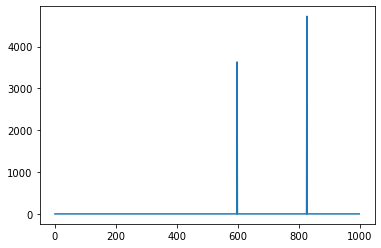

In [68]:
plt.plot(indicators_mcmc.sum(axis=0)[:,3])

In [67]:
indicators_mcmc.sum(axis=1)[:,3]

array([25.,  1.,  1., ...,  1.,  1.,  0.], dtype=float32)